In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
#Custom figures
import matplotlib 
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8) 
matplotlib.rc('font', size=18)

## 1. Import study data

In [3]:
ADNIMERGE = pd.read_csv("ADNIMERGE.csv",low_memory=False)
ADNIMERGE = ADNIMERGE[ADNIMERGE['VISCODE']=='bl']
ADNIMERGE.head()

RID COLPROT ORIGPROT        PTID  SITE VISCODE    EXAMDATE DX_bl   AGE  \
0     2   ADNI1    ADNI1  011_S_0002    11      bl  2005-09-08    CN  74.3   
1     3   ADNI1    ADNI1  011_S_0003    11      bl  2005-09-12    AD  81.3   
5     4   ADNI1    ADNI1  022_S_0004    22      bl  2005-11-08  LMCI  67.5   
10    5   ADNI1    ADNI1  011_S_0005    11      bl  2005-09-07    CN  73.7   
15    6   ADNI1    ADNI1  100_S_0006   100      bl  2005-11-29  LMCI  80.4   

   PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  PTMARRY  APOE4      FDG  PIB  \
0      Male        16  Not Hisp/Latino    White  Married    0.0  1.33615  NaN   
1      Male        18  Not Hisp/Latino    White  Married    1.0  1.10860  NaN   
5      Male        10      Hisp/Latino    White  Married    0.0      NaN  NaN   
10     Male        16  Not Hisp/Latino    White  Married    0.0  1.25956  NaN   
15   Female        13  Not Hisp/Latino    White  Married    0.0      NaN  NaN   

    AV45  FBB  ABETA    TAU   PTAU  CDRSB  ADAS11  ADAS13  ADASQ4  MMSE  \
0    NaN  NaN    NaN    NaN    NaN    0.0   10.67   18.67     5.0  28.0   
1    NaN  NaN  741.5  239.7  22.83    4.5   22.00   31.00     8.0  20.0   
5    NaN  NaN   1501  153.1  13.29    1.0   14.33   21.33     6.0  27.0   
10   NaN  NaN  547.3    337  33.43    0.0    8.67   14.67     4.0  29.0   
15   NaN  NaN    NaN    NaN    NaN    0.5   18.67   25.67     7.0  25.0   

    RAVLT_immediate  RAVLT_learning  RAVLT_forgetting  RAVLT_perc_forgetting  \
0              44.0             4.0               6.0                54.5455   
1              22.0             1.0               4.0               100.0000   
5              37.0             7.0               4.0                36.3636   
10             37.0             4.0               4.0                44.4444   
15             30.0             1.0               5.0                83.3333   

    LDELTOTAL  DIGITSCOR  TRABSCOR   FAQ  MOCA  EcogPtMem  EcogPtLang  \
0        10.0       34.0     112.0   0.0   NaN        NaN         NaN   
1         2.0       25.0     148.0  10.0   NaN        NaN         NaN   
5         4.0       25.0     271.0   0.0   NaN        NaN         NaN   
10       12.0       38.0      90.0   0.0   NaN        NaN         NaN   
15        3.0       34.0     168.0   0.0   NaN        NaN         NaN   

    EcogPtVisspat  EcogPtPlan  EcogPtOrgan  EcogPtDivatt  EcogPtTotal  \
0             NaN         NaN          NaN           NaN          NaN   
1             NaN         NaN          NaN           NaN          NaN   
5             NaN         NaN          NaN           NaN          NaN   
10            NaN         NaN          NaN           NaN          NaN   
15            NaN         NaN          NaN           NaN          NaN   

    EcogSPMem  EcogSPLang  EcogSPVisspat  EcogSPPlan  EcogSPOrgan  \
0         NaN         NaN            NaN         NaN          NaN   
1         NaN         NaN            NaN         NaN          NaN   
5         NaN         NaN            NaN         NaN          NaN   
10        NaN         NaN            NaN         NaN          NaN   
15        NaN         NaN            NaN         NaN          NaN   

    EcogSPDivatt  EcogSPTotal      FLDSTRENG  \
0            NaN          NaN  1.5 Tesla MRI   
1            NaN          NaN  1.5 Tesla MRI   
5            NaN          NaN  1.5 Tesla MRI   
10           NaN          NaN  1.5 Tesla MRI   
15           NaN          NaN  1.5 Tesla MRI   

                                            FSVERSION  IMAGEUID  Ventricles  \
0   Cross-Sectional FreeSurfer (FreeSurfer Version...   35475.0    118233.0   
1   Cross-Sectional FreeSurfer (FreeSurfer Version...   32237.0     84599.0   
5   Cross-Sectional FreeSurfer (FreeSurfer Version...   64631.0     39605.0   
10  Cross-Sectional FreeSurfer (FreeSurfer Version...   32246.0     34062.0   
15  Cross-Sectional FreeSurfer (FreeSurfer Version...   33025.0     39826.0   

    Hippocampus  WholeBrain  Entorhinal  Fusiform  MidTemp 

In [4]:
print("Number of rows: ", ADNIMERGE.shape[0])
print("Number of columns: ", ADNIMERGE.shape[1])

Number of rows:  2428
Number of columns:  116


## 2. EDA (Study Data)

### 2.1. Age distribution by diagnostic status in baseline

Diagnostic codes (in baseline):

- **CN**: controls
- **AD**: alzheimer's disease (dementia diagnostic)
- **LMCI**: late mild cognitive impairment
- **EMCI**: early mild cognitive impairment
- **SMC**: subjective memory concerns (it is considered cognitive normal)

In [5]:
ADNIMERGE['DX_bl'].unique()

array(['CN', 'AD', 'LMCI', 'SMC', 'EMCI', nan], dtype=object)

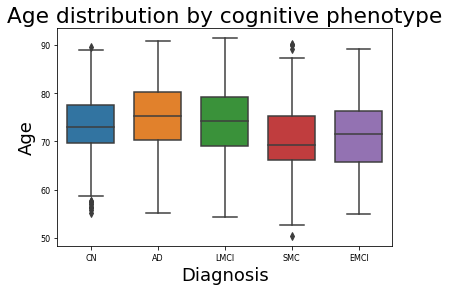

In [6]:
sns.boxplot( x=ADNIMERGE["DX_bl"], y=ADNIMERGE["AGE"], width=0.7);
plt.title("Age distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Age")
plt.show()

#### Kruskal-Wallis Test

To compare the distributions, we have performed a **Kruskal-Wallis** test which is a non-parametric test and an alternative to one-way Anova. By non-parametric we mean, the data is not assumed to become from a particular distribution. The main objective of this test is used to determine whether there is a statistical difference between the medians of at least three independent groups. 

The hypothesese are: 
- **Null hypothesis (H0)**: the median is the same for all the data groups
- **Alternative hypothesis (Ha)**: the median is not equal for all data groups. 

In [7]:
#Import required package
from scipy import stats

In [8]:
#Count NAs
print("Number of missing values for the age: ", ADNIMERGE['AGE'].isna().sum())

Number of missing values for the age:  4


In [9]:
#drop rows with NANs as they are giving problems in the statistical analysis
ADNIMERGE = ADNIMERGE.dropna(subset = ['AGE'])
print("Number of missing values for the age: ", ADNIMERGE['AGE'].isna().sum())

Number of missing values for the age:  0


In [10]:
#Prepare data for statistical tests
CN_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='CN']['AGE'].values.tolist()
AD_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='AD']['AGE'].values.tolist()
LMCI_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='LMCI']['AGE'].values.tolist()
SMC_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='SMC']['AGE'].values.tolist()
EMCI_age = ADNIMERGE[ADNIMERGE["DX_bl"]=='EMCI']['AGE'].values.tolist()

In [11]:
#Run Kruskal-Wallis test
KW_age = stats.kruskal(CN_age, AD_age, LMCI_age, SMC_age, EMCI_age)
print(KW_age)

KruskalResult(statistic=106.38929707080892, pvalue=4.283650979348773e-22)


The p-value is below 0.05 and thus, we can reject the null hypothesis, suggesting that the at least one of the groups do not have the same age distribution as the others.

#### Mann-Whitney Test

In addition, we can compare the distributions of each of the cognitive impairment groups with the controls using a **Mann-Whitney** test. This test is equivalent to the Kruskal-Wallis test, but compares only two grous at a time. 

In [12]:
#Mann-Whitney tests
print("Controls-SMC: ", stats.mannwhitneyu(CN_age,AD_age))
print("Controls-EMCI: ", stats.mannwhitneyu(CN_age,EMCI_age))
print("Controls-LMCI: ", stats.mannwhitneyu(CN_age,LMCI_age))
print("Controls-AD: ", stats.mannwhitneyu(CN_age,AD_age))

Controls-SMC:  MannwhitneyuResult(statistic=95390.0, pvalue=0.0002048873918692586)
Controls-EMCI:  MannwhitneyuResult(statistic=132295.0, pvalue=9.270313253534334e-06)
Controls-LMCI:  MannwhitneyuResult(statistic=174909.0, pvalue=0.08593701785458925)
Controls-AD:  MannwhitneyuResult(statistic=95390.0, pvalue=0.0002048873918692586)


We cannot reject the null hypothesis only for the LMCI group, where the p-value suggests that the two distributions are the same. 

In [13]:
#groupping all patients in the same group
noCN_age = ADNIMERGE[ADNIMERGE["DX_bl"]!='CN']['AGE'].values.tolist()
print("Controls-no controls: ", stats.mannwhitneyu(CN_age,noCN_age))

Controls-no controls:  MannwhitneyuResult(statistic=527537.0, pvalue=0.18847205346018037)


**Conclusion**: the age distribution is not the same in controls than in the different groups, except if we only consider two groups (healthy and patients with cognitive impairment). These results do not support a normalization based on the age of the controls. Nevertheless these tests should be repeated for the patients included in the batteries that are going to be used for the study. 

### 2.2. Gender distribution by diagnosis group

In [14]:
#calculate sum of values by group
df_sex = ADNIMERGE.groupby(['DX_bl', 'PTGENDER']).agg(Count=("RID", 'count'))
df_sex = df_sex.reset_index()
#df_sex

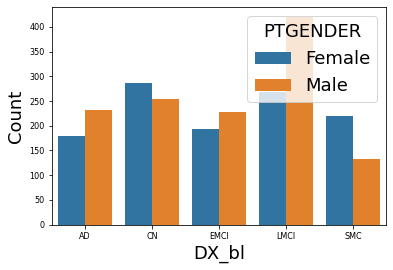

In [15]:
#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTGENDER",
           data=df_sex)

plt.show()

### 2.3. Ethnic distribution by diagnosis group

In [16]:
#calculate sum of values by group
df_eth = ADNIMERGE.groupby(['DX_bl', 'PTRACCAT']).agg(Count=("RID", 'count'))
df_eth = df_eth.reset_index()
#df_eth.head()

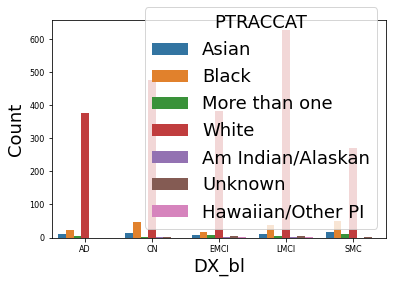

In [17]:
#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTRACCAT",
           data=df_eth)

plt.show()

## 3. Neurocognitive test batteries data inspection

First we are going to find how many patients -in baseline- have been administered with the three batteries (ADAS-cog, MMSE, MoCA).

### 3.1. Data import

#### ADAS-cog

In [18]:
#ADAS-cog (ADNIGO,2,3)
ADAS = pd.read_csv("Neuropsychological/ADAS_ADNIGO23.csv")
ADAS = ADAS[ADAS['VISCODE2']=='bl']
ADAS.head()

Phase  ID   RID  SITEID VISCODE VISCODE2    USERDATE   USERDATE2  \
5   ADNIGO  22  2002      48      bl       bl  2010-07-06  2011-02-28   
6   ADNIGO  24  2007      12      bl       bl  2010-07-07  2011-02-28   
7   ADNIGO  26  2010       1      bl       bl  2010-07-09  2011-02-28   
10  ADNIGO  32  2011      48      bl       bl  2010-07-21  2011-02-28   
13  ADNIGO  38  2003      48      bl       bl  2010-07-23  2011-02-28   

    WORDLIST  Q1UNABLE          Q1TR1                Q1TR2              Q1TR3  \
5        1.0       NaN  0:1:2:3:5:6:7  0:1:2:3:4:5:6:7:8:9  0:2:3:4:5:6:7:8:9   
6        1.0       NaN      1:4:7:8:9        0:3:4:6:7:8:9  0:2:3:4:5:6:7:8:9   
7        1.0       NaN  0:1:4:6:7:8:9    0:2:3:4:5:6:7:8:9    0:1:2:3:5:6:8:9   
10       1.0       NaN  0:1:2:3:6:7:9        0:1:2:3:4:5:9    0:1:2:3:4:5:8:9   
13       1.0       NaN        0:3:6:9        0:1:2:4:5:6:9    0:1:2:4:5:6:8:9   

    Q1TRIT  Q1TR2T  Q1TRT  Q1SCORE  TIMEEND  Q2UNABLE     Q2TASK  Q2SCORE  \
5      NaN     NaN    NaN      1.0      NaN       NaN  1:2:3:4:5      0.0   
6      NaN     NaN    NaN      3.0      NaN       NaN  1:2:3:4:5      0.0   
7      NaN     NaN    NaN      2.0      NaN       NaN  1:2:3:4:5      0.0   
10     NaN     NaN    NaN      3.0      NaN       NaN  1:2:3:4:5      0.0   
13     NaN     NaN    NaN      4.0      NaN       NaN  1:2:3:4:5      0.0   

    Q3UNABLE  Q3TASK1  Q3TASK2  Q3TASK3  Q3TASK4  Q3SCORE  Q4UNABLE  \
5        NaN      1.0      1.0      1.0      1.0      0.0       NaN   
6        NaN      1.0      1.0      1.0      2.0      1.0       NaN   
7        NaN      1.0      1.0      1.0      1.0      0.0       NaN   
10       NaN      1.0      1.0      1.0      2.0      1.0       NaN   
13       NaN      1.0      1.0      1.0      2.0      1.0       NaN   

    TIMEBEGAN           Q4TASK  Q4SCORE  Q5UNABLE  \
5         NaN  0:1:3:4:6:7:8:9      2.0       NaN   
6         NaN  0:1:2:4:5:6:7:8      2.0       NaN   
7         NaN    0:1:2:4:5:7:9      3.0       NaN   
10        NaN  0:1:2:3:4:5:7:9      2.0       NaN   
13        NaN  0:2:3:4:6:7:8:9      2.0       NaN   

                                       Q5TASK  Q5SCORE  Q5NAME1  Q5NAME2  \
5      1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
6      1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
7   1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
10  1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
13     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   

    Q5NAME3  Q5NAME4  Q5NAME5  Q5NAME6  Q5NAME7  Q5NAME8  Q5NAME9  Q5NAME10  \
5       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
6       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
7       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
10      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
13      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   

    Q5NAME11  Q5NAME12 Q5FINGER  Q5SCORE_CUE  Q6UNABLE     Q6TASK  Q6SCORE  \
5        NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
6        NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
7        NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
10       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
13       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   

    Q7UNABLE           Q7TASK  Q7SCORE  Q8UNABLE  Q8WORD1  Q8WORD1R  Q8WORD2  \
5        NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
6        NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
7        NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
10       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
13       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0  

In [19]:
print("Number of subjects: ", len(ADAS['RID'].unique()))

Number of subjects:  1606


Count missing data

In [20]:
ADAS_columns = ["Q1SCORE","Q2SCORE","Q3SCORE","Q4SCORE","Q5SCORE","Q6SCORE","Q7SCORE",
          "Q8SCORE","Q9SCORE","Q10SCORE","Q11SCORE","Q12SCORE","Q13SCORE"]

for column in ADAS_columns:
    NullSum = ADAS[column].isnull().sum(axis = 0)
    print(f"{column}: {NullSum}")
    
print("Number of rows with missing values: ", ADAS[ADAS_columns].isna().any(axis=1).sum())
    
print("Total number of tests: ", len(ADAS_columns) )

Q1SCORE: 3
Q2SCORE: 3
Q3SCORE: 3
Q4SCORE: 3
Q5SCORE: 5
Q6SCORE: 3
Q7SCORE: 4
Q8SCORE: 5
Q9SCORE: 4
Q10SCORE: 3
Q11SCORE: 3
Q12SCORE: 3
Q13SCORE: 8
Number of rows with missing values:  13
Total number of tests:  13


There are only 13 subjects that have missing data in any test. 

In [21]:
#Drop NaN
ADAS = ADAS.dropna(subset=ADAS_columns)
print("Number of subjects that have completed all tests: ", ADAS.shape[0])

Number of subjects that have completed all tests:  1593


#### MMSE

In [22]:
#MMSE (ADNI1,GO,2,3)
MMSE = pd.read_csv("Neuropsychological/MMSE.csv",low_memory=False)
MMSE = MMSE[MMSE['VISCODE2']=='sc']
MMSE.head()

Phase  ID  RID  SITEID VISCODE VISCODE2    USERDATE USERDATE2    EXAMDATE  \
0  ADNI1  10    2     107      sc       sc  2005-08-17       NaN  2005-08-17   
2  ADNI1  14    3     107      sc       sc  2005-08-18       NaN  2005-08-18   
3  ADNI1  16    4      10      sc       sc  2005-08-18       NaN  2005-08-18   
4  ADNI1  18    5     107      sc       sc  2005-08-23       NaN  2005-08-23   
6  ADNI1  22    7      10      sc       sc  2005-08-29       NaN  2005-08-25   

   MMDATE MMDATECM  MMYEAR MMYEARCM  MMMONTH   MMMNTHCM  MMDAY    MMDAYCM  \
0     1.0       17     1.0     2005      1.0     August    1.0  Wednesday   
2     2.0      IDK     1.0     2005      2.0  september    2.0        IDK   
3     1.0       18     1.0     2005      1.0     Agosto    1.0     Jueves   
4     1.0     23rd     1.0     2005      1.0     august    1.0    tuesday   
6     2.0       21     2.0     1975      1.0     Agosto    1.0     Jueves   

   MMSEASON MMSESNCM  MMHOSPIT          MMHOSPCM  MMFLOOR      MMFLRCM  \
0       1.0   Summer       1.0  Memory and Aging      1.0       ground   
2       2.0     fall       1.0            wash u      2.0          4th   
3       1.0   Verano       1.0             UPENN      1.0  primer piso   
4       1.0   summer       1.0               bjh      1.0          1st   
6       1.0   Verano       2.0             no se      1.0      primero   

   MMCITY   MMCITYCM  MMAREA     MMAREACM  MMSTATE MMSTCM  MMRECALL  MMBALL  \
0     1.0  St. Louis     1.0  Mississippi      1.0     MO       NaN     1.0   
2     1.0  st. louis     1.0  mississippi      1.0     mo       NaN     1.0   
3     1.0      Phila     1.0        Phila      1.0   Penn       NaN     1.0   
4     1.0  st. louis     1.0   misissippi      1.0     mo       NaN     1.0   
6     1.0      Phila     1.0        Phila      1.0   Penn       NaN     1.0   

   MMFLAG  MMTREE  MMTRIALS  MMD MMDLTR  MML MMLLTR  MMR MMRLTR  MMO MMOLTR  \
0     1.0     1.0       1.0  1.0      d  1.0      l  1.0      r  1.0      o   
2     1.0     1.0       1.0  1.0      d  1.0      l  1.0      r  2.0      w   
3     1.0     1.0       1.0  1.0      o  1.0      d  1.0      n  1.0      u   
4     1.0     1.0       1.0  1.0      d  1.0      l  1.0      r  1.0      o   
6     1.0     1.0       1.0  1.0      0  2.0     ND  2.0     ND  2.0     ND   

   MMW MMWLTR  MMBALLDL  MMFLAGDL  MMTREEDL  MMWATCH  MMPENCIL  MMREPEAT  \
0  1.0      w       2.0       1.0       2.0      1.0       1.0       1.0   
2  2.0     --       2.0       2.0       2.0      1.0       1.0       1.0   
3  1.0      m       1.0       2.0       2.0      1.0       1.0       1.0   
4  1.0      w       1.0       1.0       1.0      1.0       1.0       1.0   
6  1.0      m       2.0       2.0       2.0      1.0       1.0       1.0   

   MMHAND  MMFOLD  MMONFLR  MMREAD  MMWRITE  MMDRAW  MMSCORE  DONE MMLTR1  \
0     1.0     1.0      1.0     1.0      1.0     1.0     28.0   NaN    NaN   
2     1.0     1.0      1.0     1.0      1.0     1.0     20.0   NaN    NaN   
3     1.0     1.0      1.0     1.0      1.0     2.0     27.0   NaN    NaN   
4     2.0     1.0      1.0     1.0      1.0     1.0     29.0   NaN    NaN   
6     1.0     1.0      1.0     1.0      1.0     2.0     20.0   NaN    NaN   

  MMLTR2 MMLTR3 MMLTR4 MMLTR5 MMLTR6 MMLTR7  WORD1  WORD1DL  WORD2  WORD2DL  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
6    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   

   WORD3  WORD3DL  WORDLIST  WORLDSCORE DATE  SOURCE           update_stamp  
0    NaN      NaN       NaN         NaN  NaN     NaN  2005-08-17 00:00:00.0  
2    NaN      NaN       NaN         NaN  NaN     NaN  2005-08-18 00:00:00.0  
3    NaN      NaN       NaN        

In [23]:
print("Number of subjects: ", len(MMSE['RID'].unique()))

Number of subjects:  3470


In [24]:
#Count missing data
MMSE_columns = ["MMDATE","MMYEAR","MMMONTH","MMDAY","MMSEASON","MMHOSPIT","MMFLOOR",
          "MMCITY","MMAREA","MMSTATE","MMBALL","MMFLAG","MMTREE","MMD",
               "MML","MMR","MMO","MMW","MMBALLDL","MMFLAGDL","MMTREEDL","MMWATCH",
               "MMPENCIL","MMREPEAT","MMHAND","MMFOLD","MMONFLR","MMREAD","MMWRITE",
               "MMDRAW"]

for column in MMSE_columns:
    NullSum = MMSE[column].isnull().sum(axis = 0)
    print(f"{column}: {NullSum}")

print("Number of rows with missing values: ", MMSE[MMSE_columns].isna().any(axis=1).sum())

print("Total number of tests: ", len(MMSE_columns) )

MMDATE: 5
MMYEAR: 5
MMMONTH: 5
MMDAY: 5
MMSEASON: 5
MMHOSPIT: 5
MMFLOOR: 5
MMCITY: 5
MMAREA: 5
MMSTATE: 5
MMBALL: 1065
MMFLAG: 1065
MMTREE: 1065
MMD: 1065
MML: 1065
MMR: 1065
MMO: 1065
MMW: 1065
MMBALLDL: 1065
MMFLAGDL: 1065
MMTREEDL: 1065
MMWATCH: 5
MMPENCIL: 5
MMREPEAT: 5
MMHAND: 5
MMFOLD: 5
MMONFLR: 6
MMREAD: 5
MMWRITE: 5
MMDRAW: 5
Number of rows with missing values:  1065
Total number of tests:  30


There are 1605 patients that have missing data so maybe deleting all these rows is not the best strategy to deal with missing values. 

In [25]:
#Drop NaN
MMSE = MMSE.dropna(subset=MMSE_columns)
print("Number of subjects that have completed all tests: ", MMSE.shape[0])

Number of subjects that have completed all tests:  2405


#### MoCA

In [26]:
#MoCA (ADNIGO,2,3)
MOCA = pd.read_csv("Neuropsychological/MOCA.csv")
MOCA = MOCA[MOCA['VISCODE2']=='bl']
MOCA.head()

Phase  ID   RID  SITEID VISCODE VISCODE2    USERDATE   USERDATE2  TRAILS  \
5   ADNIGO  14  2002      48      bl       bl  2010-07-06  2010-08-31     1.0   
6   ADNIGO  16  2007      12      bl       bl  2010-07-07  2011-01-11     1.0   
7   ADNIGO  18  2010       1      bl       bl  2010-07-09  2010-07-23     1.0   
10  ADNIGO  24  2011      48      bl       bl  2010-07-21         NaN     1.0   
13  ADNIGO  30  2003      48      bl       bl  2010-07-23         NaN     1.0   

    CUBE  CLOCKCON  CLOCKNO  CLOCKHAN  LION  RHINO  CAMEL  IMMT1W1  IMMT1W2  \
5    1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
6    0.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
7    0.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
10   1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
13   0.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   

    IMMT1W3  IMMT1W4  IMMT1W5  IMMT2W1  IMMT2W2  IMMT2W3  IMMT2W4  IMMT2W5  \
5       1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
6       1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
7       1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
10      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
13      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   

    DIGFOR  DIGBACK  LETTERS  SERIAL1  SERIAL2  SERIAL3  SERIAL4  SERIAL5  \
5      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
6      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
7      1.0      1.0      0.0      1.0      1.0      1.0      1.0      1.0   
10     1.0      1.0      0.0      1.0      1.0      1.0      1.0      1.0   
13     1.0      1.0      0.0      1.0      0.0      0.0      0.0      0.0   

    REPEAT1  REPEAT2  FFLUENCY  ABSTRAN  ABSMEAS  DELW1  DELW2  DELW3  DELW4  \
5       1.0      1.0      30.0      1.0      1.0    2.0    1.0    2.0    1.0   
6       1.0      1.0      20.0      0.0      1.0    0.0    2.0    0.0    3.0   
7       1.0      1.0      18.0      1.0      1.0    1.0    1.0    0.0    0.0   
10      1.0      1.0      22.0      1.0      1.0    3.0    3.0    2.0    2.0   
13      1.0      1.0      14.0      1.0      1.0    2.0    1.0    0.0    2.0   

    DELW5  DATE  MONTH  YEAR  DAY  PLACE  CITY  MOCA MCDATE  SOURCE  \
5     1.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
6     0.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
7     1.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
10    2.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
13    1.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   

             update_stamp  
5   2012-11-16 09:41:13.0  
6   2012-11-16 09:41:13.0  
7   2012-11-16 09:41:13.0  
10  2012-11-16 09:41:13.0  
13  2012-11-16 09:41:13.0

In [27]:
print("Number of subjects: ", len(MOCA['RID'].unique()))

Number of subjects:  1606


In [28]:
#Count missing data
MOCA_columns = MOCA.columns[8:-4].tolist()

for column in MOCA_columns:
    NullSum = MOCA[column].isnull().sum(axis = 0)
    print(f"{column}: {NullSum}")
    
print("Number of rows with missing values: ", MOCA[MOCA_columns].isna().any(axis=1).sum())
    
print("Total number of tests: ", len(MOCA_columns) )

TRAILS: 5
CUBE: 6
CLOCKCON: 7
CLOCKNO: 8
CLOCKHAN: 9
LION: 6
RHINO: 6
CAMEL: 6
IMMT1W1: 8
IMMT1W2: 7
IMMT1W3: 11
IMMT1W4: 9
IMMT1W5: 8
IMMT2W1: 15
IMMT2W2: 11
IMMT2W3: 13
IMMT2W4: 13
IMMT2W5: 12
DIGFOR: 4
DIGBACK: 4
LETTERS: 8
SERIAL1: 7
SERIAL2: 7
SERIAL3: 9
SERIAL4: 10
SERIAL5: 11
REPEAT1: 4
REPEAT2: 5
FFLUENCY: 5
ABSTRAN: 6
ABSMEAS: 7
DELW1: 9
DELW2: 8
DELW3: 9
DELW4: 9
DELW5: 9
DATE: 4
MONTH: 4
YEAR: 4
DAY: 5
PLACE: 4
CITY: 5
Number of rows with missing values:  51
Total number of tests:  42


In [29]:
#Drop NaN
MOCA = MOCA.dropna(subset=MOCA_columns)
print("Number of subjects that have completed all tests: ", MOCA.shape[0])

Number of subjects that have completed all tests:  1555


There are 50 subjects that have missing data. 

#### Merged batteries

Merge the three test batteries (ADAS-cog, MMSE and MoCA).

In [30]:
df = pd.merge(pd.merge(ADAS,MMSE,on='RID'),MOCA,on='RID')
df.head()

Phase_x  ID_x   RID  SITEID_x VISCODE_x VISCODE2_x  USERDATE_x USERDATE2_x  \
0  ADNIGO    22  2002        48        bl         bl  2010-07-06  2011-02-28   
1  ADNIGO    24  2007        12        bl         bl  2010-07-07  2011-02-28   
2  ADNIGO    26  2010         1        bl         bl  2010-07-09  2011-02-28   
3  ADNIGO    32  2011        48        bl         bl  2010-07-21  2011-02-28   
4  ADNIGO    38  2003        48        bl         bl  2010-07-23  2011-02-28   

   WORDLIST_x  Q1UNABLE          Q1TR1                Q1TR2  \
0         1.0       NaN  0:1:2:3:5:6:7  0:1:2:3:4:5:6:7:8:9   
1         1.0       NaN      1:4:7:8:9        0:3:4:6:7:8:9   
2         1.0       NaN  0:1:4:6:7:8:9    0:2:3:4:5:6:7:8:9   
3         1.0       NaN  0:1:2:3:6:7:9        0:1:2:3:4:5:9   
4         1.0       NaN        0:3:6:9        0:1:2:4:5:6:9   

               Q1TR3  Q1TRIT  Q1TR2T  Q1TRT  Q1SCORE  TIMEEND  Q2UNABLE  \
0  0:2:3:4:5:6:7:8:9     NaN     NaN    NaN      1.0      NaN       NaN   
1  0:2:3:4:5:6:7:8:9     NaN     NaN    NaN      3.0      NaN       NaN   
2    0:1:2:3:5:6:8:9     NaN     NaN    NaN      2.0      NaN       NaN   
3    0:1:2:3:4:5:8:9     NaN     NaN    NaN      3.0      NaN       NaN   
4    0:1:2:4:5:6:8:9     NaN     NaN    NaN      4.0      NaN       NaN   

      Q2TASK  Q2SCORE  Q3UNABLE  Q3TASK1  Q3TASK2  Q3TASK3  Q3TASK4  Q3SCORE  \
0  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      1.0      0.0   
1  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      2.0      1.0   
2  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      1.0      0.0   
3  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      2.0      1.0   
4  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      2.0      1.0   

   Q4UNABLE  TIMEBEGAN           Q4TASK  Q4SCORE  Q5UNABLE  \
0       NaN        NaN  0:1:3:4:6:7:8:9      2.0       NaN   
1       NaN        NaN  0:1:2:4:5:6:7:8      2.0       NaN   
2       NaN        NaN    0:1:2:4:5:7:9      3.0       NaN   
3       NaN        NaN  0:1:2:3:4:5:7:9      2.0       NaN   
4       NaN        NaN  0:2:3:4:6:7:8:9      2.0       NaN   

                                      Q5TASK  Q5SCORE  Q5NAME1  Q5NAME2  \
0     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
1     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
2  1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
3  1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
4     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   

   Q5NAME3  Q5NAME4  Q5NAME5  Q5NAME6  Q5NAME7  Q5NAME8  Q5NAME9  Q5NAME10  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   

   Q5NAME11  Q5NAME12 Q5FINGER  Q5SCORE_CUE  Q6UNABLE     Q6TASK  Q6SCORE  \
0       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
1       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
2       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
3       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
4       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   

   Q7UNABLE           Q7TASK  Q7SCORE  Q8UNABLE  Q8WORD1  Q8WORD1R  Q8WORD2  \
0       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
1       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
2       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
3       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
4       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0   

In [31]:
print("Number of subjects with data for all batteries: ", df.shape[0])

Number of subjects with data for all batteries:  898


If we do not discard the rows that have missing values, the total number of patients in the merged table would be 1605. All of them will be patients with information for the 3 batteries -although not necessarily all test completed-.

### 3.2. EDA

C:\Users\anaso\AppData\Local\Temp\ipykernel_23568\4222530680.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'update_stamp_x', 'VISCODE_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_ADNIMERGE = pd.merge(df,ADNIMERGE,on='RID')


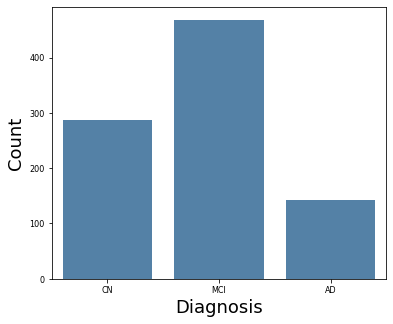

In [32]:
#Diagnosis bar plot
df_ADNIMERGE = pd.merge(df,ADNIMERGE,on='RID')

df_ADNIMERGE_groupped = df_ADNIMERGE.copy()
df_ADNIMERGE_groupped['DX_bl'] = df_ADNIMERGE['DX_bl'].replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

#calculate sum of values by group
df_dx = df_ADNIMERGE_groupped.groupby(['DX_bl']).agg(Count=("RID", 'count'))
df_dx = df_dx.reset_index()

#print barplot
fig = plt.figure(figsize=(6,5))

sns.barplot(x="DX_bl",
           y="Count",
           data=df_dx,
           color='steelblue',
           order=["CN","MCI","AD"])

plt.xlabel("Diagnosis")
plt.ylabel("Count")

plt.show()

In [33]:
import warnings
warnings.filterwarnings('ignore')

#Count number of instances in each group
df_CN = pd.merge(df,df_ADNIMERGE_groupped[df_ADNIMERGE_groupped["DX_bl"]=='CN'],on='RID')
df_MCI = pd.merge(df,df_ADNIMERGE_groupped[df_ADNIMERGE_groupped["DX_bl"]=='MCI'],on='RID')
df_AD = pd.merge(df,df_ADNIMERGE_groupped[df_ADNIMERGE_groupped["DX_bl"]=='AD'],on='RID')

print("Number of controls: ", df_CN.shape[0])
print("Number of MCI subjects: ", df_MCI.shape[0])
print("Number of AD subjects: ", df_AD.shape[0])

Number of controls:  288
Number of MCI subjects:  468
Number of AD subjects:  142


#### Age distribution

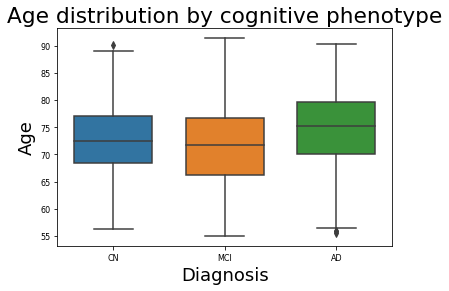

In [34]:
#Age Distribution 

sns.boxplot(x=df_ADNIMERGE_groupped["DX_bl"], y=df_ADNIMERGE["AGE"], width=0.7,
           order=["CN","MCI","AD"])
plt.title("Age distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Age")
plt.show()

#### Kruskal-Wallis test

In [35]:
#Kruskal-Wallis test
KW_age = stats.kruskal(df_CN['AGE'].values.tolist(), df_MCI['AGE'].values.tolist(), df_AD['AGE'].values.tolist())
KW_age

KruskalResult(statistic=18.92772829201439, pvalue=7.760612946005333e-05)

#### Mann-Whitney tests

In [36]:
#Mann-Whitney tests
print("Controls-MCI: ", stats.mannwhitneyu(df_CN['AGE'].values.tolist(),df_MCI['AGE'].values.tolist()))
print("Controls-AD: ", stats.mannwhitneyu(df_CN['AGE'].values.tolist(),df_AD['AGE'].values.tolist()))

Controls-MCI:  MannwhitneyuResult(statistic=74409.5, pvalue=0.016107078598488866)
Controls-AD:  MannwhitneyuResult(statistic=17240.0, pvalue=0.008130636399248574)


These results indicate that the MCI group does not have the same age distribution than the controls. Thus, it does not supports a normalization based on age. 

#### Shapiro-Wilk test for normality

In [37]:
#Shapiro-Wilk test for normality
print("Controls: ", stats.shapiro(df_CN['AGE'].values.tolist()))
print("MCI: ", stats.shapiro(df_MCI['AGE'].values.tolist()))
print("AD: ", stats.shapiro(df_AD['AGE'].values.tolist()))

Controls:  ShapiroResult(statistic=0.9843282699584961, pvalue=0.003074418054893613)
MCI:  ShapiroResult(statistic=0.9916391968727112, pvalue=0.009754721075296402)
AD:  ShapiroResult(statistic=0.9782914519309998, pvalue=0.02337193489074707)


The controls are the only group that have a normal distribution for the age. 

#### Sex distribution

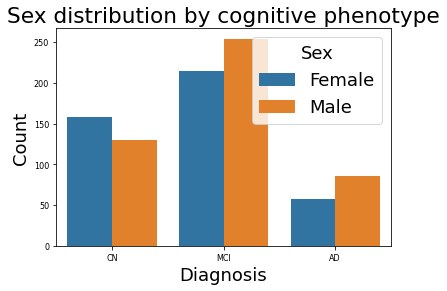

In [38]:
#Sex distribution

#calculate sum of values by group
df_sex = df_ADNIMERGE_groupped.groupby(['DX_bl', 'PTGENDER']).agg(Count=("RID", 'count'))
df_sex = df_sex.reset_index()

#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTGENDER",
           data=df_sex,
           order=["CN","MCI","AD"])

plt.title("Sex distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.legend(title='Sex')

plt.show()

In [320]:
contingency_sex = pd.crosstab(df_ADNIMERGE_groupped['DX_bl'], df_ADNIMERGE_groupped['PTGENDER'])

# Chi-square test of independence. 
c, p, dof, expected = stats.chi2_contingency(contingency_sex)
print("Chi-square test p-value:", p)

Chi-square test p-value: 0.007083203220009745


#### Ethnicity distribution

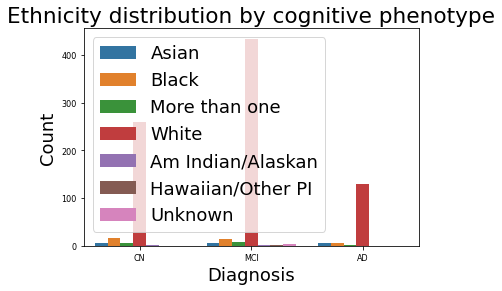

In [39]:
#Ethnic distribution

#calculate sum of values by group
df_eth = df_ADNIMERGE_groupped.groupby(['DX_bl', 'PTRACCAT']).agg(Count=("RID", 'count'))
df_eth = df_eth.reset_index()

#print barplot
sns.barplot(x="DX_bl",
           y="Count",
           hue="PTRACCAT",
           data=df_eth,
           order=["CN","MCI","AD"])

plt.title("Ethnicity distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.legend(title='Ethnic group')
plt.legend(loc='upper left')

plt.show()

In [321]:
contingency_eth = pd.crosstab(df_ADNIMERGE_groupped['DX_bl'], df_ADNIMERGE_groupped['PTRACCAT'])

# Chi-square test of independence. 
c, p, dof, expected = stats.chi2_contingency(contingency_eth)
print("Chi-square test p-value:", p)

Chi-square test p-value: 0.40401720584313067


#### Years of education distribution

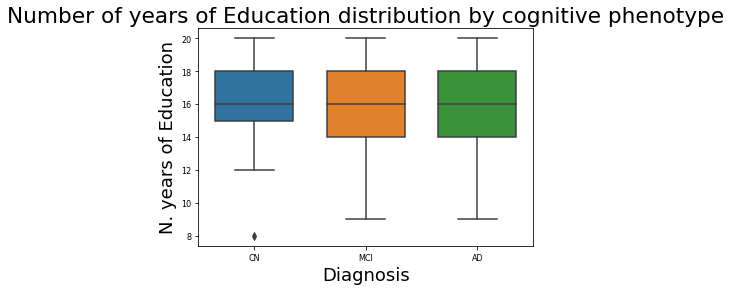

In [40]:
#Age Distribution 

sns.boxplot(x=df_ADNIMERGE_groupped["DX_bl"], y=df_ADNIMERGE_groupped["PTEDUCAT"], width=0.7,
           order=["CN","MCI","AD"])

plt.title("Number of years of Education distribution by cognitive phenotype")
plt.xlabel("Diagnosis")
plt.ylabel("N. years of Education")
plt.show()

#### Kruskal-Wallis test

In [41]:
#Kruskal-Wallis test
KW_ed = stats.kruskal(df_CN['PTEDUCAT'].values.tolist(), df_MCI['PTEDUCAT'].values.tolist(), df_AD['PTEDUCAT'].values.tolist())
KW_ed

KruskalResult(statistic=9.896557267476583, pvalue=0.007095612570655553)

#### Mann-Whitney tests

In [42]:
#Mann-Whitney tests
print("Controls-MCI: ", stats.mannwhitneyu(df_CN['PTEDUCAT'].values.tolist(),df_MCI['PTEDUCAT'].values.tolist()))
print("Controls-AD: ", stats.mannwhitneyu(df_CN['PTEDUCAT'].values.tolist(),df_AD['PTEDUCAT'].values.tolist()))

Controls-MCI:  MannwhitneyuResult(statistic=73997.5, pvalue=0.021741205962535988)
Controls-AD:  MannwhitneyuResult(statistic=23998.0, pvalue=0.0029532980234029554)


These results indicate that the MCI group does not have the same age distribution than the controls.

#### Shapiro-Wilk test for normality

In [43]:
#Shapiro-Wilk test for normality
print("Controls: ", stats.shapiro(df_CN['PTEDUCAT'].values.tolist()))
print("MCI: ", stats.shapiro(df_MCI['PTEDUCAT'].values.tolist()))
print("AD: ", stats.shapiro(df_AD['PTEDUCAT'].values.tolist()))

Controls:  ShapiroResult(statistic=0.9217047095298767, pvalue=3.799967285278427e-11)
MCI:  ShapiroResult(statistic=0.9340997338294983, pvalue=1.6230387259869028e-13)
AD:  ShapiroResult(statistic=0.9455486536026001, pvalue=2.3768745450070128e-05)


The education level does not follow a normal distribution. 

## 4. DATA PREPROCESSING

In [44]:
from sklearn.preprocessing import StandardScaler

#### Plot z-scores by cognitive domain

1. Compute averages of each test
2. Group by NC domain
3. Compute the average of each domain

In [45]:
def zscores_means(X, dx, metadata_path):
    """Function to generate a table with the means by cognitive domain and diagnostic group"""
    #Compute the test means
    means_df = X.mean(axis=0).to_frame()
    means_df.columns = ["Mean"]
    means_df['ADNI column'] = means_df.index

    #Import the test-cognitive domain relations    
    metadata = pd.read_csv(metadata_path, sep=";", 
                            usecols = ['ADNI column', 'Cognitive Domain'])

    means_df = means_df.join(metadata.set_index('ADNI column'))[['Cognitive Domain', 'Mean']]

    #Compute NC domain means
    means_df = means_df.groupby(['Cognitive Domain'])['Mean'].mean().to_frame()
    means_df.reset_index(inplace=True)

    #Add diagnostic group
    means_df["Diagnostic"] = dx
    
    return(means_df)

### 4.1. ADAS-Cog

In [46]:
#get test results for the controls
ADAS_CN = ADAS[ADAS.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", ADAS_CN.shape[0])

Number of controls:  311


#### Control data

In [47]:
#filter table to show only tests results
ADAS_CN = ADAS_CN[ADAS_columns]
ADAS_CN.head()

Q1SCORE  Q2SCORE  Q3SCORE  Q4SCORE  Q5SCORE  Q6SCORE  Q7SCORE  Q8SCORE  \
484      2.0      0.0      1.0      2.0      0.0      0.0      0.0      3.0   
489      4.0      0.0      0.0      3.0      0.0      0.0      0.0      2.0   
494      1.0      0.0      0.0      2.0      0.0      0.0      0.0      1.0   
507      2.0      0.0      0.0      1.0      0.0      0.0      1.0      0.0   
508      5.0      0.0      0.0      6.0      0.0      0.0      0.0      4.0   

     Q9SCORE  Q10SCORE  Q11SCORE  Q12SCORE  Q13SCORE  
484      0.0       0.0       0.0       0.0       0.0  
489      0.0       0.0       0.0       0.0       1.0  
494      0.0       0.0       0.0       0.0       0.0  
507      0.0       0.0       0.0       0.0       1.0  
508      0.0       0.0       0.0       0.0       1.0

In [48]:
#Control statistics
ADAS_CN.describe()

Q1SCORE     Q2SCORE     Q3SCORE     Q4SCORE     Q5SCORE     Q6SCORE  \
count  311.000000  311.000000  311.000000  311.000000  311.000000  311.000000   
mean     2.842347    0.067524    0.398714    2.681672    0.054662    0.070740   
std      1.308845    0.357329    0.552296    1.846955    0.227686    0.280804   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    0.000000    1.000000    0.000000    0.000000   
50%      3.000000    0.000000    0.000000    2.000000    0.000000    0.000000   
75%      4.000000    0.000000    1.000000    4.000000    0.000000    0.000000   
max      6.670000    5.000000    2.000000   10.000000    1.000000    2.000000   

          Q7SCORE     Q8SCORE     Q9SCORE    Q10SCORE    Q11SCORE    Q12SCORE  \
count  311.000000  311.000000  311.000000  311.000000  311.000000  311.000000   
mean     0.096463    1.926045    0.016077    0.012862    0.045016    0.019293   
std      0.326793    1.888248    0.149403    0.112860    0.236710    0.159477   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    3.000000    0.000000    0.000000    0.000000    0.000000   
max      3.000000   12.000000    2.000000    1.000000    2.000000    2.000000   

         Q13SCORE  
count  311.000000  
mean     0.389068  
std      0.686090  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      5.000000

#### Fit the scaler with the controls data

In [49]:
scaler = StandardScaler()
scaler.fit(ADAS_CN)

StandardScaler()

#### Transform data

In [50]:
ADAS_DX = pd.merge(ADAS,ADNIMERGE,on='RID')

X_ADAS = ADAS_DX[ADAS_columns] #tests scores
Y_ADAS = pd.DataFrame(ADAS_DX["DX_bl"]) #diagnosis

#scale data
X_ADAS = scaler.transform(X_ADAS)

#Convert into pandas dataframe
X_ADAS = pd.DataFrame(X_ADAS,columns=ADAS_columns)
X_ADAS.head()

Q1SCORE   Q2SCORE   Q3SCORE   Q4SCORE   Q5SCORE   Q6SCORE   Q7SCORE  \
0 -1.409881 -0.189274 -0.723084 -0.369674 -0.240464 -0.252324 -0.295656   
1  0.120646 -0.189274  1.090458 -0.369674 -0.240464 -0.252324 -0.295656   
2 -0.644618 -0.189274 -0.723084  0.172631 -0.240464 -0.252324 -0.295656   
3  0.120646 -0.189274  1.090458 -0.369674 -0.240464 -0.252324 -0.295656   
4  0.885910 -0.189274  1.090458 -0.369674 -0.240464 -0.252324 -0.295656   

    Q8SCORE   Q9SCORE  Q10SCORE  Q11SCORE  Q12SCORE  Q13SCORE  
0 -0.491216 -0.107783 -0.114146 -0.190481 -0.121169 -0.567994  
1  0.569674 -0.107783 -0.114146 -0.190481 -0.121169 -0.567994  
2 -0.491216 -0.107783 -0.114146 -0.190481 -0.121169 -0.567994  
3 -1.021661 -0.107783 -0.114146 -0.190481 -0.121169  0.891891  
4  0.569674 -0.107783 -0.114146 -0.190481 -0.121169  0.891891

#### Divide data by diagnostic group

In [51]:
#Get indexes of subjects belonging to each group
ADAS_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_ADAS = Y_ADAS.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    ADAS_indexes[dx] = Y_ADAS.index[Y_ADAS['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_ADAS_CN = X_ADAS.iloc[ADAS_indexes["CN"]]
X_ADAS_MCI = X_ADAS.iloc[ADAS_indexes["MCI"]]
X_ADAS_AD = X_ADAS.iloc[ADAS_indexes["AD"]]

print("Number of instances CN: ", X_ADAS_CN.shape[0])
print("Number of instances MCI: ", X_ADAS_MCI.shape[0])
print("Number of instances AD: ", X_ADAS_AD.shape[0])

Number of instances CN:  659
Number of instances MCI:  699
Number of instances AD:  219


#### Plot z-scores by domain

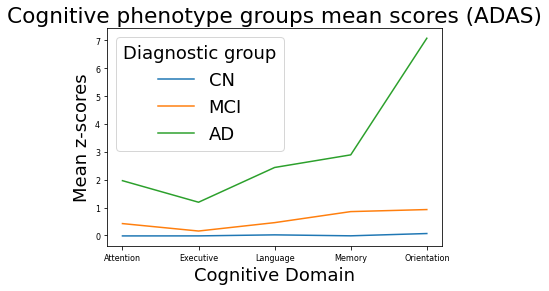

In [52]:
metadata_path = "./Tests/ADAS_Metadata.csv"
#Compute zscores means for each cognitive domain by diagnostic group
ADAS_means_CN = zscores_means(X_ADAS_CN, "CN", metadata_path)
ADAS_means_MCI = zscores_means(X_ADAS_MCI, "MCI", metadata_path)
ADAS_means_AD = zscores_means(X_ADAS_AD, "AD", metadata_path)

#Concanetate all dataframes
ADAS_means_df = pd.concat([ADAS_means_CN, ADAS_means_MCI, ADAS_means_AD])
ADAS_means_df.index = range(len(ADAS_means_df))

#plot dataframe
sns.lineplot(data=ADAS_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (ADAS)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

### 4.2. MMSE

In [53]:
#get test results for the controls
MMSE_CN = MMSE[MMSE.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", MMSE_CN.shape[0])

Number of controls:  417


In [54]:
#filter table to show only tests results
MMSE_CN = MMSE_CN[MMSE_columns]
MMSE_CN.head()

MMDATE  MMYEAR  MMMONTH  MMDAY  MMSEASON  MMHOSPIT  MMFLOOR  MMCITY  \
0      1.0     1.0      1.0    1.0       1.0       1.0      1.0     1.0   
4      1.0     1.0      1.0    1.0       1.0       1.0      1.0     1.0   
7      1.0     1.0      1.0    1.0       1.0       1.0      1.0     1.0   
10     1.0     1.0      1.0    1.0       1.0       1.0      1.0     1.0   
11     1.0     1.0      1.0    1.0       2.0       1.0      1.0     1.0   

    MMAREA  MMSTATE  MMBALL  MMFLAG  MMTREE  MMD  MML  MMR  MMO  MMW  \
0      1.0      1.0     1.0     1.0     1.0  1.0  1.0  1.0  1.0  1.0   
4      1.0      1.0     1.0     1.0     1.0  1.0  1.0  1.0  1.0  1.0   
7      1.0      1.0     1.0     1.0     1.0  1.0  1.0  1.0  1.0  1.0   
10     1.0      1.0     1.0     1.0     1.0  1.0  1.0  1.0  1.0  1.0   
11     1.0      1.0     1.0     1.0     1.0  1.0  1.0  1.0  1.0  1.0   

    MMBALLDL  MMFLAGDL  MMTREEDL  MMWATCH  MMPENCIL  MMREPEAT  MMHAND  MMFOLD  \
0        2.0       1.0       2.0      1.0       1.0       1.0     1.0     1.0   
4        1.0       1.0       1.0      1.0       1.0       1.0     2.0     1.0   
7        2.0       1.0       2.0      1.0       1.0       1.0     1.0     1.0   
10       1.0       2.0       1.0      1.0       1.0       1.0     1.0     1.0   
11       1.0       1.0       2.0      1.0       1.0       1.0     1.0     1.0   

    MMONFLR  MMREAD  MMWRITE  MMDRAW  
0       1.0     1.0      1.0     1.0  
4       1.0     1.0      1.0     1.0  
7       1.0     1.0      1.0     1.0  
10      1.0     1.0      1.0     1.0  
11      1.0     1.0      1.0     1.0

In [55]:
#Control summary statistics
MMSE_CN.describe()

MMDATE  MMYEAR  MMMONTH       MMDAY    MMSEASON    MMHOSPIT  \
count  417.000000   417.0    417.0  417.000000  417.000000  417.000000   
mean     1.033573     1.0      1.0    1.002398    1.067146    1.016787   
std      0.180344     0.0      0.0    0.048970    0.250576    0.128625   
min      1.000000     1.0      1.0    1.000000    1.000000    1.000000   
25%      1.000000     1.0      1.0    1.000000    1.000000    1.000000   
50%      1.000000     1.0      1.0    1.000000    1.000000    1.000000   
75%      1.000000     1.0      1.0    1.000000    1.000000    1.000000   
max      2.000000     1.0      1.0    2.000000    2.000000    2.000000   

          MMFLOOR      MMCITY      MMAREA  MMSTATE  MMBALL      MMFLAG  \
count  417.000000  417.000000  417.000000    417.0   417.0  417.000000   
mean     1.038369    1.016787    1.052758      1.0     1.0    1.002398   
std      0.192317    0.128625    0.223818      0.0     0.0    0.048970   
min      1.000000    1.000000    1.000000      1.0     1.0    1.000000   
25%      1.000000    1.000000    1.000000      1.0     1.0    1.000000   
50%      1.000000    1.000000    1.000000      1.0     1.0    1.000000   
75%      1.000000    1.000000    1.000000      1.0     1.0    1.000000   
max      2.000000    2.000000    2.000000      1.0     1.0    2.000000   

           MMTREE         MMD         MML         MMR         MMO         MMW  \
count  417.000000  417.000000  417.000000  417.000000  417.000000  417.000000   
mean     1.002398    1.002398    1.019185    1.071942    1.064748    1.009592   
std      0.048970    0.048970    0.137338    0.258703    0.246377    0.097587   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      2.000000    2.000000    2.000000    2.000000    2.000000    2.000000   

         MMBALLDL    MMFLAGDL    MMTREEDL  MMWATCH    MMPENCIL    MMREPEAT  \
count  417.000000  417.000000  417.000000    417.0  417.000000  417.000000   
mean     1.028777    1.127098    1.124700      1.0    1.002398    1.091127   
std      0.167380    0.333483    0.330776      0.0    0.048970    0.288135   
min      1.000000    1.000000    1.000000      1.0    1.000000    1.000000   
25%      1.000000    1.000000    1.000000      1.0    1.000000    1.000000   
50%      1.000000    1.000000    1.000000      1.0    1.000000    1.000000   
75%      1.000000    1.000000    1.000000      1.0    1.000000    1.000000   
max      2.000000    2.000000    2.000000      1.0    2.000000    2.000000   

           MMHAND      MMFOLD     MMONFLR  MMREAD     MMWRITE      MMDRAW  
count  417.000000  417.000000  417.000000   417.0  417.000000  417.000000  
mean     1.064748    1.002398    1.007194     1.0    1.007194    1.071942  
std      0.246377    0.048970    0.084615     0.0    0.084615    0.258703  
min      1.000000    1.000000    1.000000     1.0    1.000000    1.000000  
25%      1.000000    1.000000    1.000000     1.0    1.000000    1.000000  
50%      1.000000    1.000000    1.000000     1.0    1.000000    1.000000  
75%      1.000000    1.000000    1.000000     1.0    1.000000    1.000000  
max      2.000000    2.000000    2.000000     1.0    2.000000    2.000000

#### Fit the scaler with the controls data

In [56]:
scaler = StandardScaler()

scaler.fit(MMSE_CN)

StandardScaler()

#### Transform data

In [57]:
MMSE_DX = pd.merge(MMSE,ADNIMERGE,on='RID')

X_MMSE = MMSE_DX[MMSE_columns] #tests scores
Y_MMSE = pd.DataFrame(MMSE_DX["DX_bl"]) #diagnosis

#scale data
X_MMSE = scaler.transform(X_MMSE)


#Convert into pandas dataframe
X_MMSE = pd.DataFrame(X_MMSE,columns=MMSE_columns)
X_MMSE.head()

MMDATE  MMYEAR  MMMONTH      MMDAY  MMSEASON  MMHOSPIT   MMFLOOR  \
0 -0.186385     0.0      0.0  -0.049029 -0.268290 -0.130664 -0.199750   
1  5.365232     0.0      1.0  20.396078  3.727312 -0.130664  5.006246   
2 -0.186385     0.0      0.0  -0.049029 -0.268290 -0.130664 -0.199750   
3 -0.186385     0.0      0.0  -0.049029 -0.268290 -0.130664 -0.199750   
4  5.365232     1.0      0.0  -0.049029 -0.268290  7.653197 -0.199750   

     MMCITY  MMAREA  MMSTATE  MMBALL    MMFLAG    MMTREE       MMD       MML  \
0 -0.130664  -0.236      0.0     0.0 -0.049029 -0.049029 -0.049029 -0.139857   
1 -0.130664  -0.236      0.0     0.0 -0.049029 -0.049029 -0.049029 -0.139857   
2 -0.130664  -0.236      0.0     0.0 -0.049029 -0.049029 -0.049029 -0.139857   
3 -0.130664  -0.236      0.0     0.0 -0.049029 -0.049029 -0.049029 -0.139857   
4 -0.130664  -0.236      0.0     0.0 -0.049029 -0.049029 -0.049029  7.150175   

        MMR       MMO        MMW  MMBALLDL  MMFLAGDL  MMTREEDL  MMWATCH  \
0 -0.278423 -0.263117  -0.098414  5.809475 -0.381581  2.649383      0.0   
1 -0.278423  3.800585  10.161201  5.809475  2.620673  2.649383      0.0   
2 -0.278423 -0.263117  -0.098414 -0.172133  2.620673  2.649383      0.0   
3 -0.278423 -0.263117  -0.098414 -0.172133 -0.381581 -0.377446      0.0   
4  3.591657  3.800585  -0.098414  5.809475  2.620673  2.649383      0.0   

   MMPENCIL  MMREPEAT    MMHAND    MMFOLD   MMONFLR  MMREAD   MMWRITE  \
0 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126     0.0 -0.085126   
1 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126     0.0 -0.085126   
2 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126     0.0 -0.085126   
3 -0.049029 -0.316645  3.800585 -0.049029 -0.085126     0.0 -0.085126   
4 -0.049029 -0.316645 -0.263117 -0.049029 -0.085126     0.0 -0.085126   

     MMDRAW  
0 -0.278423  
1 -0.278423  
2  3.591657  
3 -0.278423  
4  3.591657

#### Divide data by diagnostic group

In [58]:
#Get indexes of subjects belonging to each group
MMSE_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MMSE = Y_MMSE.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MMSE_indexes[dx] = Y_MMSE.index[Y_MMSE['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MMSE_CN = X_MMSE.iloc[MMSE_indexes["CN"]]
X_MMSE_MCI = X_MMSE.iloc[MMSE_indexes["MCI"]]
X_MMSE_AD = X_MMSE.iloc[MMSE_indexes["AD"]]

print("Number of instances CN: ", X_MMSE_CN.shape[0])
print("Number of instances MCI: ", X_MMSE_MCI.shape[0])
print("Number of instances AD: ", X_MMSE_AD.shape[0])

Number of instances CN:  523
Number of instances MCI:  878
Number of instances AD:  339


#### Plot z-scores by domain

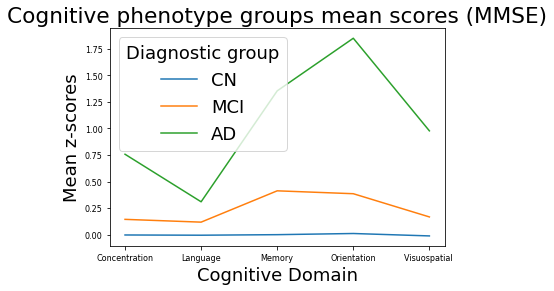

In [59]:
metadata_path = "./Tests/MMSE_Metadata.csv"
#Compute zscores means for each cognitive domain by diagnostic group
MMSE_means_CN = zscores_means(X_MMSE_CN, "CN", metadata_path)
MMSE_means_MCI = zscores_means(X_MMSE_MCI, "MCI", metadata_path)
MMSE_means_AD = zscores_means(X_MMSE_AD, "AD", metadata_path)

#Concanetate all dataframes
MMSE_means_df = pd.concat([MMSE_means_CN, MMSE_means_MCI, MMSE_means_AD])
MMSE_means_df.index = range(len(MMSE_means_df))

#plot dataframe
sns.lineplot(data=MMSE_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (MMSE)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

### 4.3. MOCA

In [60]:
#get test results for the controls
MOCA_CN = MOCA[MOCA.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", MOCA_CN.shape[0])

Number of controls:  306


In [61]:
#filter table to show only tests results
MOCA_CN = MOCA_CN[MOCA_columns]
MOCA_CN.head()

TRAILS  CUBE  CLOCKCON  CLOCKNO  CLOCKHAN  LION  RHINO  CAMEL  IMMT1W1  \
484     1.0   0.0       1.0      0.0       1.0   1.0    0.0    1.0      1.0   
489     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0   
494     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0   
507     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0   
508     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0      0.0   

     IMMT1W2  IMMT1W3  IMMT1W4  IMMT1W5  IMMT2W1  IMMT2W2  IMMT2W3  IMMT2W4  \
484      1.0      0.0      1.0      1.0      1.0      1.0      1.0      1.0   
489      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
494      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
507      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
508      1.0      1.0      1.0      1.0      0.0      1.0      1.0      1.0   

     IMMT2W5  DIGFOR  DIGBACK  LETTERS  SERIAL1  SERIAL2  SERIAL3  SERIAL4  \
484      1.0     1.0      1.0      0.0      1.0      1.0      0.0      0.0   
489      1.0     1.0      0.0      0.0      1.0      1.0      1.0      1.0   
494      1.0     1.0      1.0      0.0      1.0      1.0      1.0      1.0   
507      1.0     1.0      1.0      0.0      1.0      1.0      1.0      1.0   
508      1.0     0.0      1.0      0.0      1.0      1.0      1.0      1.0   

     SERIAL5  REPEAT1  REPEAT2  FFLUENCY  ABSTRAN  ABSMEAS  DELW1  DELW2  \
484      0.0      1.0      1.0      17.0      1.0      0.0    1.0    1.0   
489      1.0      1.0      1.0      15.0      1.0      1.0    3.0    2.0   
494      1.0      1.0      1.0      22.0      1.0      1.0    1.0    3.0   
507      1.0      1.0      0.0      20.0      1.0      1.0    1.0    1.0   
508      1.0      1.0      1.0      13.0      1.0      1.0    3.0    3.0   

     DELW3  DELW4  DELW5  DATE  MONTH  YEAR  DAY  PLACE  CITY  
484    1.0    1.0    1.0   1.0    1.0   1.0  1.0    1.0   1.0  
489    3.0    3.0    3.0   1.0    1.0   1.0  1.0    1.0   1.0  
494    3.0    2.0    2.0   1.0    1.0   1.0  1.0    1.0   1.0  
507    1.0    1.0    1.0   1.0    1.0   1.0  1.0    1.0   1.0  
508    3.0    3.0    3.0   1.0    1.0   1.0  1.0    1.0   1.0

In [62]:
#Control summary statistics
MOCA_CN.describe()

TRAILS        CUBE    CLOCKCON     CLOCKNO    CLOCKHAN        LION  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.921569    0.705882    0.993464    0.924837    0.826797    0.996732   
std      0.269290    0.456391    0.080713    0.264087    0.379042    0.057166   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    0.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            RHINO       CAMEL     IMMT1W1     IMMT1W2     IMMT1W3     IMMT1W4  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.918301    0.996732    0.937908    0.960784    0.931373    0.911765   
std      0.274355    0.057166    0.241717    0.194426    0.253234    0.284101   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          IMMT1W5     IMMT2W1     IMMT2W2     IMMT2W3     IMMT2W4     IMMT2W5  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.977124    0.960784    0.983660    0.986928    0.977124    0.990196   
std      0.149752    0.194426    0.126987    0.113769    0.149752    0.098690   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           DIGFOR     DIGBACK     LETTERS     SERIAL1     SERIAL2     SERIAL3  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.960784    0.934641    0.209150    0.993464    0.905229    0.901961   
std      0.194426    0.247564    0.568617    0.080713    0.293378    0.297855   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    0.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    0.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    0.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    5.000000    1.000000    1.000000    1.000000   

          SERIAL4     SERIAL5     REPEAT1     REPEAT2    FFLUENCY     ABSTRAN  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.901961    0.892157    0.944444    0.800654   14.725490    0.947712   
std      0.297855    0.310690    0.229437    0.400163    4.786916    0.222971   
min      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
25%      1.000000    1.000000    1.000000    1.000000   11.250000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000   15.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000   18.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000   28.000000    1.000000   

          ABSMEAS       DELW1       DELW2       DELW3       DELW4       DELW5  \
count  306.000000  306.000000  306.000000  306.000000  306.000000  306.000000   
mean     0.898693    1.411765    1.457516    1.591503    1.552288    1.437908   
std      0.302229    0.988653    0.797430    1.001536    0.901117    0.731762   
min      0.000000    0.000000    0.00

#### Fit the scaler with the controls data

In [63]:
scaler = StandardScaler()

scaler.fit(MOCA_CN)

StandardScaler()

#### Transform data

In [64]:
MOCA_DX = pd.merge(MOCA,ADNIMERGE,on='RID')

X_MOCA = MOCA_DX[MOCA_columns] #tests scores
Y_MOCA = pd.DataFrame(MOCA_DX["DX_bl"]) #diagnosis

#scale data
X_MOCA = scaler.transform(X_MOCA)

#Convert into pandas dataframe
X_MOCA = pd.DataFrame(X_MOCA,columns=MOCA_columns)
X_MOCA.head()

TRAILS      CUBE  CLOCKCON   CLOCKNO  CLOCKHAN     LION     RHINO  \
0  0.29173  0.645497  0.081111  0.285083  0.457697  0.05726  0.298275   
1  0.29173 -1.549193  0.081111  0.285083  0.457697  0.05726  0.298275   
2  0.29173 -1.549193  0.081111  0.285083  0.457697  0.05726  0.298275   
3  0.29173  0.645497  0.081111  0.285083  0.457697  0.05726  0.298275   
4  0.29173 -1.549193  0.081111  0.285083  0.457697  0.05726  0.298275   

     CAMEL   IMMT1W1   IMMT1W2   IMMT1W3   IMMT1W4   IMMT1W5   IMMT2W1  \
0  0.05726  0.257298  0.202031  0.271448  0.311086  0.153008  0.202031   
1  0.05726  0.257298  0.202031  0.271448  0.311086  0.153008  0.202031   
2  0.05726  0.257298  0.202031  0.271448  0.311086  0.153008  0.202031   
3  0.05726  0.257298  0.202031  0.271448  0.311086  0.153008  0.202031   
4  0.05726  0.257298  0.202031  0.271448  0.311086  0.153008  0.202031   

    IMMT2W2   IMMT2W3   IMMT2W4   IMMT2W5    DIGFOR   DIGBACK   LETTERS  \
0  0.128885  0.115087  0.153008  0.099504  0.202031  0.264443  1.393107   
1  0.128885  0.115087  0.153008  0.099504  0.202031  0.264443  1.393107   
2  0.128885  0.115087  0.153008  0.099504  0.202031  0.264443 -0.368425   
3  0.128885  0.115087  0.153008  0.099504  0.202031  0.264443 -0.368425   
4  0.128885  0.115087  0.153008  0.099504  0.202031  0.264443 -0.368425   

    SERIAL1   SERIAL2  SERIAL3  SERIAL4   SERIAL5   REPEAT1   REPEAT2  \
0  0.081111  0.323563  0.32969  0.32969  0.347677  0.242536  0.498979   
1  0.081111  0.323563  0.32969  0.32969  0.347677  0.242536  0.498979   
2  0.081111  0.323563  0.32969  0.32969  0.347677  0.242536  0.498979   
3  0.081111  0.323563  0.32969  0.32969  0.347677  0.242536  0.498979   
4  0.081111 -3.090586 -3.03315 -3.03315 -2.876235  0.242536  0.498979   

   FFLUENCY   ABSTRAN   ABSMEAS     DELW1     DELW2     DELW3     DELW4  \
0  3.196114  0.234888  0.335749  0.595961 -0.574679  0.408538 -0.613896   
1  1.103665 -4.257347  0.335749 -1.430307  0.681405 -1.591665  1.609208   
2  0.685175  0.234888  0.335749 -0.417173 -0.574679 -1.591665 -1.725448   
3  1.522155  0.234888  0.335749  1.609095  1.937488  0.408538  0.497656   
4 -0.151805  0.234888  0.335749  0.595961 -0.574679 -1.591665  0.497656   

      DELW5      DATE     MONTH     YEAR  DAY    PLACE      CITY  
0 -0.599410  0.193101  0.081111  0.05726  0.0  0.05726  0.099504  
1 -1.968212  0.193101  0.081111  0.05726  0.0  0.05726  0.099504  
2 -0.599410  0.193101  0.081111  0.05726  0.0  0.05726  0.099504  
3  0.769392  0.193101  0.081111  0.05726  0.0  0.05726  0.099504  
4 -0.599410  0.193101  0.081111  0.05726  0.0  0.05726  0.099504

#### Plot z-scores by domain

#### Divide data by diagnostic group

In [65]:
#Get indexes of subjects belonging to each group
MOCA_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MOCA = Y_MOCA.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MOCA_indexes[dx] = Y_MOCA.index[Y_MOCA['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MOCA_CN = X_MOCA.iloc[MOCA_indexes["CN"]]
X_MOCA_MCI = X_MOCA.iloc[MOCA_indexes["MCI"]]
X_MOCA_AD = X_MOCA.iloc[MOCA_indexes["AD"]]

print("Number of instances CN: ", X_MOCA_CN.shape[0])
print("Number of instances MCI: ", X_MOCA_MCI.shape[0])
print("Number of instances AD: ", X_MOCA_AD.shape[0])

Number of instances CN:  645
Number of instances MCI:  684
Number of instances AD:  212


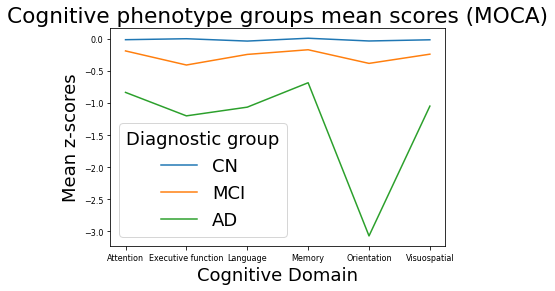

In [66]:
metadata_path = "./Tests/MOCA_Metadata.csv"
#Compute zscores means for each cognitive domain by diagnostic group
MOCA_means_CN = zscores_means(X_MOCA_CN, "CN", metadata_path)
MOCA_means_MCI = zscores_means(X_MOCA_MCI, "MCI", metadata_path)
MOCA_means_AD = zscores_means(X_MOCA_AD, "AD", metadata_path)

#Concanetate all dataframes
MOCA_means_df = pd.concat([MOCA_means_CN, MOCA_means_MCI, MOCA_means_AD])
MOCA_means_df.index = range(len(MOCA_means_df))

#plot dataframe
sns.lineplot(data=MOCA_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (MOCA)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

### 4.4. Merged data

In [67]:
#get test results for the controls
merged_CN = df[df.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", merged_CN.shape[0])

Number of controls:  184


In [68]:
#filter table to show only tests results
merged_columns = ADAS_columns + MMSE_columns + MOCA_columns
merged_CN = merged_CN[merged_columns]
merged_CN.head()

Q1SCORE  Q2SCORE  Q3SCORE  Q4SCORE  Q5SCORE  Q6SCORE  Q7SCORE  Q8SCORE  \
127      2.0      0.0      1.0      2.0      0.0      0.0      0.0      3.0   
129      4.0      0.0      0.0      3.0      0.0      0.0      0.0      2.0   
131      1.0      0.0      0.0      2.0      0.0      0.0      0.0      1.0   
137      2.0      0.0      0.0      1.0      0.0      0.0      1.0      0.0   
138      5.0      0.0      0.0      6.0      0.0      0.0      0.0      4.0   

     Q9SCORE  Q10SCORE  Q11SCORE  Q12SCORE  Q13SCORE  MMDATE  MMYEAR  MMMONTH  \
127      0.0       0.0       0.0       0.0       0.0     1.0     1.0      1.0   
129      0.0       0.0       0.0       0.0       1.0     1.0     1.0      1.0   
131      0.0       0.0       0.0       0.0       0.0     1.0     1.0      1.0   
137      0.0       0.0       0.0       0.0       1.0     1.0     1.0      1.0   
138      0.0       0.0       0.0       0.0       1.0     1.0     1.0      1.0   

     MMDAY  MMSEASON  MMHOSPIT  MMFLOOR  MMCITY  MMAREA  MMSTATE  MMBALL  \
127    1.0       1.0       1.0      1.0     1.0     1.0      1.0     1.0   
129    1.0       1.0       1.0      1.0     1.0     1.0      1.0     1.0   
131    1.0       1.0       1.0      1.0     1.0     1.0      1.0     1.0   
137    1.0       1.0       1.0      1.0     1.0     1.0      1.0     1.0   
138    1.0       1.0       1.0      1.0     1.0     2.0      1.0     1.0   

     MMFLAG  MMTREE  MMD  MML  MMR  MMO  MMW  MMBALLDL  MMFLAGDL  MMTREEDL  \
127     1.0     1.0  1.0  1.0  1.0  1.0  1.0       1.0       1.0       1.0   
129     1.0     1.0  1.0  1.0  1.0  1.0  1.0       1.0       1.0       1.0   
131     1.0     1.0  1.0  1.0  1.0  1.0  1.0       1.0       1.0       2.0   
137     1.0     1.0  1.0  1.0  1.0  1.0  1.0       1.0       1.0       1.0   
138     1.0     1.0  1.0  1.0  1.0  1.0  1.0       1.0       1.0       1.0   

     MMWATCH  MMPENCIL  MMREPEAT  MMHAND  MMFOLD  MMONFLR  MMREAD  MMWRITE  \
127      1.0       1.0       1.0     2.0     1.0      1.0     1.0      1.0   
129      1.0       1.0       1.0     1.0     1.0      1.0     1.0      1.0   
131      1.0       1.0       1.0     1.0     1.0      1.0     1.0      1.0   
137      1.0       1.0       1.0     1.0     1.0      1.0     1.0      1.0   
138      1.0       1.0       1.0     1.0     1.0      1.0     1.0      1.0   

     MMDRAW  TRAILS  CUBE  CLOCKCON  CLOCKNO  CLOCKHAN  LION  RHINO  CAMEL  \
127     1.0     1.0   0.0       1.0      0.0       1.0   1.0    0.0    1.0   
129     1.0     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0   
131     1.0     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0   
137     1.0     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0   
138     1.0     1.0   1.0       1.0      1.0       1.0   1.0    1.0    1.0   

     IMMT1W1  IMMT1W2  IMMT1W3  IMMT1W4  IMMT1W5  IMMT2W1  IMMT2W2  IMMT2W3  \
127      1.0      1.0      0.0      1.0      1.0      1.0      1.0      1.0   
129      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
131      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
137      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
138      0.0      1.0      1.0      1.0      1.0      0.0      1.0      1.0   

     IMMT2W4  IMMT2W5  DIGFOR  DIGBACK  LETTERS  SERIAL1  SERIAL2  SERIAL3  \
127      1.0      1.0     1.0      1.0      0.0      1.0      1.0      0.0   
129      1.0      1.0     1.0      0.0      0.0      1.0      1.0      1.0   
131      1.0      1.0     1.0      1.0      0.0      1.0      1.0      1.0   
137      1.0      1.0     1.0      1.0      0.0      1.0      1.0      1.0   
138      1.0      1.0     0.0      1.0      0.0      1.0      1.0      1.0   

     SERIAL4  SERIAL5  REPEAT1  REPEAT2  FFLUENCY  ABSTRAN  ABSMEAS  DELW1  \
127      0.0      0.0      1.0      1.0      17.0      1.0      0.0    1.0   
129      1.0      1.0      1.0      1.0      15.0      1.0      1.0    3.0   
1

#### Fit the scaler with the controls data

In [69]:
scaler = StandardScaler()

scaler.fit(merged_CN)

StandardScaler()

#### Transform data

In [70]:
merged_DX = pd.merge(df,ADNIMERGE,on='RID')

X_merged = merged_DX[merged_columns] #tests scores
Y_merged = pd.DataFrame(merged_DX["DX_bl"]) #diagnosis

#scale data
X_merged = scaler.transform(X_merged)

#Convert into pandas dataframe
X_merged = pd.DataFrame(X_merged,columns=merged_columns)
X_merged.head()

Q1SCORE  Q2SCORE   Q3SCORE   Q4SCORE   Q5SCORE   Q6SCORE   Q7SCORE  \
0 -1.508121 -0.19027 -0.711416 -0.480655 -0.286972 -0.273434 -0.312115   
1  0.020773 -0.19027  1.185693 -0.480655 -0.286972 -0.273434 -0.312115   
2 -0.743674 -0.19027 -0.711416  0.065274 -0.286972 -0.273434 -0.312115   
3  0.020773 -0.19027  1.185693 -0.480655 -0.286972 -0.273434 -0.312115   
4  0.785220 -0.19027  1.185693 -0.480655 -0.286972 -0.273434 -0.312115   

    Q8SCORE   Q9SCORE  Q10SCORE  Q11SCORE  Q12SCORE  Q13SCORE    MMDATE  \
0 -0.515572 -0.140692 -0.149071 -0.226779 -0.158334 -0.676418 -0.183597   
1  0.550329 -0.140692 -0.149071 -0.226779 -0.158334 -0.676418 -0.183597   
2 -0.515572 -0.140692 -0.149071 -0.226779 -0.158334 -0.676418 -0.183597   
3 -1.048522 -0.140692 -0.149071 -0.226779 -0.158334  0.961225 -0.183597   
4  0.550329 -0.140692 -0.149071 -0.226779 -0.158334  0.961225 -0.183597   

   MMYEAR  MMMONTH  MMDAY  MMSEASON  MMHOSPIT   MMFLOOR    MMCITY    MMAREA  \
0     0.0      0.0    0.0 -0.286972 -0.149071 -0.183597 -0.149071 -0.239732   
1     0.0      0.0    0.0 -0.286972 -0.149071 -0.183597 -0.149071 -0.239732   
2     0.0      0.0    0.0 -0.286972 -0.149071 -0.183597 -0.149071 -0.239732   
3     0.0      0.0    0.0 -0.286972 -0.149071 -0.183597 -0.149071 -0.239732   
4     0.0      0.0    0.0 -0.286972 -0.149071 -0.183597  6.708204 -0.239732   

   MMSTATE  MMBALL  MMFLAG  MMTREE       MMD       MML       MMR       MMO  \
0      0.0     0.0     0.0     0.0 -0.073922  5.446712 -0.329293 -0.286972   
1      0.0     0.0     0.0     0.0 -0.073922 -0.183597 -0.329293 -0.286972   
2      0.0     0.0     0.0     0.0 -0.073922 -0.183597 -0.329293 -0.286972   
3      0.0     0.0     0.0     0.0 -0.073922 -0.183597  3.036811  3.484660   
4      0.0     0.0     0.0     0.0 -0.073922 -0.183597 -0.329293 -0.286972   

        MMW  MMBALLDL  MMFLAGDL  MMTREEDL  MMWATCH  MMPENCIL  MMREPEAT  \
0 -0.104828 -0.167132  2.713602 -0.329293      0.0 -0.073922 -0.349215   
1 -0.104828 -0.167132 -0.368514 -0.329293      0.0 -0.073922 -0.349215   
2 -0.104828 -0.167132 -0.368514 -0.329293      0.0 -0.073922 -0.349215   
3 -0.104828 -0.167132 -0.368514  3.036811      0.0 -0.073922 -0.349215   
4 -0.104828 -0.167132 -0.368514  3.036811      0.0 -0.073922 -0.349215   

     MMHAND  MMFOLD   MMONFLR  MMREAD    MMWRITE    MMDRAW    TRAILS  \
0 -0.252158     0.0 -0.073922     0.0  -0.073922 -0.264135  0.308607   
1  3.965763     0.0 -0.073922     0.0  -0.073922 -0.264135  0.308607   
2 -0.252158     0.0 -0.073922     0.0  -0.073922 -0.264135  0.308607   
3 -0.252158     0.0 -0.073922     0.0  -0.073922 -0.264135  0.308607   
4 -0.252158     0.0 -0.073922     0.0  13.527749 -0.264135  0.308607   

       CUBE  CLOCKCON   CLOCKNO  CLOCKHAN  LION     RHINO  CAMEL   IMMT1W1  \
0  0.644503  0.104828  0.319055  0.501698   0.0  0.308607    0.0  0.275723   
1 -1.551582  0.104828  0.319055  0.501698   0.0  0.308607    0.0  0.275723   
2 -1.551582  0.104828  0.319055  0.501698   0.0  0.308607    0.0  0.275723   
3  0.644503  0.104828  0.319055  0.501698   0.0  0.308607    0.0  0.275723   
4 -1.551582  0.104828  0.319055  0.501698   0.0  0.308607    0.0  0.275723   

    IMMT1W2   IMMT1W3   IMMT1W4   IMMT1W5   IMMT2W1   IMMT2W2   IMMT2W3  \
0  0.183597  0.319055  0.319055  0.167132  0.198867  0.149071  0.104828   
1  0.183597  0.319055  0.319055  0.167132  0.198867  0.149071  0.104828   
2  0.183597  0.319055  0.319055  0.167132  0.198867  0.149071  0.104828   
3  0.183597  0.319055  0.319055  0.167132  0.198867  0.149071  0.104828   
4  0.183597  0.319055  0.319055  0.167132  0.198867  0.149071  0.104828   

    IMMT2W4   IMMT2W5    DIGFOR   DIGBACK   LETTERS  SERIAL1   SERIAL2  \
0  0.183597  0.128742  0.183597  0.286972  1.133893      0.0  0.319055   
1  0.183597  0.128742  0.183597  0.286972  1.133893      0.0  0.319055   
2  0.183597  0.128742  0.183597  0.286972 -0.377964      0.0  0.319055   
3  0.183597  0.128742  0.183597  0.286972 -0.377964      0.0  0.319055

#### Divide data by diagnostic group

In [71]:
#Get indexes of subjects belonging to each group
merged_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_merged = Y_merged.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    merged_indexes[dx] = Y_merged.index[Y_merged['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_merged_CN = X_merged.iloc[merged_indexes["CN"]]
X_merged_MCI = X_merged.iloc[merged_indexes["MCI"]]
X_merged_AD = X_merged.iloc[merged_indexes["AD"]]

print("Number of instances CN: ", X_merged_CN.shape[0])
print("Number of instances MCI: ", X_merged_MCI.shape[0])
print("Number of instances AD: ", X_merged_AD.shape[0])

Number of instances CN:  288
Number of instances MCI:  468
Number of instances AD:  142


#### Plot z-scores by domain

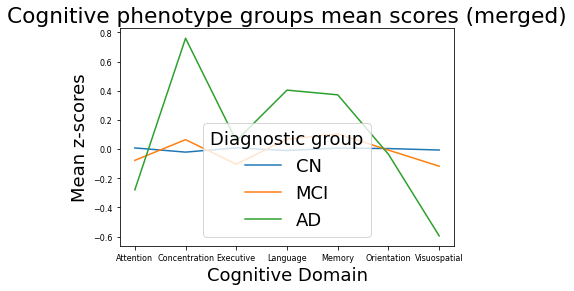

In [72]:
metadata_path = "./Tests/merged_Metadata.csv"
#Compute zscores means for each cognitive domain by diagnostic group
merged_means_CN = zscores_means(X_merged_CN, "CN", metadata_path)
merged_means_MCI = zscores_means(X_merged_MCI, "MCI", metadata_path)
merged_means_AD = zscores_means(X_merged_AD, "AD", metadata_path)

#Concanetate all dataframes
merged_means_df = pd.concat([merged_means_CN, merged_means_MCI, merged_means_AD])
merged_means_df.index = range(len(merged_means_df))

#plot dataframe
sns.lineplot(data=merged_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (merged)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

## 5. ADJACENCY MATRIX

Simple correlation (a.k.a. Pearson correlation coefficient) may not give a complete picture while trying to understand the relationship between two variables (A and B) especially when there exist other influencing variables that affect A (and/or) B.
In fact, simple correlation mainly focuses on finding the influence of each variable on the other.

Whereas **partial correlation** is used to find the refined relationship between two variables with the effect of the other influencing variables being excluded/controlled.

#### Import required packages

In [73]:
#!pip install pingouin

In [74]:
from pingouin import partial_corr

#### Create partial correlation function

In [248]:
def par_corr(data_df):
    """
    Compute partial pairwise correlation of columns. 
    When a pair of columns are picked, then all other columns are treated as control variables. 
    
    @param data_df DataFrame
    @return DataFrame, whose data is a symmetric matrix
    """ 
    
    n = data_df.shape[1] #total number of tests
    mat = np.empty((n, n)) #empty matrix to store results 
    np.fill_diagonal(mat, 1) #diagonal elements have correlation equal to 1.0
    
    for i in range(n):
        for j in range(i + 1, n):
            #get columns names
            x = data_df.columns[i]
            y = data_df.columns[j]
            xy_colnames = [data_df.columns[index] for index in [i,j]]
            covar = [ var for var in data_df.columns if var not in xy_colnames]
            
            #partial correlation
            corr_df = partial_corr(data=data_df, x=x, y=y, covar=covar, method='spearman') #partial correlation stats
            p_value = corr_df.iloc[0]['p-val']
            corr = corr_df.iloc[0]['r'] #get partial correlation value
            #if p_value < 0.05:
            #    corr = corr_df.iloc[0]['r'] #get partial correlation value
            #else:
            #    corr = 0

            #store results
            mat[i, j] = corr
            mat[j, i] = corr
            
    return pd.DataFrame(mat, index=data_df.columns, columns=data_df.columns)

In [249]:
def plot_adjacency_mx(CN_mx, MCI_mx, AD_mx, battery_name):
    
    fig, axes = plt.subplots(1,3, figsize=(20,6))

    sns.heatmap(ax=axes[0],data=CN_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
    sns.heatmap(ax=axes[1],data=MCI_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)
    sns.heatmap(ax=axes[2],data=AD_mx, annot=False, cmap="Spectral", vmin=-1, vmax=1)

    #add titles to subfigures
    fig.suptitle('Adjacency matrixes (' + battery_name + ')')
    axes[0].title.set_text("Controls")
    axes[1].title.set_text("MCI")
    axes[2].title.set_text("AD")

    plt.show()

### ADAS-Cog

#### Divide data by diagnostic group

In [250]:
#Get indexes of subjects belonging to each group
ADAS_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_ADAS = Y_ADAS.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    ADAS_indexes[dx] = Y_ADAS.index[Y_ADAS['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_ADAS_CN = X_ADAS.iloc[ADAS_indexes["CN"]]
X_ADAS_MCI = X_ADAS.iloc[ADAS_indexes["MCI"]]
X_ADAS_AD = X_ADAS.iloc[ADAS_indexes["AD"]]

print("Number of instances CN: ", X_ADAS_CN.shape[0])
print("Number of instances MCI: ", X_ADAS_MCI.shape[0])
print("Number of instances AD: ", X_ADAS_AD.shape[0])

Number of instances CN:  659
Number of instances MCI:  699
Number of instances AD:  219


#### Compute adjacency matrixes

In [251]:
ADAS_CN_mx = par_corr(X_ADAS_CN)
ADAS_MCI_mx = par_corr(X_ADAS_MCI)
ADAS_AD_mx = par_corr(X_ADAS_AD)

#### Plot correlation matrixes as heatmaps

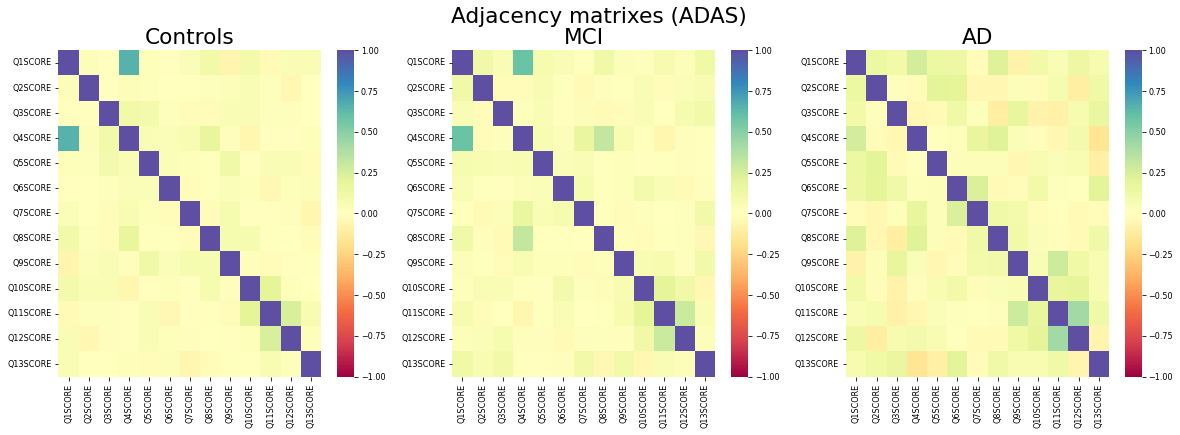

In [252]:
plot_adjacency_mx(ADAS_CN_mx, ADAS_MCI_mx, ADAS_AD_mx, 'ADAS')

### MMSE

#### Divide data by diagnostic group

In [253]:
#Get indexes of subjects belonging to each group
MMSE_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MMSE = Y_MMSE.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MMSE_indexes[dx] = Y_MMSE.index[Y_MMSE['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MMSE_CN = X_MMSE.iloc[MMSE_indexes["CN"]]
X_MMSE_MCI = X_MMSE.iloc[MMSE_indexes["MCI"]]
X_MMSE_AD = X_MMSE.iloc[MMSE_indexes["AD"]]

print("Number of instances CN: ", X_MMSE_CN.shape[0])
print("Number of instances MCI: ", X_MMSE_MCI.shape[0])
print("Number of instances AD: ", X_MMSE_AD.shape[0])

Number of instances CN:  523
Number of instances MCI:  878
Number of instances AD:  339


#### Compute adjacency matrixes

In [254]:
MMSE_CN_mx = par_corr(X_MMSE_CN)
MMSE_MCI_mx = par_corr(X_MMSE_MCI)
MMSE_AD_mx = par_corr(X_MMSE_AD)

#### Plot correlation matrixes as heatmaps

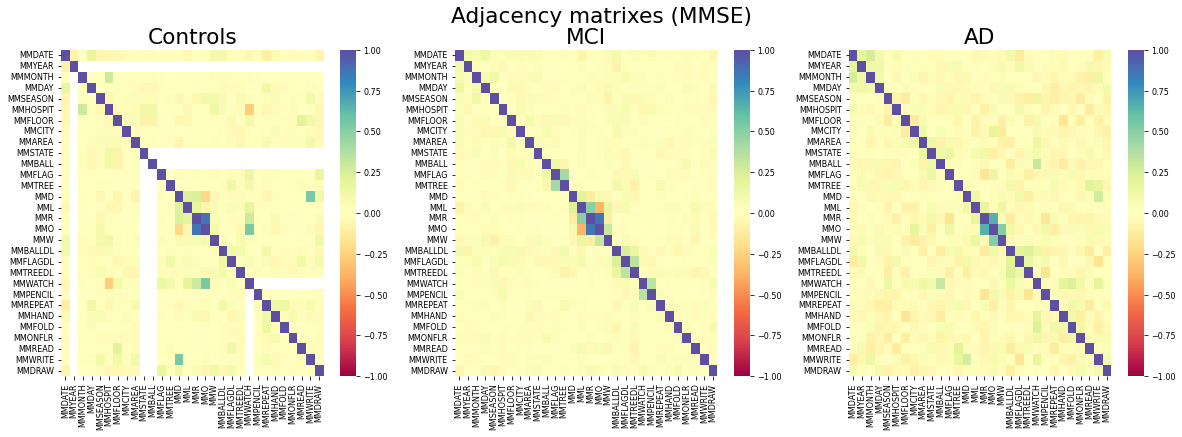

In [255]:
plot_adjacency_mx(MMSE_CN_mx, MMSE_MCI_mx, MMSE_AD_mx, 'MMSE')

Blank variables are those that are constant in the controls. Thus, the standard deviation is 0 (and the mean) is 0 and when computing the partial correlation matrixes it will raise an error. 

### MOCA

#### Divide data by diagnostic group

In [256]:
#Get indexes of subjects belonging to each group
MOCA_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MOCA = Y_MOCA.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MOCA_indexes[dx] = Y_MOCA.index[Y_MOCA['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MOCA_CN = X_MOCA.iloc[MOCA_indexes["CN"]]
X_MOCA_MCI = X_MOCA.iloc[MOCA_indexes["MCI"]]
X_MOCA_AD = X_MOCA.iloc[MOCA_indexes["AD"]]

print("Number of instances CN: ", X_MOCA_CN.shape[0])
print("Number of instances MCI: ", X_MOCA_MCI.shape[0])
print("Number of instances AD: ", X_MOCA_AD.shape[0])

Number of instances CN:  645
Number of instances MCI:  684
Number of instances AD:  212


#### Compute adjacency matrixes

In [257]:
MOCA_CN_mx = par_corr(X_MOCA_CN)
MOCA_MCI_mx = par_corr(X_MOCA_MCI)
MOCA_AD_mx = par_corr(X_MOCA_AD)

#### Plot correlation matrixes as heatmaps

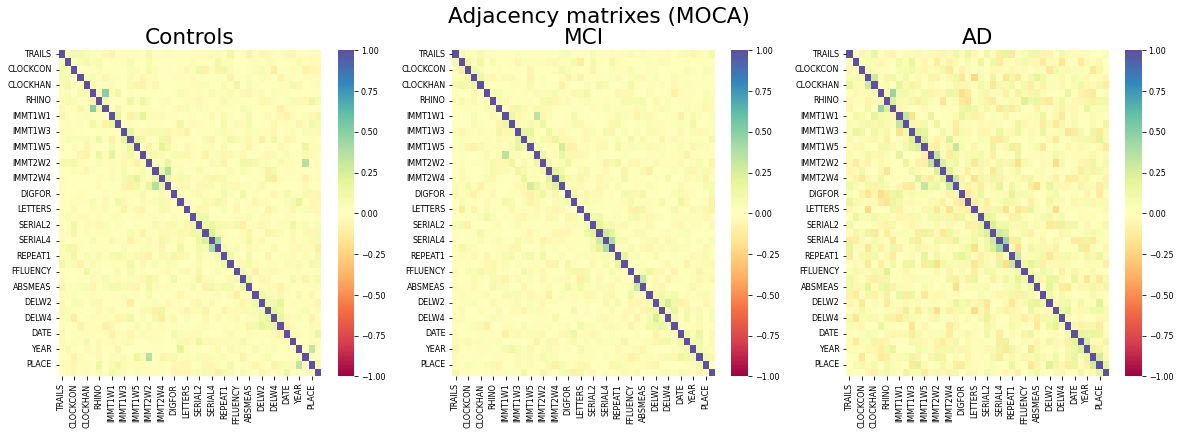

In [258]:
plot_adjacency_mx(MOCA_CN_mx, MOCA_MCI_mx, MOCA_AD_mx, 'MOCA')

He encontrado un artículo que puede ser interesante (hacen algo parecido a lo que queremos hacer), aunque todavía no he tenido tiempo de leerlo: https://doi.org/10.3390/healthcare10102045. Se centra especialmente en métodos de clasificación de Machine Learning clásicos usando ADAS-cog. Sin embargo, también realizan una matriz de correlaciones. 

### Merged

#### Divide data by diagnostic group

In [259]:
#Get indexes of subjects belonging to each group
merged_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_merged = Y_merged.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    merged_indexes[dx] = Y_merged.index[Y_merged['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_merged_CN = X_merged.iloc[merged_indexes["CN"]]
X_merged_MCI = X_merged.iloc[merged_indexes["MCI"]]
X_merged_AD = X_merged.iloc[merged_indexes["AD"]]

print("Number of instances CN: ", X_merged_CN.shape[0])
print("Number of instances MCI: ", X_merged_MCI.shape[0])
print("Number of instances AD: ", X_merged_AD.shape[0])

Number of instances CN:  288
Number of instances MCI:  468
Number of instances AD:  142


#### Compute adjacency matrixes

In [260]:
merged_CN_mx = par_corr(X_merged_CN)
merged_MCI_mx = par_corr(X_merged_MCI)
merged_AD_mx = par_corr(X_merged_AD)

#### Plot correlation matrixes as heatmaps

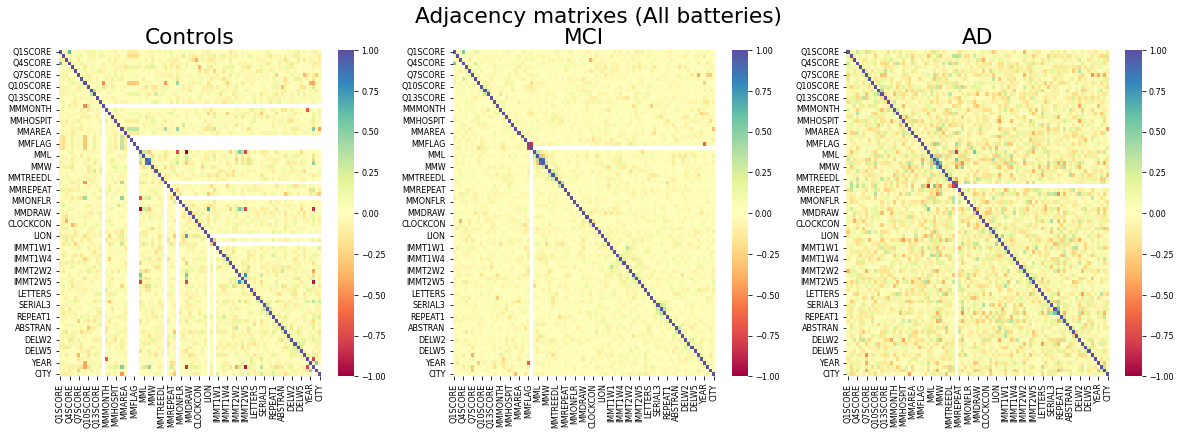

In [261]:
plot_adjacency_mx(merged_CN_mx, merged_MCI_mx, merged_AD_mx, 'All batteries')

## 6. GRAPH CONSTRUCTION

In [262]:
import networkx as nx

In [263]:
def cognitive_network(mx):
    """Function to remove diagonal elements and convert scores into absolute values. It returns a networkx graph"""

    for i in range(mx.shape[1]): #iterate matrix elements
        colname = mx.columns[i]
        #Remove diagonal elements
        mx[colname] =np.where((mx[colname]==1.0) | (mx[colname].isnull()),0, mx[colname]) 
        #Convert negative correlations in positive ones
        mx[colname] = np.where((mx[colname]<0),-1*mx[colname], mx[colname]) 
    
    #Create graph from adjacency matrix
    g = nx.from_numpy_array(mx.to_numpy())
    
    return g

In [264]:
def node_attributes(metadata_path, graphs_ls, X_ls): 
    """Function to add attributes to the nodes of the graph"""
    
    attribute_ls = ['Node', 'ADNI column', 'Test', 'Cognitive Domain']
    
    #Import node metadata
    metadata_df = pd.read_csv(metadata_path, sep=";", 
                                usecols = attribute_ls)
    
    #Add attributes
    for graph in graphs_ls:
        for attribute in attribute_ls:
            nx.set_node_attributes(graph, dict(zip(metadata_df.Node, metadata_df[attribute])), name=attribute)
        
    #add mean z-score to each node
    for dx in range(len(X_ls)): 
        means = X_ls[dx].mean(axis=0).tolist()
        nx.set_node_attributes(graphs_ls[dx], dict(zip(metadata_df.Node, means)), name='Zscore mean')

In [265]:
def draw_graph(graphs_ls, test_labels, pos, mapping, battery_name):
    
    #Color by NC domain
    ATTRIBUTE_NAME = 'Cognitive Domain'
    
    colors=[]
    for node in list(graphs_ls[0].nodes()): #iterate each node
        domain = graphs_ls[0].nodes[node][ATTRIBUTE_NAME]
        colors.append(mapping[domain])

    #Plot
    fig, axes = plt.subplots(1,3, figsize=(20,6))
    
    for i in range(len(graphs_ls)):
        
        graph = graphs_ls[i]

        #get edges weights
        weights = list(nx.get_edge_attributes(graph,'weight').values())
        
        if test_labels is not None: 
            nx.draw(ax=axes[i], G=graph, pos=pos, labels=test_labels, with_labels=True, node_color=colors, 
                   edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
        
        else:
            nx.draw(ax=axes[i], G=graph, pos=pos, with_labels=True, node_color=colors, 
                   edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
    

    #add title to subfigures
    axes[0].title.set_text("Controls")
    axes[1].title.set_text("MCI")
    axes[2].title.set_text("AD")
    
    figure_path = "./Results/Figures/Graphs/"+ battery_name + ".svg"

    plt.savefig(figure_path, format="svg")
    plt.show()

### ADAS-Cog

#### 6.1 Compute graph

In [266]:
import networkx as nx

#convert adjacency matrix into graph
ADAS_CN_graph = cognitive_network(ADAS_CN_mx)
ADAS_MCI_graph = cognitive_network(ADAS_MCI_mx)
ADAS_AD_graph = cognitive_network(ADAS_AD_mx)

In [267]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", ADAS_CN_graph.number_of_nodes())
print("- Number of edges: ", ADAS_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", ADAS_MCI_graph.number_of_nodes())
print("- Number of edges: ", ADAS_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", ADAS_AD_graph.number_of_nodes())
print("- Number of edges: ", ADAS_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  13
- Number of edges:  78

MCI-------------------------
- Number of nodes:  13
- Number of edges:  78

AD-------------------------
- Number of nodes:  13
- Number of edges:  78


#### 6.2. Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [268]:
metadata_path = "./Tests/ADAS_Metadata.csv"
graphs_ls = [ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph]
X_ls = [X_ADAS_CN, X_ADAS_MCI, X_ADAS_AD]

node_attributes(metadata_path, graphs_ls, X_ls)

#### 6.3. Draw graph

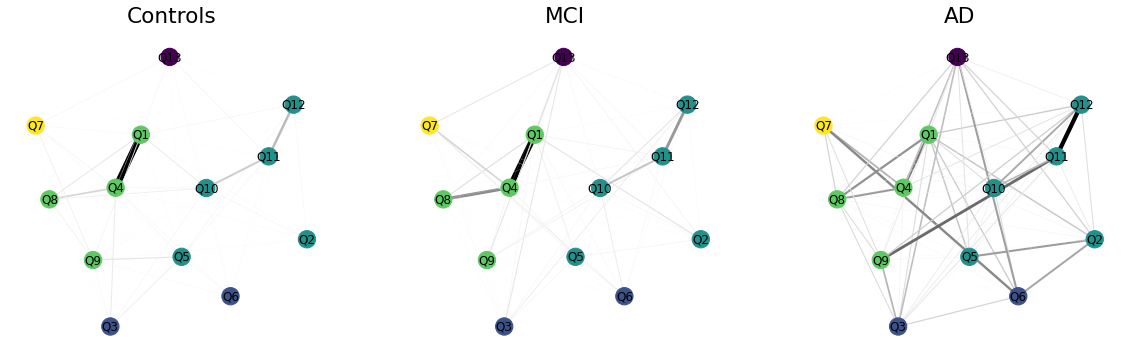

In [269]:
#Node labels
test_labels = {0:"Q1", 1:"Q2", 2:"Q3", 3:"Q4", 4:"Q5", 5: "Q6", 6:"Q7",
              7:"Q8",8:"Q9", 9:"Q10", 10:"Q11", 11:"Q12", 12:"Q13"}

#convert domains into numeric keys
mapping_ADAS = {'Attention':0, 'Executive':1, 'Language':2, 'Memory':3, 'Orientation':4} 

#fix position
pos_ADAS=nx.spring_layout(ADAS_CN_graph, weight='weight', seed=0)

draw_graph(graphs_ls, test_labels, pos_ADAS, mapping_ADAS, 'ADAS')

#### Edges weights

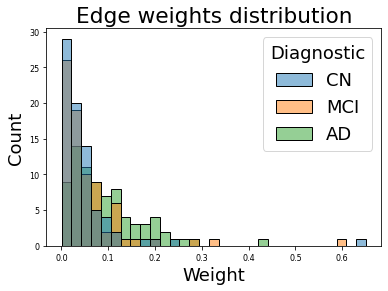

In [270]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(list(nx.get_edge_attributes(ADAS_CN_graph,'weight').values()), columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(list(nx.get_edge_attributes(ADAS_MCI_graph,'weight').values()), columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(list(nx.get_edge_attributes(ADAS_AD_graph,'weight').values()), columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution")
plt.savefig("./Figures/ADAS_weights.png", format="png")
plt.show()

### MMSE

#### 6.1 Compute graph

In [271]:
import networkx as nx

#convert adjacency matrix into graph
MMSE_CN_graph = cognitive_network(MMSE_CN_mx)
MMSE_MCI_graph = cognitive_network(MMSE_MCI_mx)
MMSE_AD_graph = cognitive_network(MMSE_AD_mx)

In [272]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", MMSE_CN_graph.number_of_nodes())
print("- Number of edges: ", MMSE_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", MMSE_MCI_graph.number_of_nodes())
print("- Number of edges: ", MMSE_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", MMSE_AD_graph.number_of_nodes())
print("- Number of edges: ", MMSE_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  30
- Number of edges:  360

MCI-------------------------
- Number of nodes:  30
- Number of edges:  435

AD-------------------------
- Number of nodes:  30
- Number of edges:  435


#### 6.2. Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [273]:
metadata_path = "./Tests/MMSE_Metadata.csv"
graphs_ls = [MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph]
X_ls = [X_MMSE_CN, X_MMSE_MCI, X_MMSE_AD]

node_attributes(metadata_path, graphs_ls, X_ls)

#### 6.3. Draw graph

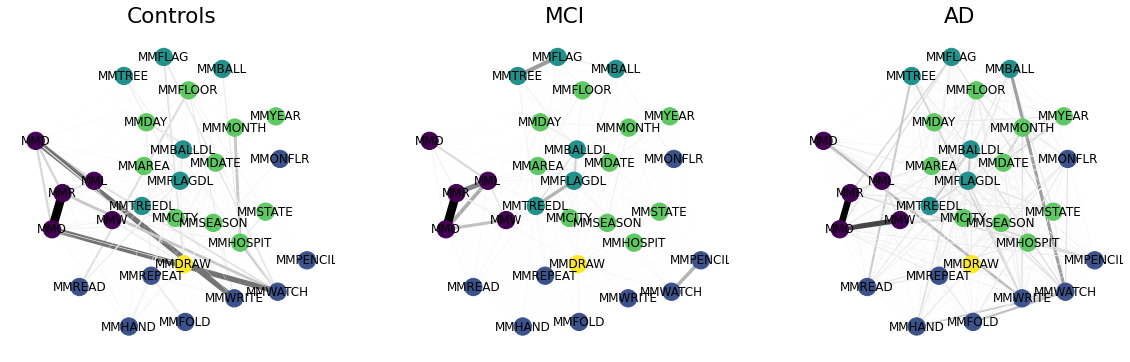

In [274]:
#Node labels
test_labels = {} #create empty dictionary

for i in range(MMSE_CN_mx.shape[1]):
    test_labels[i] = MMSE_CN_mx.columns[i]

#convert domains into numeric keys
mapping_MMSE = {'Concentration':0, 'Language':1, 'Memory':2, 'Orientation':3, 'Visuospatial ':4} 

#fix position
pos_MMSE=nx.spring_layout(MMSE_MCI_graph, weight='weight', seed=0)

draw_graph(graphs_ls, test_labels, pos_MMSE, mapping_MMSE, 'MMSE')

#### Edges weights

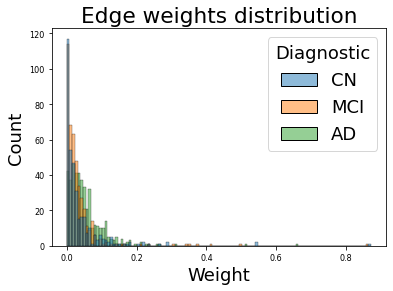

In [275]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(list(nx.get_edge_attributes(MMSE_CN_graph,'weight').values()), columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(list(nx.get_edge_attributes(MMSE_MCI_graph,'weight').values()), columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(list(nx.get_edge_attributes(MMSE_AD_graph,'weight').values()), columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution")
plt.savefig("./Figures/MMSE_weights.png", format="png")
plt.show()

### MOCA

#### 6.1 Compute graph

In [276]:
import networkx as nx

#convert adjacency matrix into graph
MOCA_CN_graph = cognitive_network(MOCA_CN_mx)
MOCA_MCI_graph = cognitive_network(MOCA_MCI_mx)
MOCA_AD_graph = cognitive_network(MOCA_AD_mx)

In [277]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", MOCA_CN_graph.number_of_nodes())
print("- Number of edges: ", MOCA_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", MOCA_MCI_graph.number_of_nodes())
print("- Number of edges: ", MOCA_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", MOCA_AD_graph.number_of_nodes())
print("- Number of edges: ", MOCA_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  42
- Number of edges:  861

MCI-------------------------
- Number of nodes:  42
- Number of edges:  861

AD-------------------------
- Number of nodes:  42
- Number of edges:  861


#### 6.2. Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [278]:
metadata_path = "./Tests/MOCA_Metadata.csv"
graphs_ls = [MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph]
X_ls = [X_MOCA_CN, X_MOCA_MCI, X_MOCA_AD]

node_attributes(metadata_path, graphs_ls, X_ls)

#### 6.3. Draw graph

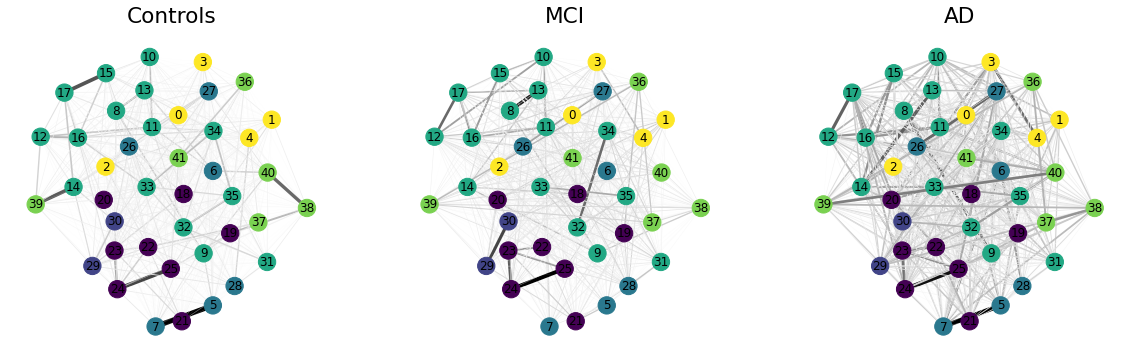

In [279]:
#Node labels
test_labels = None

#convert domains into numeric keys
mapping_MOCA = {'Attention':0, 'Executive function':1, 'Language':2, 'Memory':3, 'Orientation':4, 
          'Visuospatial':5}  

#fix position
pos_MOCA=nx.spring_layout(MOCA_CN_graph, weight='weight', seed=0)

draw_graph(graphs_ls, test_labels, pos_MOCA, mapping_MOCA, 'MOCA')

#### Edges weights

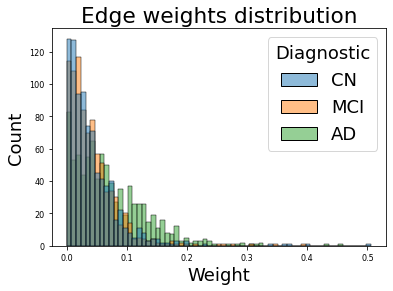

In [280]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(list(nx.get_edge_attributes(MOCA_CN_graph,'weight').values()), columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(list(nx.get_edge_attributes(MOCA_MCI_graph,'weight').values()), columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(list(nx.get_edge_attributes(MOCA_AD_graph,'weight').values()), columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution")
plt.savefig("./Figures/MOCA_weights.png", format="png")
plt.show()

### Merged

#### 6.1 Compute graph

In [281]:
import networkx as nx

#convert adjacency matrix into graph
merged_CN_graph = cognitive_network(merged_CN_mx)
merged_MCI_graph = cognitive_network(merged_MCI_mx)
merged_AD_graph = cognitive_network(merged_AD_mx)

In [282]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", merged_CN_graph.number_of_nodes())
print("- Number of edges: ", merged_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", merged_MCI_graph.number_of_nodes())
print("- Number of edges: ", merged_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", merged_AD_graph.number_of_nodes())
print("- Number of edges: ", merged_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  85
- Number of edges:  3090

MCI-------------------------
- Number of nodes:  85
- Number of edges:  3511

AD-------------------------
- Number of nodes:  85
- Number of edges:  3521


#### 6.2. Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [283]:
metadata_path = "./Tests/merged_Metadata.csv"
graphs_ls = [merged_CN_graph, merged_MCI_graph, merged_AD_graph]
X_ls = [X_merged_CN, X_merged_MCI, X_merged_AD]

node_attributes(metadata_path, graphs_ls, X_ls)

#### 6.3. Draw graph

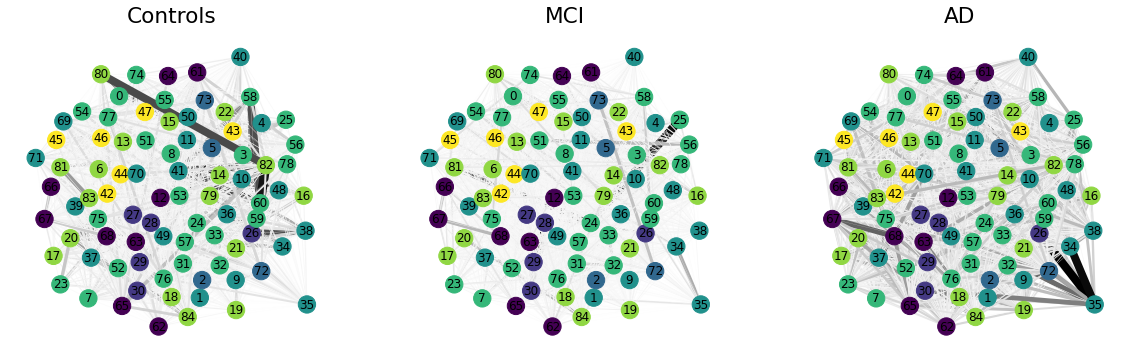

In [284]:
#Node labels
test_labels = None

#convert domains into numeric keys
mapping_merged = {'Attention':0, 'Concentration':1, 'Executive':2, 'Language':3, 'Memory':4,
          'Orientation':5, 'Visuospatial':6} 

#fix position
pos_merged=nx.spring_layout(merged_AD_graph, weight='weight', seed=0)

draw_graph(graphs_ls, test_labels, pos_merged, mapping_merged, 'merged')

#### Edges weights

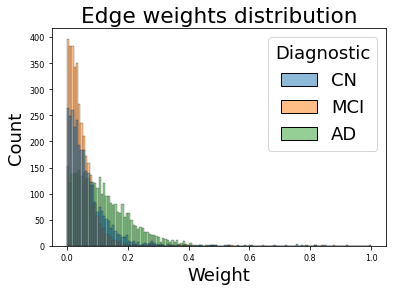

In [285]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(list(nx.get_edge_attributes(merged_CN_graph,'weight').values()), columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(list(nx.get_edge_attributes(merged_MCI_graph,'weight').values()), columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(list(nx.get_edge_attributes(merged_AD_graph,'weight').values()), columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution")
plt.savefig("./Figures/merged_weights.png", format="png")
plt.show()

## 7. NETWORK ANALYSIS

#### 1. CENTRALITY MEASURES

#### Degree Centrality

In network analysis, measures of the importance of nodes are referred to as **centrality** measures. **Degree** is the simplest and the most common way of finding important nodes. A node’s degree is the sum of its edges between all the possible connections. This is the centrality measure used in the epilepsy paper. 

#### Other centrality measures

- **Closeness centrality**: is a way of detecting nodes that are able to spread information very efficiently through a graph. The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. 
- **Eigenvector centrality**: is a kind of extension of degree—it looks at a combination of a node’s edges and the edges of that node’s neighbors. Eigenvector centrality cares if you are a hub, but it also cares how many hubs you are connected to. It’s calculated as a value from 0 to 1: the closer to one, the greater the centrality. Eigenvector centrality is useful for understanding which nodes can get information to many other nodes quickly. 
- **Betweenness centrality**: t doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality looks at all the shortest paths that pass through a particular node (see above). Betweenness centrality, which is also expressed on a scale of 0 to 1, is fairly good at finding nodes that connect two otherwise disparate parts of a network.

In [113]:
def centrality(graph,columns):
    
    """Function to compute a table with the different centrality measures for each node."""
    
    #compute edges distances based on weights
    g_distance_dict = {(e1, e2): 1/weight for e1, e2, weight in graph.edges(data='weight')}
    nx.set_edge_attributes(graph, g_distance_dict, 'distance')
    
    #DC = nx.degree_centrality(graph) #degree centrality
    #CC = nx.closeness_centrality(graph) #closeness centrality     
    DC = [graph.degree(n, weight='weight') for n in graph.nodes()] #degree centrality
    CC = nx.closeness_centrality(graph, distance='distance')
    EC = nx.eigenvector_centrality(graph, weight='weight') #eigenvector centrality
    BC = nx.betweenness_centrality(graph, weight='weight') #betweenness centrality
    
    
    centrality_df = pd.DataFrame() #create empty dataframe
    
    for node in BC:
        centrality_df.at[node, "Degree_Centrality"] = DC[node] / (len(DC) - 1)
        centrality_df.at[node, "Closeness_Centrality"] = CC[node] 
        centrality_df.at[node, "Eigenvector_Centrality"] = EC[node] 
        centrality_df.at[node, "Betweenness_Centrality"] = BC[node] 
    
    centrality_df.index = columns
        
    return centrality_df

In [114]:
### Plot degree centrality

def plot_centrality_top5(graph_CN, graph_MCI, graph_AD, columns, centrality_metric):
    #Compute centrality measures
    df_CN = centrality(graph_CN, columns)
    df_MCI = centrality(graph_MCI, columns)
    df_AD = centrality(graph_AD, columns)
    
    #Order dataframe by centrality
    df_CN = df_CN.sort_values(by=[centrality_metric],ascending = False)
    df_MCI = df_MCI.sort_values(by=[centrality_metric],ascending = False)
    df_AD = df_AD.sort_values(by=[centrality_metric],ascending = False)
    
    #Truncate table to show only top 5 tests by centrality measure
    top_CN = df_CN.iloc[0:5]
    top_MCI = df_MCI.iloc[0:5] 
    top_AD = df_AD.iloc[0:5] 
    
    #Plot 
    fig, ax = plt.subplots(1,3, figsize=(20,6))
    
    sns.barplot(ax=ax[0], x=top_CN.index, y=centrality_metric, data=top_CN, palette=['#1f77b4']) 
    sns.barplot(ax=ax[1], x=top_MCI.index, y=centrality_metric, data=top_MCI, palette=['#ff7f0e']) 
    sns.barplot(ax=ax[2], x=top_AD.index, y=centrality_metric, data=top_AD, palette=['#2ca02c']) 
    
    for i in range(3):
        ax[i].set_xlabel("Test")
    
    plt.show()

In [115]:
def plot_centrality(graph_CN, graph_MCI, graph_AD, columns, centrality_metric):
    #Compute centrality measures
    df_CN = centrality(graph_CN, columns)
    df_MCI = centrality(graph_MCI, columns)
    df_AD = centrality(graph_AD, columns)
    
    #Order dataframe by centrality
    df_CN = df_CN.sort_values(by=[centrality_metric],ascending = False)
    df_MCI = df_MCI.sort_values(by=[centrality_metric],ascending = False)
    df_AD = df_AD.sort_values(by=[centrality_metric],ascending = False)
    
    
    #Plot 
    fig, ax = plt.subplots(1,3, figsize=(24,10))
    
    sns.barplot(ax=ax[0], x=centrality_metric, y=df_CN.index, data=df_CN, palette=['#1f77b4']) 
    sns.barplot(ax=ax[1], x=centrality_metric, y=df_MCI.index, data=df_MCI, palette=['#ff7f0e']) 
    sns.barplot(ax=ax[2], x=centrality_metric, y=df_AD.index, data=df_AD, palette=['#2ca02c']) 
    
    for i in range(3):
        ax[i].set_ylabel("Test")
    
    plt.show()

In [116]:
#print(sns.color_palette().as_hex()[0])
#print(sns.color_palette().as_hex()[1])
#print(sns.color_palette().as_hex()[2])

#### 2. GLOBAL METRICS

#### Average clustering coefficient

In graph theory, a **clustering coefficient** is a measure of the degree to which nodes in a graph tend to cluster together. Two versions of this measure exist: the global and the local. The global version was designed to give an overall indication of the clustering in the network, whereas the local gives an indication of the embeddedness of single nodes. In this work we are computing **global measures**.

The clustering coefficient for the graph is the average,

$$
    C = \frac{1}{n}\sum_{v \in G}c_v
$$

where $n$ is the number of nodes in the graph $G$.

#### Global efficiency

The **efficiency** of a pair of nodes in a graph is the multiplicative inverse of the shortest path distance between the nodes. The average global efficiency of a graph is the average efficiency of all pairs of nodes. Edge weights are ignored when computing the shortest path distances.

Note than in the epilepsy paper they computed *normalized global efficiencies*.

#### Global measures summary

The following global metrics are going to be computed:

- **Number of nodes**: number of entities
- **Number of edges**: pairs of connected entities
- **Diameter**: the diameter of a graph is definded as the largest shortest path distance in the graph. It is the maximum value of $d(u,v)$ overf all $u,v$ pairs, where $d(u,v)$ denotes the shortest path distance from vertex $u$ to vertex $v$.
- **Density**: it is the ratio of actual edges in the network to all possible connections between the entities of the network. Network density gives you a quick sense of how closely knit your network is. It is also know as the *sparsity* of the graph and ranges between 0 and 1. Low values would indicate a network with a few specific conexions, whereas high values are indicative of a low specificity. 
- **Average degree**: The average degree of an undirected graph is used to measure the number of edges compared to the number of nodes. To do this we simply divide the summation of all nodes' degree by the total number of nodes. 
- **Transitivity**: it is the ratio of all triangles over all possible triangles. So transitivity, like density, expresses how interconnected a graph is in terms of a ratio of actual over possible connections. 
- **Average clustering coefficient**: In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. The global clustering coefficient is based on triplets of nodes. The global clustering coefficient is the number of closed triplets (or 3 x triangles) over the total number of triplets (both open and closed). 
- **Glogbal Efficiency**: In network science, the efficiency of a network is a measure of how efficiently it exchanges information and it is also called *communication efficiency*. The global efficiency is the average inverse shortest path length in the network.

In [301]:
def global_metrics(graphs_ls):
    
    """Function to compute a table with some global metrics of the graphs. 
    It returns a pandas DataFrame object."""
    
    columns = ['NNodes', 'NEdges', 'Diameter', 'Density', 'AvDegree', 'Transitivity','AvCC', 'AvGE']
    index = ['CN', 'MCI', 'AD']
    
    df = pd.DataFrame(columns = columns,
                     index = index) #empty dataframe
    
    #GLOBAL METRICS
    
    for i in range(len(index)): 
        graph = graphs_ls[i]
        dx = index[i]
        
        df.loc[dx,'NNodes'] = graph.number_of_nodes() #number of nodes
        df.loc[dx,'NEdges'] = graph.number_of_edges() #number of edges
        shortest = nx.shortest_path_length(graph, weight="weight") #matrix of shortest paths
        ecc = nx.eccentricity(graph, sp=dict(shortest))
        df.loc[dx,'Diameter'] = nx.diameter(graph, e=ecc) #diameter of graph
        df.loc[dx,'Density'] = nx.density(graph) #density of graph
        df.loc[dx,'AvDegree'] = sum(dict(graph.degree(weight='weight')).values())/graph.number_of_nodes() #average degree
        df.loc[dx,'Transitivity'] = nx.transitivity(graph) #transitivity of graph
        df.loc[dx,'AvCC'] = nx.average_clustering(graph,weight='weight') #average clustering coefficient
        df.loc[dx,'AvGE'] = nx.global_efficiency(graph) #average global efficiency (shortest path)
    
    return df

In [118]:
def plot_global_metrics(gm, battery_name):
    """Function to plot global metrics."""

    fig, ax = plt.subplots(2, 3, figsize=(22,13))

    sns.barplot(ax=ax[0,0], x="index", y="NEdges", data=gm) 
    sns.barplot(ax=ax[0,1], x="index", y="Diameter", data=gm)
    sns.barplot(ax=ax[0,2], x="index", y="Density", data=ADAS_gm) 
    sns.barplot(ax=ax[1,0], x="index", y="AvDegree", data=gm) 
    sns.barplot(ax=ax[1,1], x="index", y="AvCC", data=gm)
    sns.barplot(ax=ax[1,2], x="index", y="AvGE",  data=gm)

    fig.suptitle("Global metrics (" + battery_name +")", fontsize=20)

    rows, cols = 2, 3
    for i in range(rows):
        for j in range(cols):
            ax[i, j].set_xlabel('Diagnostic group')

    plt.show()

### 7.1. ADAS-Cog

#### 7.1.1. CENTRALITY MEASURES

In [119]:
print("Controls----------------------------------")
display(centrality(ADAS_CN_graph, ADAS_columns))
print("MCI----------------------------------")
display(centrality(ADAS_MCI_graph, ADAS_columns))
print("AD----------------------------------")
display(centrality(ADAS_AD_graph, ADAS_columns))

Controls----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE            0.099738              0.065590                0.603263   
Q2SCORE            0.024346              0.032560                0.099419   
Q3SCORE            0.034717              0.046203                0.141428   
Q4SCORE            0.102371              0.065044                0.609129   
Q5SCORE            0.044582              0.047486                0.137516   
Q6SCORE            0.027983              0.034276                0.090055   
Q7SCORE            0.031631              0.040809                0.130322   
Q8SCORE            0.048128              0.055486                0.266474   
Q9SCORE            0.045090              0.049244                0.145444   
Q10SCORE           0.052997              0.057568                0.211993   
Q11SCORE           0.060113              0.054331                0.155295   
Q12SCORE           0.044992              0.050334                0.132214   
Q13SCORE           0.029757              0.041522                0.111561   

          Betweenness_Centrality  
Q1SCORE                 0.000000  
Q2SCORE                 0.469697  
Q3SCORE                 0.136364  
Q4SCORE                 0.242424  
Q5SCORE                 0.000000  
Q6SCORE                 0.015152  
Q7SCORE                 0.484848  
Q8SCORE                 0.015152  
Q9SCORE                 0.000000  
Q10SCORE                0.136364  
Q11SCORE                0.318182  
Q12SCORE                0.166667  
Q13SCORE                0.060606

MCI----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE            0.108556              0.081364                0.544418   
Q2SCORE            0.038968              0.053167                0.153539   
Q3SCORE            0.042001              0.054066                0.137290   
Q4SCORE            0.114064              0.078515                0.572385   
Q5SCORE            0.036936              0.047112                0.148142   
Q6SCORE            0.037498              0.048346                0.125799   
Q7SCORE            0.046431              0.064878                0.182471   
Q8SCORE            0.052556              0.064014                0.319818   
Q9SCORE            0.040838              0.053176                0.146978   
Q10SCORE           0.057693              0.055757                0.151723   
Q11SCORE           0.070390              0.062830                0.215896   
Q12SCORE           0.058969              0.054491                0.168908   
Q13SCORE           0.060081              0.068264                0.201117   

          Betweenness_Centrality  
Q1SCORE                 0.000000  
Q2SCORE                 0.075758  
Q3SCORE                 0.151515  
Q4SCORE                 0.000000  
Q5SCORE                 0.166667  
Q6SCORE                 0.090909  
Q7SCORE                 0.227273  
Q8SCORE                 0.121212  
Q9SCORE                 0.015152  
Q10SCORE                0.060606  
Q11SCORE                0.212121  
Q12SCORE                0.045455  
Q13SCORE                0.045455

AD----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE            0.123949              0.122253                0.342086   
Q2SCORE            0.087474              0.098345                0.249611   
Q3SCORE            0.087589              0.094395                0.259019   
Q4SCORE            0.094256              0.103698                0.278127   
Q5SCORE            0.069360              0.080079                0.203376   
Q6SCORE            0.096507              0.106563                0.261051   
Q7SCORE            0.071593              0.094923                0.200398   
Q8SCORE            0.092111              0.102177                0.266142   
Q9SCORE            0.094788              0.090289                0.281732   
Q10SCORE           0.076146              0.086321                0.235123   
Q11SCORE           0.113134              0.099541                0.338418   
Q12SCORE           0.113014              0.099644                0.337865   
Q13SCORE           0.108199              0.111228                0.303958   

          Betweenness_Centrality  
Q1SCORE                 0.000000  
Q2SCORE                 0.045455  
Q3SCORE                 0.000000  
Q4SCORE                 0.090909  
Q5SCORE                 0.015152  
Q6SCORE                 0.136364  
Q7SCORE                 0.409091  
Q8SCORE                 0.000000  
Q9SCORE                 0.000000  
Q10SCORE                0.121212  
Q11SCORE                0.181818  
Q12SCORE                0.000000  
Q13SCORE                0.000000

#### Plot centrality metrics

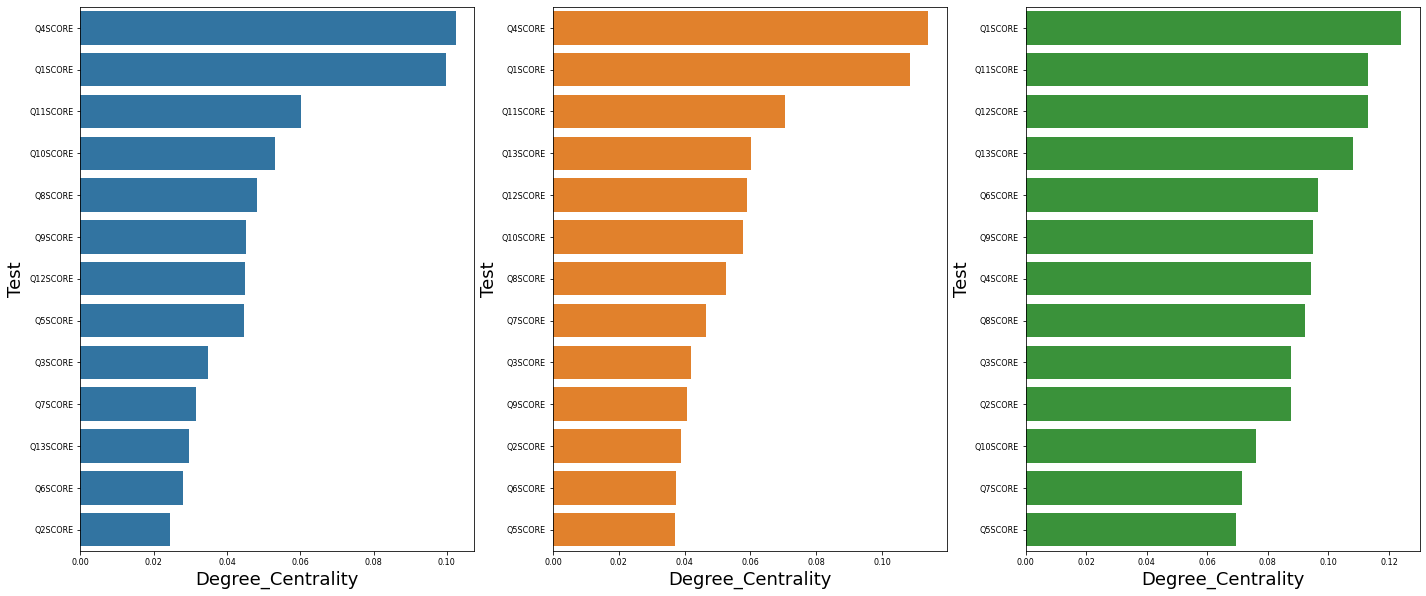

In [120]:
plot_centrality(ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph, ADAS_columns, "Degree_Centrality")

#### Relation between node degree and betweenness centrality

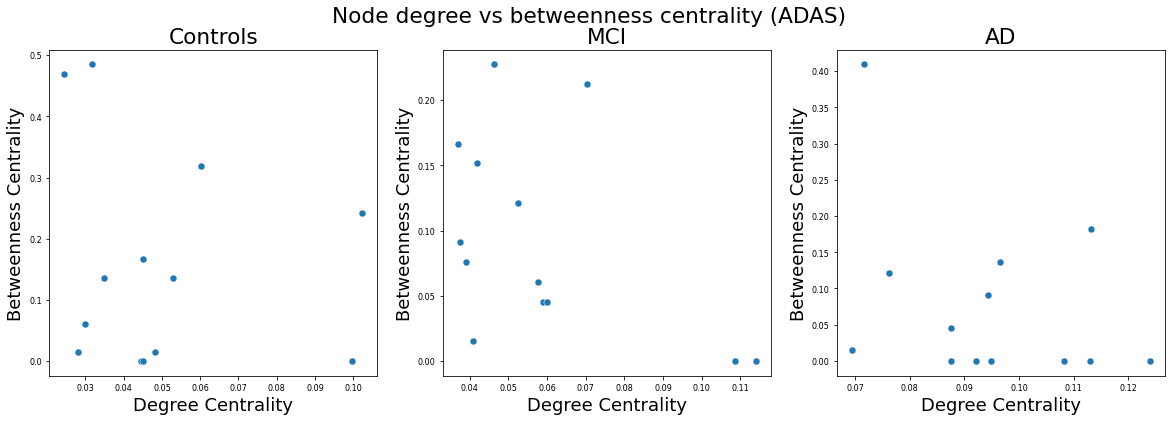

In [121]:
#Get centrality metrics table
ADAS_CN_centrality = centrality(ADAS_CN_graph, ADAS_columns)
ADAS_MCI_centrality = centrality(ADAS_MCI_graph, ADAS_columns)
ADAS_AD_centrality = centrality(ADAS_AD_graph, ADAS_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=ADAS_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=ADAS_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=ADAS_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality (ADAS)')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")


plt.show()

#### 7.1.2. GLOBAL METRICS

In [302]:
ADAS_gm = global_metrics([ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph])
ADAS_gm.reset_index(inplace=True)
ADAS_gm

index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE
0    CN     13     78  0.024934     1.0  0.596719          1.0  0.049668  1.0
1   MCI     13     78  0.032201     1.0  0.706134          1.0  0.067241  1.0
2    AD     13     78  0.072843     1.0  1.133648          1.0  0.177877  1.0

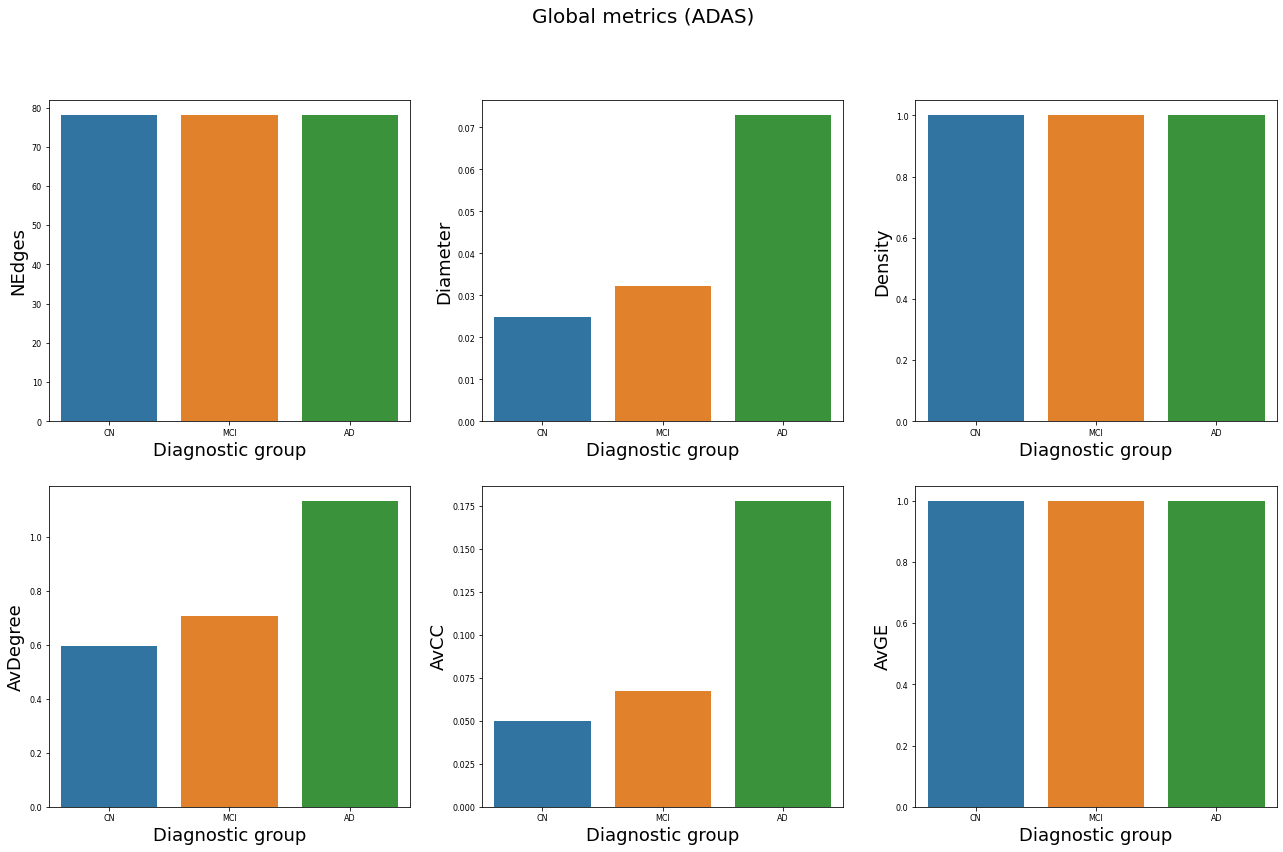

In [303]:
plot_global_metrics(ADAS_gm, 'ADAS')

### 7.2. MMSE

#### 7.2.1. CENTRALITY MEASURES

In [124]:
print("Controls----------------------------------")
display(centrality(MMSE_CN_graph, MMSE_columns))
print("MCI----------------------------------")
display(centrality(MMSE_MCI_graph, MMSE_columns))
print("AD----------------------------------")
display(centrality(MMSE_AD_graph, MMSE_columns))

Controls----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
MMDATE             0.039785              0.044110                0.078418   
MMYEAR             0.002701              0.028574                0.004262   
MMMONTH            0.016836              0.044589                0.046779   
MMDAY              0.021430              0.038645                0.036295   
MMSEASON           0.033675              0.046857                0.118267   
MMHOSPIT           0.050184              0.052443                0.138178   
MMFLOOR            0.039613              0.046060                0.102880   
MMCITY             0.015815              0.026333                0.039276   
MMAREA             0.027557              0.041082                0.071526   
MMSTATE            0.012077              0.039200                0.024208   
MMBALL             0.012077              0.039200                0.024208   
MMFLAG             0.016395              0.044991                0.071699   
MMTREE             0.014000              0.042261                0.047229   
MMD                0.060211              0.053407                0.295366   
MML                0.036060              0.049484                0.207677   
MMR                0.067316              0.054824                0.510184   
MMO                0.077080              0.056523                0.548558   
MMW                0.033898              0.048282                0.126498   
MMBALLDL           0.029285              0.046106                0.057602   
MMFLAGDL           0.038298              0.046128                0.080717   
MMTREEDL           0.027804              0.040452                0.076231   
MMWATCH            0.064259              0.056430                0.392491   
MMPENCIL           0.004908              0.011928                0.010016   
MMREPEAT           0.038754              0.046943                0.076446   
MMHAND             0.029294              0.042439                0.089050   
MMFOLD             0.012496              0.035753                0.024158   
MMONFLR            0.012649              0.028502                0.025824   
MMREAD             0.018762              0.042375                0.039053   
MMWRITE            0.040397              0.052512                0.156525   
MMDRAW             0.037456              0.047217                0.114194   

          Betweenness_Centrality  
MMDATE                  0.068966  
MMYEAR                  0.000000  
MMMONTH                 0.029557  
MMDAY                   0.140394  
MMSEASON                0.000000  
MMHOSPIT                0.046798  
MMFLOOR                 0.051724  
MMCITY                  0.135468  
MMAREA                  0.014778  
MMSTATE                 0.000000  
MMBALL                  0.000000  
MMFLAG                  0.645320  
MMTREE                  0.059113  
MMD                     0.007389  
MML                     0.000000  
MMR                     0.184729  
MMO                     0.068966  
MMW                     0.000000  
MMBALLDL                0.073892  
MMFLAGDL                0.000000  
MMTREEDL                0.000000  
MMWATCH                 0.012315  
MMPENCIL                0.088670  
MMREPEAT                0.000000  
MMHAND                  0.009852  
MMFOLD                  0.155172  
MMONFLR                 0.133005  
MMREAD                  0.004926  
MMWRITE                 0.374384  
MMDRAW                  0.000000

MCI----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
MMDATE             0.041163              0.047351                0.094609   
MMYEAR             0.020581              0.036043                0.046887   
MMMONTH            0.028517              0.036720                0.062198   
MMDAY              0.032178              0.042413                0.087084   
MMSEASON           0.029142              0.037345                0.073364   
MMHOSPIT           0.028048              0.037012                0.054957   
MMFLOOR            0.028895              0.038138                0.059558   
MMCITY             0.027358              0.037528                0.063607   
MMAREA             0.029427              0.034600                0.058519   
MMSTATE            0.022937              0.033834                0.049593   
MMBALL             0.025574              0.033121                0.051825   
MMFLAG             0.037180              0.037122                0.055747   
MMTREE             0.034140              0.039043                0.051845   
MMD                0.024315              0.036636                0.167710   
MML                0.066119              0.043891                0.435853   
MMR                0.066603              0.043032                0.548917   
MMO                0.067360              0.042968                0.545071   
MMW                0.046182              0.041764                0.255374   
MMBALLDL           0.049721              0.050984                0.099116   
MMFLAGDL           0.054092              0.052792                0.127499   
MMTREEDL           0.044096              0.050306                0.089771   
MMWATCH            0.029086              0.033463                0.044860   
MMPENCIL           0.027147              0.033275                0.039874   
MMREPEAT           0.023329              0.033748                0.040763   
MMHAND             0.019856              0.026286                0.053952   
MMFOLD             0.019829              0.032763                0.047605   
MMONFLR            0.020220              0.029200                0.040057   
MMREAD             0.022563              0.033860                0.099612   
MMWRITE            0.017489              0.027954                0.033923   
MMDRAW             0.032333              0.041281                0.089761   

          Betweenness_Centrality  
MMDATE                  0.024631  
MMYEAR                  0.009852  
MMMONTH                 0.000000  
MMDAY                   0.000000  
MMSEASON                0.044335  
MMHOSPIT                0.000000  
MMFLOOR                 0.150246  
MMCITY                  0.000000  
MMAREA                  0.000000  
MMSTATE                 0.000000  
MMBALL                  0.246305  
MMFLAG                  0.027094  
MMTREE                  0.295567  
MMD                     0.280788  
MML                     0.000000  
MMR                     0.078818  
MMO                     0.184729  
MMW                     0.000000  
MMBALLDL                0.000000  
MMFLAGDL                0.000000  
MMTREEDL                0.000000  
MMWATCH                 0.256158  
MMPENCIL                0.219212  
MMREPEAT                0.211823  
MMHAND                  0.039409  
MMFOLD                  0.091133  
MMONFLR                 0.000000  
MMREAD                  0.041872  
MMWRITE                 0.086207  
MMDRAW                  0.083744

AD----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
MMDATE             0.048223              0.061670                0.140692   
MMYEAR             0.045889              0.056706                0.134618   
MMMONTH            0.051610              0.063326                0.150683   
MMDAY              0.047037              0.053602                0.137079   
MMSEASON           0.055302              0.066501                0.168419   
MMHOSPIT           0.046426              0.061169                0.144502   
MMFLOOR            0.048291              0.064209                0.150616   
MMCITY             0.048893              0.063810                0.166966   
MMAREA             0.053198              0.067303                0.167826   
MMSTATE            0.049651              0.062141                0.165594   
MMBALL             0.055843              0.071274                0.179072   
MMFLAG             0.049308              0.061584                0.170343   
MMTREE             0.047757              0.063922                0.144956   
MMD                0.042727              0.069061                0.134836   
MML                0.046393              0.062954                0.151999   
MMR                0.075695              0.073723                0.287709   
MMO                0.090491              0.074255                0.332809   
MMW                0.062883              0.069489                0.232846   
MMBALLDL           0.071775              0.084604                0.229494   
MMFLAGDL           0.059036              0.074030                0.181752   
MMTREEDL           0.053569              0.072813                0.166677   
MMWATCH            0.075214              0.080792                0.233171   
MMPENCIL           0.048882              0.061035                0.165632   
MMREPEAT           0.051070              0.062447                0.160503   
MMHAND             0.054383              0.062516                0.169676   
MMFOLD             0.048255              0.066147                0.157336   
MMONFLR            0.055697              0.062830                0.173467   
MMREAD             0.054378              0.064600                0.164977   
MMWRITE            0.069314              0.082131                0.206966   
MMDRAW             0.044082              0.059965                0.139007   

          Betweenness_Centrality  
MMDATE                  0.160099  
MMYEAR                  0.155172  
MMMONTH                 0.096059  
MMDAY                   0.056650  
MMSEASON                0.115764  
MMHOSPIT                0.125616  
MMFLOOR                 0.093596  
MMCITY                  0.066502  
MMAREA                  0.000000  
MMSTATE                 0.039409  
MMBALL                  0.226601  
MMFLAG                  0.059113  
MMTREE                  0.014778  
MMD                     0.290640  
MML                     0.083744  
MMR                     0.108374  
MMO                     0.041872  
MMW                     0.000000  
MMBALLDL                0.219212  
MMFLAGDL                0.056650  
MMTREEDL                0.051724  
MMWATCH                 0.019704  
MMPENCIL                0.000000  
MMREPEAT                0.007389  
MMHAND                  0.133005  
MMFOLD                  0.049261  
MMONFLR                 0.032020  
MMREAD                  0.000000  
MMWRITE                 0.162562  
MMDRAW                  0.140394

#### Plot centrality metrics

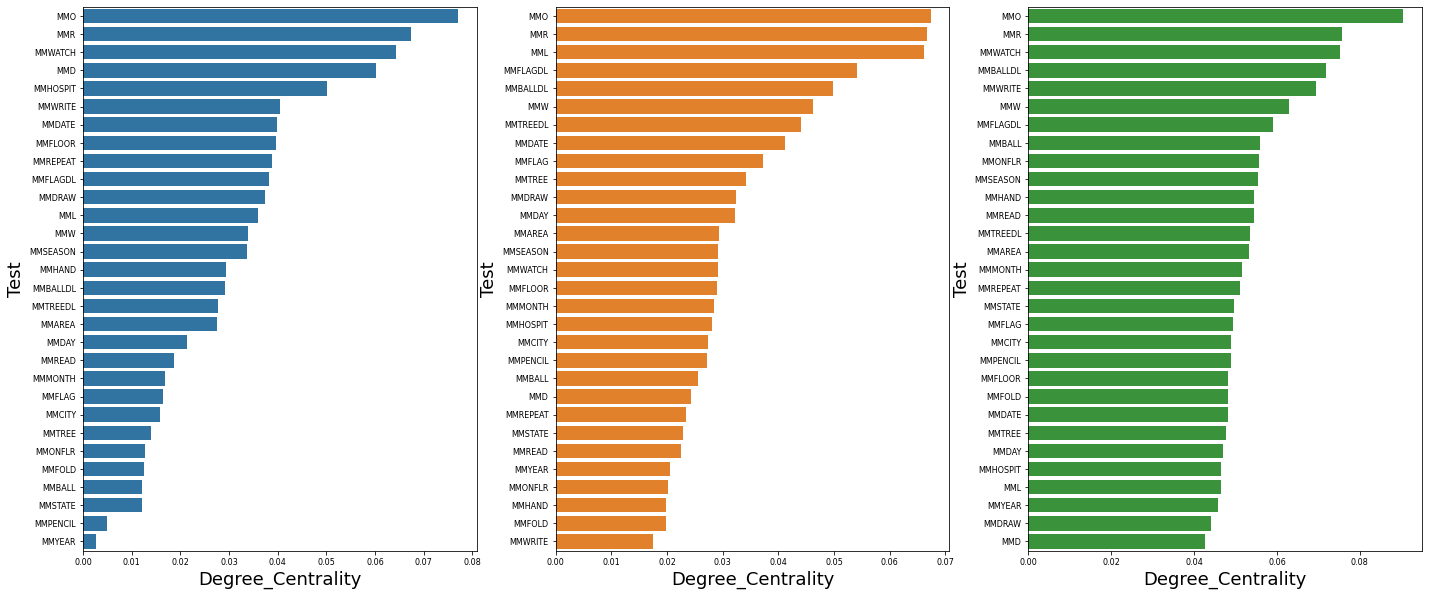

In [125]:
plot_centrality(MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph, MMSE_columns, "Degree_Centrality")

#### Relation between node degree and betweenness centrality

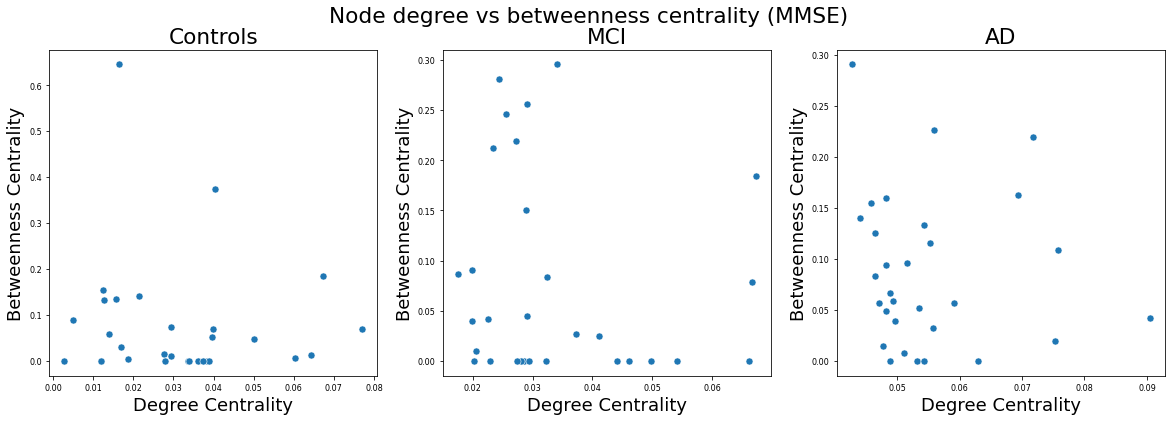

In [126]:
#Get centrality metrics table
MMSE_CN_centrality = centrality(MMSE_CN_graph, MMSE_columns)
MMSE_MCI_centrality = centrality(MMSE_MCI_graph, MMSE_columns)
MMSE_AD_centrality = centrality(MMSE_AD_graph, MMSE_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=MMSE_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=MMSE_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=MMSE_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality (MMSE)')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")


plt.show()

#### 7.1.2. GLOBAL METRICS

In [304]:
MMSE_gm = global_metrics([MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph])
MMSE_gm.reset_index(inplace=True)
MMSE_gm

index NNodes NEdges  Diameter   Density  AvDegree Transitivity      AvCC  \
0    CN     30    360  0.088999  0.827586  0.900034     0.945685  0.022761   
1   MCI     30    435  0.010338       1.0  0.981629          1.0  0.024891   
2    AD     30    435  0.021006       1.0  1.596229          1.0  0.061916   

       AvGE  
0  0.913793  
1       1.0  
2       1.0

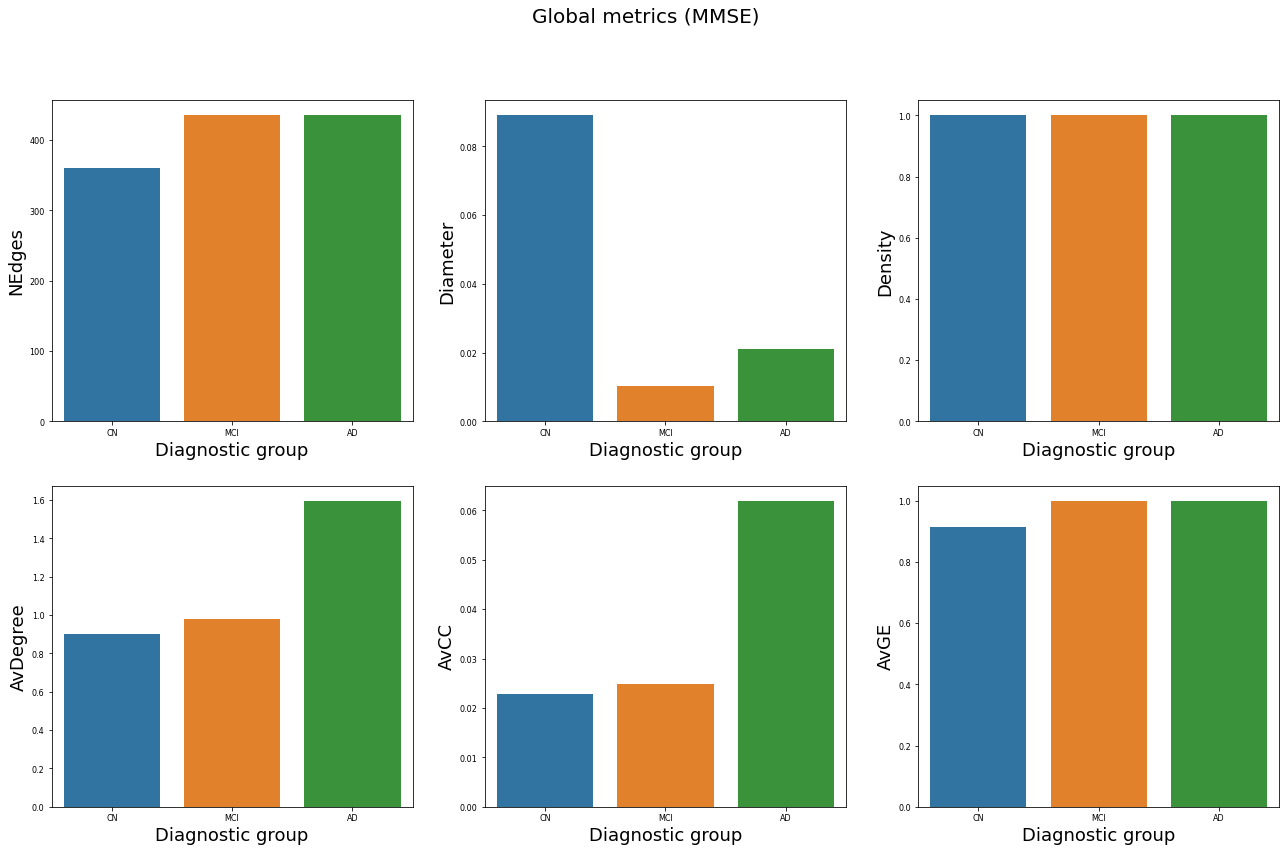

In [305]:
plot_global_metrics(MMSE_gm, 'MMSE')

### 7.3. MoCA

#### 7.1.1. CENTRALITY MEASURES

In [129]:
print("Controls----------------------------------")
display(centrality(MOCA_CN_graph, MOCA_columns))
print("MCI----------------------------------")
display(centrality(MOCA_MCI_graph, MOCA_columns))
print("AD----------------------------------")
display(centrality(MOCA_AD_graph, MOCA_columns))

Controls----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
TRAILS             0.041052              0.050920                0.145967   
CUBE               0.032365              0.051696                0.116909   
CLOCKCON           0.039961              0.055883                0.151709   
CLOCKNO            0.031027              0.044332                0.109363   
CLOCKHAN           0.035928              0.049698                0.124353   
LION               0.041627              0.051719                0.141280   
RHINO              0.043309              0.058153                0.157142   
CAMEL              0.037789              0.051995                0.130791   
IMMT1W1            0.043654              0.058699                0.161200   
IMMT1W2            0.041322              0.056004                0.147800   
IMMT1W3            0.038035              0.054268                0.143959   
IMMT1W4            0.057053              0.068502                0.203262   
IMMT1W5            0.038873              0.059060                0.149438   
IMMT2W1            0.045631              0.059142                0.166602   
IMMT2W2            0.051016              0.058077                0.183934   
IMMT2W3            0.044053              0.055638                0.163315   
IMMT2W4            0.048600              0.060763                0.183755   
IMMT2W5            0.043291              0.055628                0.165532   
DIGFOR             0.033426              0.049468                0.121539   
DIGBACK            0.042118              0.054410                0.148287   
LETTERS            0.034984              0.046896                0.126885   
SERIAL1            0.026720              0.044843                0.097135   
SERIAL2            0.051383              0.058445                0.180149   
SERIAL3            0.047814              0.058128                0.178911   
SERIAL4            0.050875              0.062383                0.197309   
SERIAL5            0.047750              0.060030                0.180494   
REPEAT1            0.049816              0.061750                0.181833   
REPEAT2            0.042104              0.057299                0.153259   
FFLUENCY           0.032872              0.050965                0.116709   
ABSTRAN            0.042228              0.056999                0.152759   
ABSMEAS            0.050340              0.062344                0.182188   
DELW1              0.032199              0.046396                0.114624   
DELW2              0.041713              0.054304                0.150988   
DELW3              0.048336              0.057167                0.176706   
DELW4              0.049739              0.060244                0.179158   
DELW5              0.041121              0.053674                0.146992   
DATE               0.035350              0.047596                0.127292   
MONTH              0.033823              0.049176                0.122602   
YEAR               0.035771              0.051800                0.125925   
DAY                0.039938              0.054375                0.151716   
PLACE              0.047044              0.054741                0.161650   
CITY               0.047414              0.054606                0.170660   

          Betweenness_Centrality  
TRAILS                  0.000000  
CUBE                    0.029268  
CLOCKCON                0.101220  
CLOCKNO                 0.028049  
CLOCKHAN                0.121951  
LION                    0.124390  
RHINO                   0.000000  
CAMEL                   0.158537  
IMMT1W1                 0.117073  
IMMT1W2                 0.013415  
IMMT1W3                 0.013415  
IMMT1W4                 0.000000  
IMMT1W5                 0.245122  
IMMT2W1                 0.043902  
IMMT2W2                 0.132927  
IMMT2W3                 0.000000  
IMMT2W4                 0.075610  
IMMT2W5                 0.070732  
DIGFOR                  0.000000 

MCI----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
TRAILS             0.035306              0.047327                0.126667   
CUBE               0.039215              0.051635                0.138218   
CLOCKCON           0.030967              0.048450                0.111719   
CLOCKNO            0.037113              0.050135                0.130723   
CLOCKHAN           0.034831              0.050986                0.125562   
LION               0.032735              0.048145                0.117341   
RHINO              0.039414              0.050866                0.143180   
CAMEL              0.035920              0.046774                0.130979   
IMMT1W1            0.044678              0.054794                0.163968   
IMMT1W2            0.039600              0.052559                0.145965   
IMMT1W3            0.048364              0.061129                0.180212   
IMMT1W4            0.045030              0.059446                0.171687   
IMMT1W5            0.053482              0.060759                0.197845   
IMMT2W1            0.043863              0.055483                0.163402   
IMMT2W2            0.048899              0.057806                0.179065   
IMMT2W3            0.046210              0.059529                0.172530   
IMMT2W4            0.047562              0.061046                0.176898   
IMMT2W5            0.049016              0.061077                0.184523   
DIGFOR             0.044866              0.058681                0.164503   
DIGBACK            0.042543              0.056145                0.155855   
LETTERS            0.040955              0.053908                0.146909   
SERIAL1            0.039567              0.050019                0.142240   
SERIAL2            0.036984              0.046905                0.135298   
SERIAL3            0.045932              0.052732                0.170206   
SERIAL4            0.049305              0.054884                0.186633   
SERIAL5            0.046670              0.053971                0.174668   
REPEAT1            0.040486              0.055047                0.148678   
REPEAT2            0.041147              0.053433                0.149856   
FFLUENCY           0.046738              0.058698                0.165405   
ABSTRAN            0.044320              0.053592                0.160603   
ABSMEAS            0.044067              0.053260                0.160226   
DELW1              0.042356              0.051706                0.153662   
DELW2              0.042825              0.051900                0.152098   
DELW3              0.037930              0.050235                0.136835   
DELW4              0.038034              0.053074                0.137595   
DELW5              0.039111              0.048207                0.138060   
DATE               0.040605              0.051834                0.149450   
MONTH              0.043687              0.053916                0.153165   
YEAR               0.036319              0.048534                0.131850   
DAY                0.042747              0.050941                0.154883   
PLACE              0.037114              0.049654                0.134980   
CITY               0.045213              0.055183                0.164049   

          Betweenness_Centrality  
TRAILS                  0.000000  
CUBE                    0.040244  
CLOCKCON                0.278049  
CLOCKNO                 0.054878  
CLOCKHAN                0.034146  
LION                    0.039024  
RHINO                   0.070732  
CAMEL                   0.019512  
IMMT1W1                 0.000000  
IMMT1W2                 0.098780  
IMMT1W3                 0.080488  
IMMT1W4                 0.092683  
IMMT1W5                 0.048780  
IMMT2W1                 0.020732  
IMMT2W2                 0.064634  
IMMT2W3                 0.162195  
IMMT2W4                 0.056098  
IMMT2W5                 0.053659  
DIGFOR                  0.028049 

AD----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
TRAILS             0.062535              0.083365                0.133289   
CUBE               0.057905              0.081604                0.121446   
CLOCKCON           0.058501              0.077700                0.121668   
CLOCKNO            0.077065              0.096378                0.163112   
CLOCKHAN           0.072405              0.092682                0.151306   
LION               0.078944              0.092103                0.165847   
RHINO              0.084381              0.093994                0.172160   
CAMEL              0.073785              0.094876                0.160816   
IMMT1W1            0.066696              0.091546                0.135280   
IMMT1W2            0.067880              0.088597                0.141163   
IMMT1W3            0.083073              0.100795                0.169872   
IMMT1W4            0.071586              0.095455                0.154697   
IMMT1W5            0.073786              0.097057                0.161177   
IMMT2W1            0.059292              0.087478                0.128553   
IMMT2W2            0.083293              0.096406                0.173020   
IMMT2W3            0.061732              0.092615                0.133762   
IMMT2W4            0.079984              0.100251                0.167437   
IMMT2W5            0.093398              0.106667                0.198146   
DIGFOR             0.070303              0.092029                0.150162   
DIGBACK            0.071558              0.085421                0.151480   
LETTERS            0.070447              0.097508                0.153574   
SERIAL1            0.066976              0.083290                0.141114   
SERIAL2            0.070422              0.090968                0.147612   
SERIAL3            0.083677              0.101774                0.176890   
SERIAL4            0.087545              0.103090                0.192518   
SERIAL5            0.086869              0.101537                0.188815   
REPEAT1            0.082455              0.101449                0.176723   
REPEAT2            0.087986              0.105775                0.188429   
FFLUENCY           0.055531              0.079689                0.116485   
ABSTRAN            0.078405              0.096050                0.167963   
ABSMEAS            0.071506              0.093129                0.151167   
DELW1              0.061323              0.082949                0.128023   
DELW2              0.071228              0.095673                0.146939   
DELW3              0.078802              0.093868                0.163624   
DELW4              0.063199              0.081628                0.128488   
DELW5              0.056569              0.087679                0.120834   
DATE               0.061512              0.083433                0.129536   
MONTH              0.065100              0.085107                0.136332   
YEAR               0.074782              0.086115                0.159505   
DAY                0.074106              0.092368                0.155764   
PLACE              0.076793              0.095658                0.160443   
CITY               0.063486              0.081561                0.136755   

          Betweenness_Centrality  
TRAILS                  0.000000  
CUBE                    0.074390  
CLOCKCON                0.000000  
CLOCKNO                 0.182927  
CLOCKHAN                0.285366  
LION                    0.050000  
RHINO                   0.000000  
CAMEL                   0.014634  
IMMT1W1                 0.228049  
IMMT1W2                 0.043902  
IMMT1W3                 0.130488  
IMMT1W4                 0.090244  
IMMT1W5                 0.128049  
IMMT2W1                 0.000000  
IMMT2W2                 0.000000  
IMMT2W3                 0.089024  
IMMT2W4                 0.017073  
IMMT2W5                 0.000000  
DIGFOR                  0.046341 

#### Plot centrality metrics

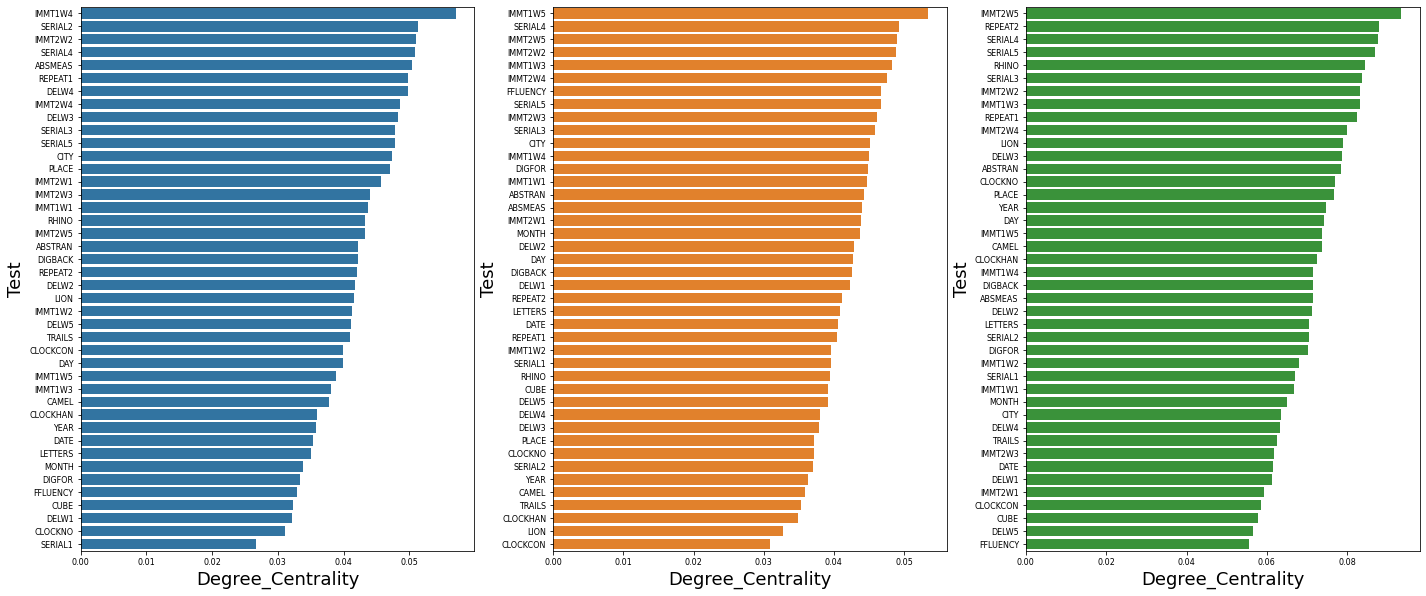

In [130]:
plot_centrality(MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph, MOCA_columns, "Degree_Centrality")

#### Relation between node degree and betweenness centrality

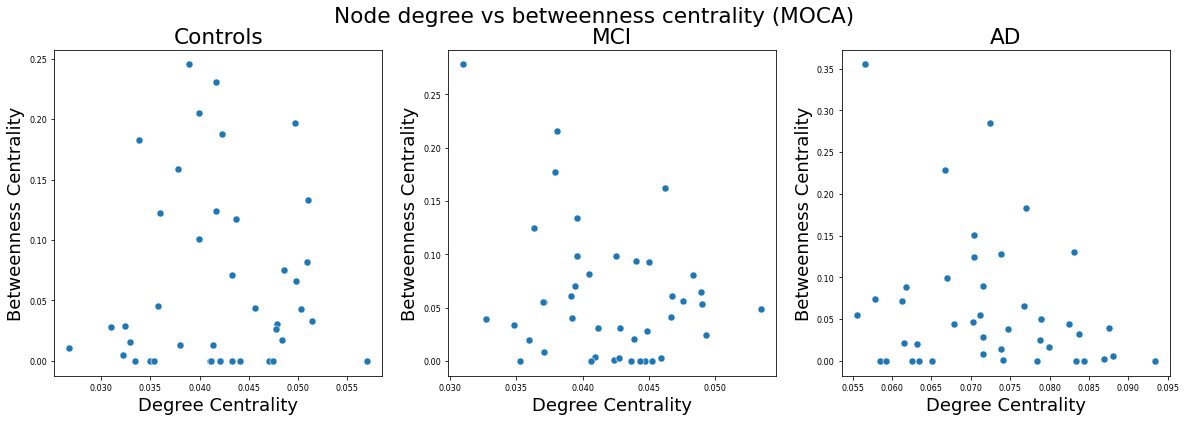

In [131]:
#Get centrality metrics table
MOCA_CN_centrality = centrality(MOCA_CN_graph, MOCA_columns)
MOCA_MCI_centrality = centrality(MOCA_MCI_graph, MOCA_columns)
MOCA_AD_centrality = centrality(MOCA_AD_graph, MOCA_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=MOCA_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=MOCA_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=MOCA_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality (MOCA)')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")


plt.show()

#### 7.1.2. GLOBAL METRICS

In [306]:
MOCA_gm = global_metrics([MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph])
MOCA_gm.reset_index(inplace=True)
MOCA_gm

index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE
0    CN     42    861  0.016876     1.0  1.717575          1.0  0.060632  1.0
1   MCI     42    861  0.014218     1.0  1.719779          1.0  0.080212  1.0
2    AD     42    861  0.016862     1.0  2.964517          1.0  0.121645  1.0

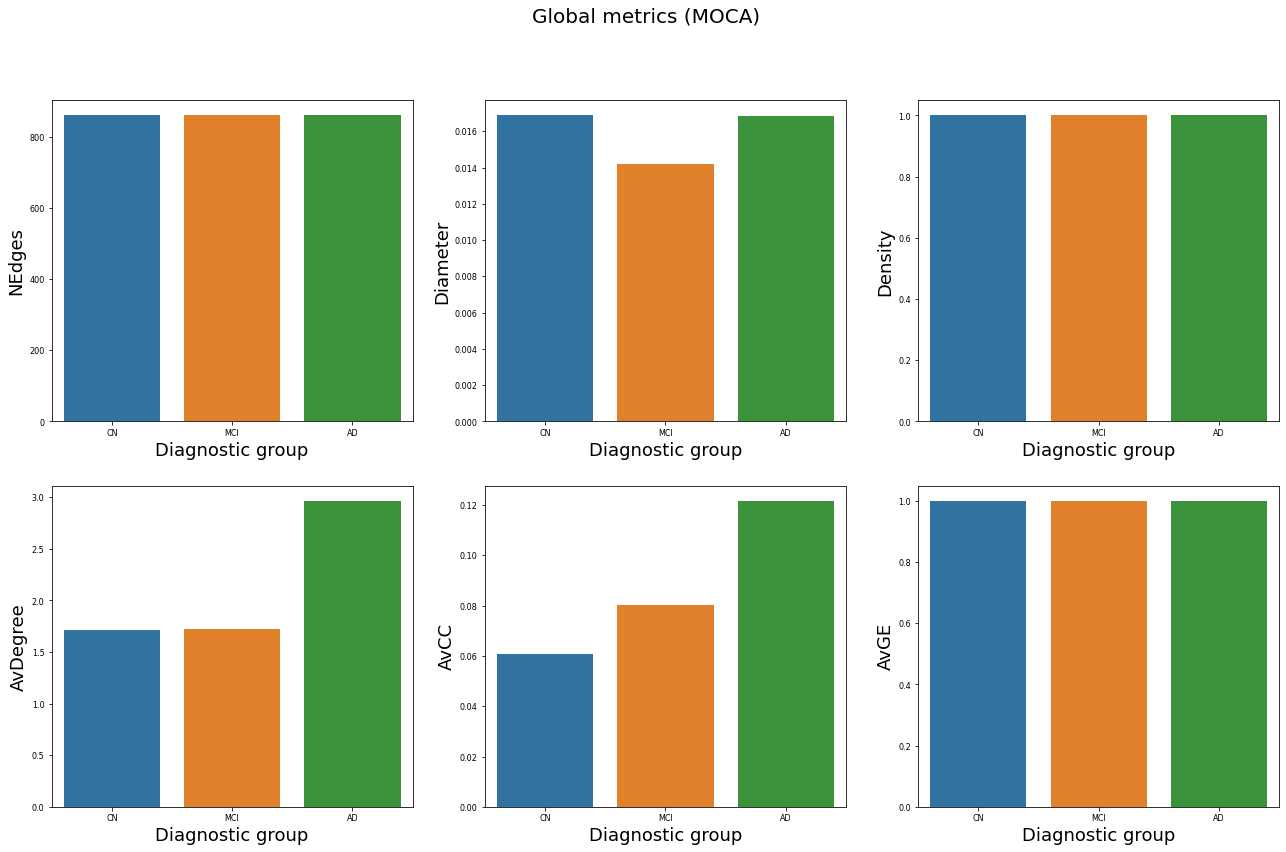

In [307]:
plot_global_metrics(MOCA_gm, 'MOCA')

### 7.4. Merged

#### 7.1.1. CENTRALITY MEASURES

In [134]:
print("Controls----------------------------------")
display(centrality(merged_CN_graph, merged_columns))
print("MCI----------------------------------")
display(centrality(merged_MCI_graph, merged_columns))
print("AD----------------------------------")
display(centrality(merged_AD_graph, merged_columns))

Controls----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE           0.059076              0.086306                0.088135   
Q2SCORE           0.074353              0.096065                0.103929   
Q3SCORE           0.069067              0.094129                0.103561   
Q4SCORE           0.067019              0.092313                0.105999   
Q5SCORE           0.078066              0.102300                0.121949   
...                    ...                   ...                     ...   
MONTH             0.049960              0.130684                0.103242   
YEAR              0.055410              0.106421                0.086856   
DAY               0.136186              0.154014                0.268563   
PLACE             0.049526              0.095295                0.074530   
CITY              0.070252              0.120317                0.112865   

         Betweenness_Centrality  
Q1SCORE                0.024383  
Q2SCORE                0.002295  
Q3SCORE                0.004303  
Q4SCORE                0.012909  
Q5SCORE                0.000000  
...                         ...  
MONTH                  0.034710  
YEAR                   0.044750  
DAY                    0.000000  
PLACE                  0.010040  
CITY                   0.049914  

[85 rows x 4 columns]

MCI----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE           0.047560              0.066759                0.111357   
Q2SCORE           0.040972              0.060048                0.098536   
Q3SCORE           0.044475              0.061321                0.101727   
Q4SCORE           0.051142              0.069132                0.119660   
Q5SCORE           0.050539              0.067902                0.116747   
...                    ...                   ...                     ...   
MONTH             0.046611              0.067064                0.109415   
YEAR              0.049910              0.069670                0.125639   
DAY               0.048999              0.072049                0.116961   
PLACE             0.038182              0.063406                0.091678   
CITY              0.049066              0.063381                0.115896   

         Betweenness_Centrality  
Q1SCORE                0.009180  
Q2SCORE                0.000000  
Q3SCORE                0.010327  
Q4SCORE                0.086345  
Q5SCORE                0.003442  
...                         ...  
MONTH                  0.029547  
YEAR                   0.000000  
DAY                    0.050201  
PLACE                  0.005164  
CITY                   0.000287  

[85 rows x 4 columns]

AD----------------------------------


Degree_Centrality  Closeness_Centrality  Eigenvector_Centrality  \
Q1SCORE           0.092210              0.137296                0.084783   
Q2SCORE           0.124720              0.159354                0.115628   
Q3SCORE           0.102175              0.135958                0.095889   
Q4SCORE           0.121851              0.156633                0.111099   
Q5SCORE           0.094635              0.125374                0.084706   
...                    ...                   ...                     ...   
MONTH             0.075156              0.112480                0.069457   
YEAR              0.103966              0.152407                0.099199   
DAY               0.107411              0.145361                0.099141   
PLACE             0.140346              0.173927                0.133714   
CITY              0.093573              0.137420                0.085946   

         Betweenness_Centrality  
Q1SCORE                0.098394  
Q2SCORE                0.009180  
Q3SCORE                0.031555  
Q4SCORE                0.092943  
Q5SCORE                0.042742  
...                         ...  
MONTH                  0.056225  
YEAR                   0.194492  
DAY                    0.010614  
PLACE                  0.044750  
CITY                   0.010040  

[85 rows x 4 columns]

#### Plot centrality metrics

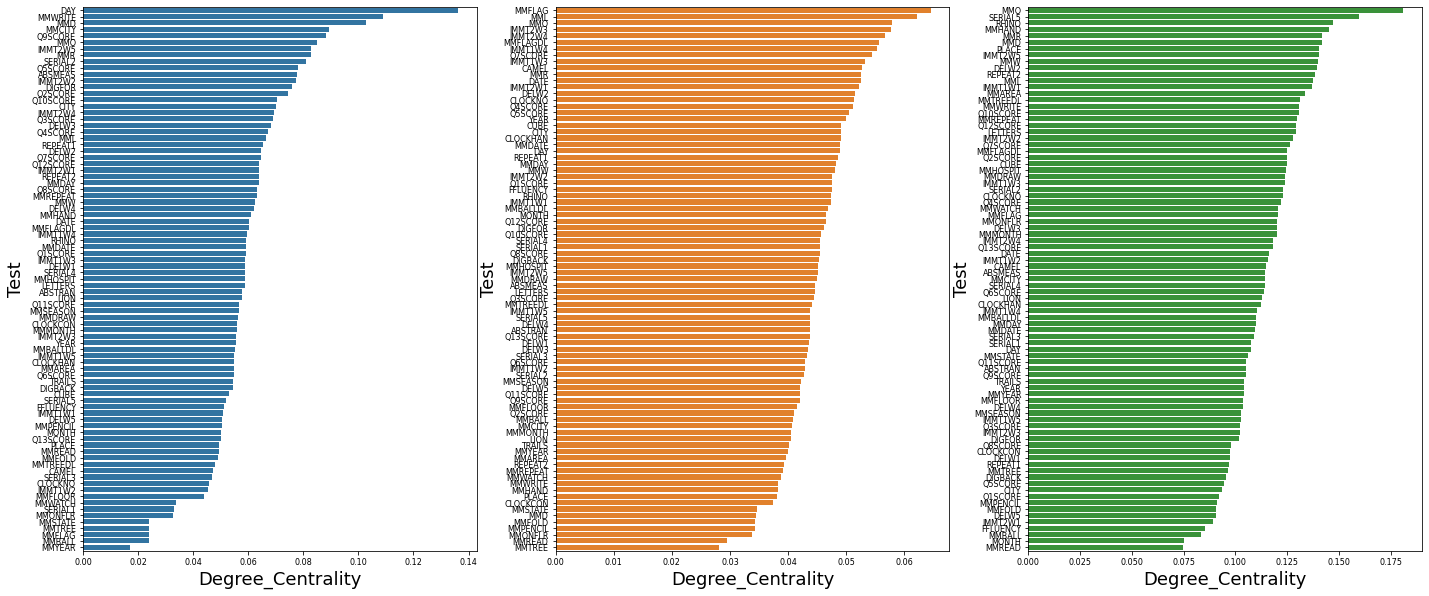

In [135]:
plot_centrality(merged_CN_graph, merged_MCI_graph, merged_AD_graph, merged_columns, "Degree_Centrality")

#### Relation between node degree and betweenness centrality

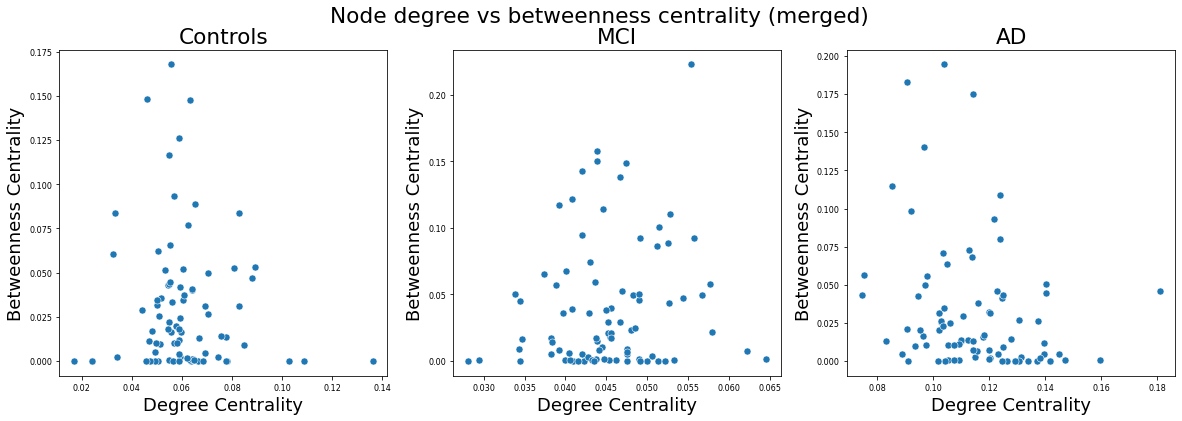

In [136]:
#Get centrality metrics table
merged_CN_centrality = centrality(merged_CN_graph, merged_columns)
merged_MCI_centrality = centrality(merged_MCI_graph, merged_columns)
merged_AD_centrality = centrality(merged_AD_graph, merged_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=merged_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=merged_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=merged_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality (merged)')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")


plt.show()

#### 7.1.2. GLOBAL METRICS

In [308]:
merged_gm = global_metrics([merged_CN_graph, merged_MCI_graph, merged_AD_graph])
merged_gm.reset_index(inplace=True)
merged_gm

index NNodes NEdges  Diameter   Density  AvDegree Transitivity      AvCC  \
0    CN     85   3090  0.025551  0.865546  5.013174      0.94836  0.048785   
1   MCI     85   3511  0.010249  0.983473  3.800743     0.994883  0.039599   
2    AD     85   3521  0.025773  0.986275   9.67631     0.994073  0.113278   

       AvGE  
0  0.932773  
1  0.991737  
2  0.993137

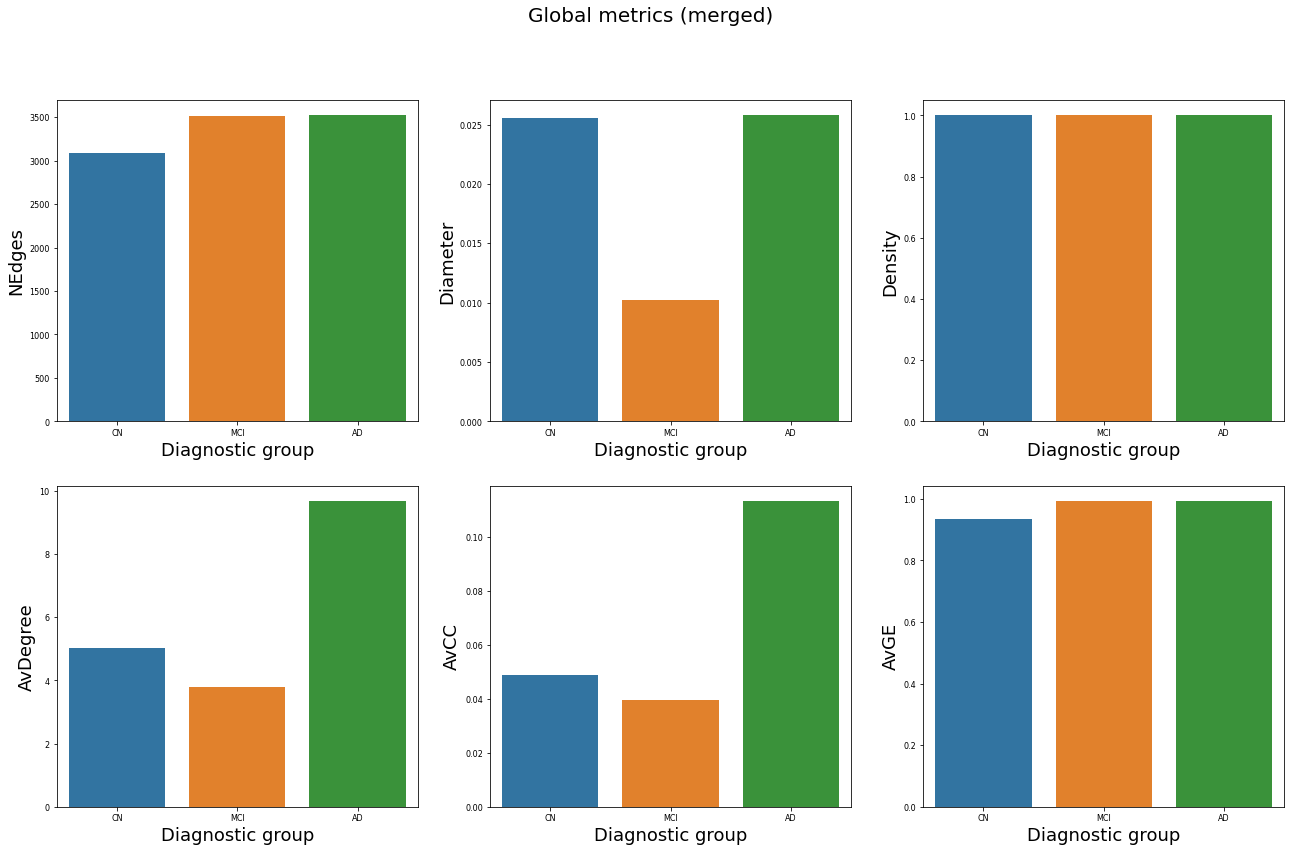

In [309]:
plot_global_metrics(merged_gm, 'merged')

## 8. COMMUNITY DETECTION

In [139]:
import networkx.algorithms.community as nx_comm

#### 1. PARTITIONS

#### 1.1. Louvain algorithm:

**Louvain Community Detection Algorithm** is a simple method to extract the community structure of a network. This is a heuristic method based on modularity optimization. 

The community structure of a network indexes the sub-division of such a network into segregated communities ormodules that contribute to the same processes while alsoallowing for a visual inspection of the network

Note that the order in which the nodes are considered can affect the final output. In the algorithm the ordering happens using a random shuffle. 

- In the epilepsy paper they calculated modularity 1,000 times for each group, and the highest proportion was chosen as the number of modules in that group. 

- Furthermore, in order to be certain regarding the module assignment for each node, they created a script that calculated the proportion of module assignment for each node in order to have each node assigned to the module with the highest probability. 

#### 1.2. Greedy modularity algorithm

This function uses **Clauset-Newman-Moore greedy modularity maximization** to find the community partition with the largest modularity.

Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no further increase in modularity is possible (a maximum).

#### 1.3. Kernighan-Lin bisection algorithm

This function uses **Kernighan-Lin bipartition algorithm** to partition a graph into two blocks.

This algorithm partitions a network into two sets by iteratively swapping pairs of nodes to reduce the edge cut between the two sets. The pairs are chosen according to a modified form of Kernighan-Lin, which moves node individually, alternating between sides to keep the bisection balanced.

#### 1.4. Modularity index (Label propagation)

This function uses the **asynchronous label propagation algorithm** which is probabilistic and the found communities may vary on different executions.

The algorithm proceeds as follows. After initializing each node with a unique label, the algorithm repeatedly sets the label of a node to be the label that appears most frequently among that nodes neighbors. The algorithm halts when each node has the label that appears most frequently among its neighbors. The algorithm is asynchronous because each node is updated without waiting for updates on the remaining nodes.

In [140]:
def community_detection(graphs_ls, algorithm):
    
    print("--------------------------------")
    print(algorithm, "algorithm")
    print("--------------------------------")
      
    partition_ls = []
    dx_ls = ['CN', 'MCI', 'AD']
    
    for i in range(len(graphs_ls)):
        if algorithm == "Louvain": 
            partition = nx_comm.louvain_communities(graphs_ls[i], weight='weight',seed=0)
            
        elif algorithm == "Greedy":
            partition = nx_comm.greedy_modularity_communities(graphs_ls[i], weight='weight')
        
        elif algorithm == "Bisection":
            partition = nx_comm.kernighan_lin_bisection(graphs_ls[i], weight='weight', seed=0)
            
        elif algorithm == "Label Propagation":
            partition = list(nx_comm.asyn_lpa_communities(graphs_ls[i], weight='weight', seed=0))
        
        else:
            print("This algorithm is not implemented. Please, try again.")
            break
            
        partition_ls.append(partition) #partitions
        print(dx_ls[i], ": ", partition)
        
        MI = nx_comm.modularity(graphs_ls[i], partition, weight='weight') #modularity index  
        print("Modularity Index: ", MI, "\n")
    
    return partition_ls

#### 2. DRAW GRAPH BY COMMUNITIES

In [141]:
def color_communities(graph, partition):
    
    colors = {} #create empty node dictionary
    
    #Convert set of partitions into node dictionary
    for i in range(len(partition)): #iterate for each group
        for node in partition[i]:
            colors[node] = i
            
    #Sort dictionary by keys
    node_list = list(colors.keys())
    node_list.sort()
    sorted_colors = {i: colors[i] for i in node_list}
            
    return list(sorted_colors.values())

In [142]:
def draw_graph_communities(graphs_ls, partition_ls, test_labels, pos, battery_name, algorithm):

    #Plot
    fig, axes = plt.subplots(1,3, figsize=(20,6))
    
    for i in range(len(graphs_ls)):
        
        graph = graphs_ls[i]
        partition = partition_ls[i]
        
        #node colors
        colors = color_communities(graph, partition)

        #get edges weights
        weights = list(nx.get_edge_attributes(graph,'weight').values())
        
        if test_labels is not None: 
            nx.draw(ax=axes[i], G=graph, pos=pos, labels=test_labels, with_labels=True, node_color=colors, 
                   edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
        
        else:
            nx.draw(ax=axes[i], G=graph, pos=pos, with_labels=True, node_color=colors, 
                   edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
    

    #add title to subfigures
    fig.suptitle(algorithm + " (" + battery_name +")", fontsize=20)
    axes[0].title.set_text("Controls")
    axes[1].title.set_text("MCI")
    axes[2].title.set_text("AD")
    
    figure_path = "./Results/Figures/Modularity/"+ battery_name + "/"+ algorithm +".svg"

    plt.savefig(figure_path, format="svg")
    plt.show()

#### 3. COMMUNITY SUBGRAPH METRICS

Each community detected by an algorithm is going to be considered as a subgraph. 

In [298]:
def metrics(graph):
    """Function to create a dictionary with all the metrics computed for a community"""
    
    metrics_dict = {}
    
    #GLOBAL METRICS
    #Compute the number of nodes 
    metrics_dict['NNodes'] = graph.number_of_nodes()
    #Compute the number of edges 
    metrics_dict['NEdges'] = graph.number_of_edges()
    #Compute the diameter of the graph
    shortest = nx.shortest_path_length(graph, weight="weight")
    ecc = nx.eccentricity(graph, sp=dict(shortest))
    metrics_dict['Diameter'] = nx.diameter(graph, e=ecc)
    #Compute the density of the graph
    metrics_dict['Density'] = nx.density(graph)
    #Compute the average degree of the network  
    metrics_dict['AvDegree'] = sum(dict(graph.degree(weight='weight')).values())/graph.number_of_nodes()
    #Compute the transitivity of the graph
    metrics_dict['Transitivity'] = nx.transitivity(graph)
    #Compute the average clustering coefficient
    metrics_dict['AvCC'] = nx.average_clustering(graph,weight='weight')
    #Compute the average global efficiency (shortest path)
    metrics_dict['AvGE'] = nx.global_efficiency(graph)
    
    #TESTS BELONGING TO THE COMMUNITY
    metrics_dict['Tests'] = list(dict(graph.nodes(data="Test")).values())
    
    return metrics_dict

In [287]:
def community_metrics(graph, partition):
    
    """Function to create a dataframe with all the metrics computed for each of the communities"""
    
    domains_list = list(dict(graph.nodes(data="Cognitive Domain")).values())
    domains = [*set(domains_list)] #unique list of domains
    
    df = pd.DataFrame(columns = ['Index','NNodes', 'NEdges', 'Diameter', 'Density', 'AvDegree', 
                                 'Transitivity','AvCC', 'AvGE', 'Tests'] + domains) #empty dataframe
    
    for i in range(len(partition)): #iterate for each community
        #create subgraph for this community
        subgraph = graph.subgraph(partition[i]) 
        #compute metrics for the subgraph 
        metrics_dict = metrics(subgraph)
        
        #community index
        metrics_dict['Index'] = i
        
        #representation of each neurocognitive domain
        domains_list_community = list(dict(subgraph.nodes(data="Cognitive Domain")).values())
        
        for domain in domains: 
            #domain_count_total = domains_list.count(domain)
            domain_count_community = domains_list_community.count(domain)
            domain_count_total = len(domains_list_community)
            metrics_dict[domain] = domain_count_community/domain_count_total #percentage of representation 
        
        #introduce metrics in new row
        df = df.append(metrics_dict, ignore_index=True)
        
    return df

#### 4. DOMAINS REPRESENTATION IN EACH COMMUNITY

In [145]:
def domains_rep(graphs_ls, partition_ls, battery_name, algorithm): 
    domains_ls = np.unique(list(nx.get_node_attributes(graphs_ls[0], 'Cognitive Domain').values())).tolist()
    columns = ['Index'] + domains_ls
    dx_ls = ['CN', 'MCI', 'AD']
    for i in range(len(graphs_ls)):
        graph = graphs_ls[i]
        partition = partition_ls[i]
        domains = community_metrics(graph, partition)[columns] #get data
        
        #Reshape data with melt() function
        domains_rs = domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
        
        #send data to build stacked barplot in R
        filepath = "./Results/" + battery_name + "/" + algorithm + "_" + dx_ls[i] + ".csv" 
        domains_rs.to_csv(filepath, index=False) 

### 8.1. ADAS-Cog

In [146]:
graphs_ls = [ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph]

#### 8.1.1. LOUVAIN ALGORITHM

In [147]:
ADAS_Louvain_partitions = community_detection(graphs_ls, "Louvain")

--------------------------------
Louvain algorithm
--------------------------------
CN :  [{0, 3, 7}, {2, 4, 5, 6, 8, 12}, {1, 10, 11, 9}]
Modularity Index:  0.23109224207541662 

MCI :  [{0, 3, 7}, {9, 10, 11, 5}, {1, 2, 4, 6, 8, 12}]
Modularity Index:  0.22148481313980212 

AD :  [{0, 3, 6, 7}, {1, 5, 4, 12}, {2, 8, 9, 10, 11}]
Modularity Index:  0.14293614334231983 



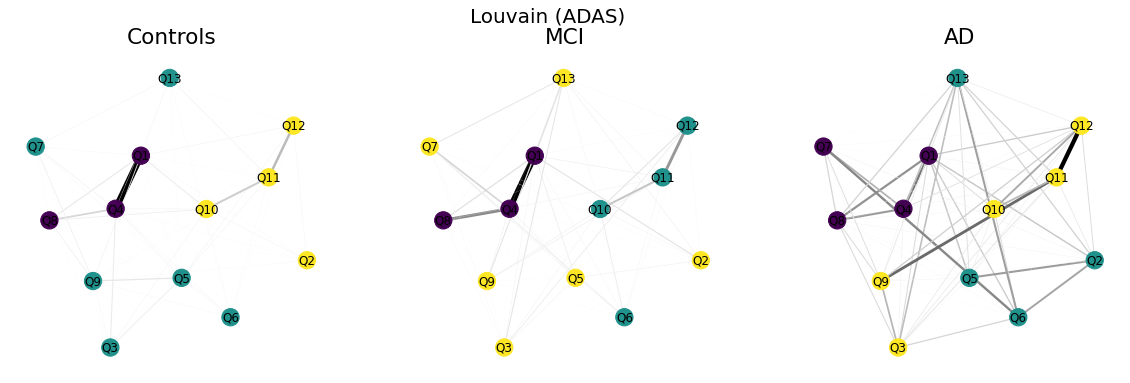

In [148]:
test_labels = {0:"Q1", 1:"Q2", 2:"Q3", 3:"Q4", 4:"Q5", 5: "Q6", 6:"Q7",
              7:"Q8",8:"Q9", 9:"Q10", 10:"Q11", 11:"Q12", 12:"Q13"}

draw_graph_communities(graphs_ls, ADAS_Louvain_partitions, test_labels, pos_ADAS, 'ADAS', 'Louvain')

#### Subgraph metrics

In [300]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(ADAS_Louvain_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], ADAS_Louvain_partitions[i]))

CN ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      3      3  0.240985     1.0  0.564402          1.0   0.31075  1.0   
1     1      6     15  0.077307     1.0  0.286166          1.0  0.229122  1.0   
2     2      4      6  0.124147     1.0  0.343444          1.0  0.214367  1.0   

                                               Tests Concentration Attention  \
0  [Word recall, Delayed word recall, Word recogn...           0.0       0.0   
1  [Constructional praxis, Naming task, Ideationa...           0.0  0.166667   
2  [Commands, Word finding difficulty, Spoken lan...           0.0       0.0   

  Visuospatial    Memory Executive  Language Orientation  
0          0.0       1.0       0.0       0.0         0.0  
1          0.0  0.166667  0.333333  0.166667    0.166667  
2          0.0       0.0       0.0       1.0         0.0

MCI ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      3      3  0.421709     1.0  0.641318          1.0  0.515721  1.0   
1     1      4      6   0.06543     1.0   0.35388          1.0  0.198891  1.0   
2     2      6     15  0.024351     1.0  0.196329          1.0  0.303824  1.0   

                                               Tests Concentration Attention  \
0  [Word recall, Delayed word recall, Word recogn...           0.0       0.0   
1  [Comprehension, Word finding difficulty, Spoke...           0.0       0.0   
2  [Commands, Constructional praxis, Naming task,...           0.0  0.166667   

  Visuospatial    Memory Executive  Language Orientation  
0          0.0       1.0       0.0       0.0         0.0  
1          0.0       0.0      0.25      0.75         0.0  
2          0.0  0.166667  0.166667  0.333333    0.166667

AD ---------------------


Index NNodes NEdges  Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      4      6  0.298717     1.0  0.611811          1.0  0.653462  1.0   
1     1      4      6  0.208292     1.0  0.477136          1.0  0.399331  1.0   
2     2      5     10  0.176687     1.0  0.593155          1.0  0.301035  1.0   

                                               Tests Concentration Attention  \
0  [Word recall, Delayed word recall, Orientation...           0.0       0.0   
1  [Commands, Number cancellation, Naming task, I...           0.0      0.25   
2  [Constructional praxis, Remembering test instr...           0.0       0.0   

  Visuospatial Memory Executive Language Orientation  
0          0.0   0.75       0.0      0.0        0.25  
1          0.0    0.0      0.25      0.5         0.0  
2          0.0    0.2       0.2      0.6         0.0

#### Export results

In [150]:
domains_rep(graphs_ls, ADAS_Louvain_partitions, 'ADAS', 'Louvain')

#### 8.1.2. GREEDY ALGORITHM

In [151]:
ADAS_Greedy_partitions = community_detection(graphs_ls, "Greedy")

--------------------------------
Greedy algorithm
--------------------------------
CN :  [frozenset({2, 4, 5, 6, 8, 12}), frozenset({1, 10, 11, 9}), frozenset({0, 3, 7})]
Modularity Index:  0.23109224207541662 

MCI :  [frozenset({1, 2, 4, 6, 8, 12}), frozenset({9, 10, 11, 5}), frozenset({0, 3, 7})]
Modularity Index:  0.2214848131398021 

AD :  [frozenset({2, 8, 9, 10, 11}), frozenset({1, 4, 5, 6, 12}), frozenset({0, 3, 7})]
Modularity Index:  0.14201022848599693 



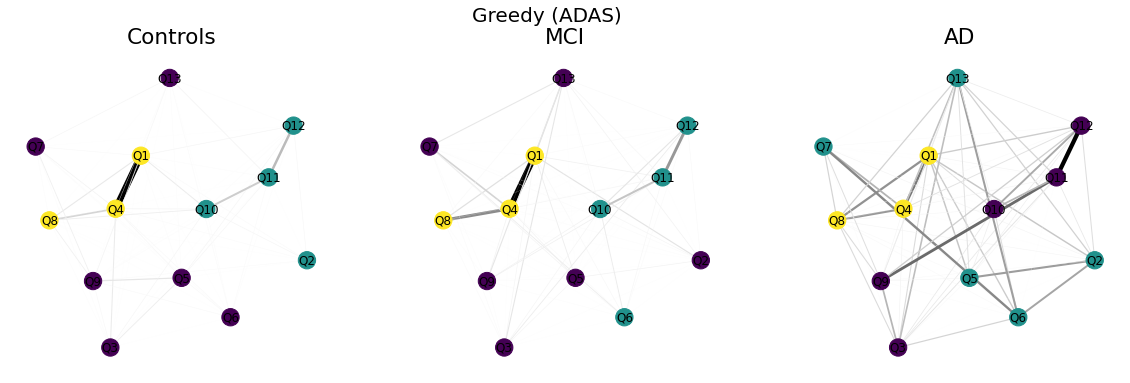

In [152]:
draw_graph_communities(graphs_ls, ADAS_Greedy_partitions, test_labels, pos_ADAS, 'ADAS', 'Greedy')

#### Subgraph metrics

In [153]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(ADAS_Greedy_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], ADAS_Greedy_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.224667          1.0  0.328306  1.0   
1     1      4      6        1     1.0  0.302338          1.0  0.284131  1.0   
2     2      3      3        1     1.0  0.621274          1.0  0.353061  1.0   

                                               Tests Attention    Memory  \
0  [Constructional praxis, Naming task, Ideationa...  0.166667  0.166667   
1  [Commands, Word finding difficulty, Spoken lan...       0.0       0.0   
2  [Word recall, Delayed word recall, Word recogn...       0.0       1.0   

  Executive  Language Orientation  
0  0.333333  0.166667    0.166667  
1       0.0       1.0         0.0  
2       0.0       0.0         0.0

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0   0.24944          1.0  0.381853  1.0   
1     1      4      6        1     1.0  0.389671          1.0  0.373748  1.0   
2     2      3      3        1     1.0  0.686782          1.0   0.48111  1.0   

                                               Tests Attention    Memory  \
0  [Commands, Constructional praxis, Naming task,...  0.166667  0.166667   
1  [Comprehension, Word finding difficulty, Spoke...       0.0       0.0   
2  [Word recall, Delayed word recall, Word recogn...       0.0       1.0   

  Executive  Language Orientation  
0  0.166667  0.333333    0.166667  
1      0.25      0.75         0.0  
2       0.0       0.0         0.0

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      5     10        1     1.0  0.665832          1.0  0.340818  1.0   
1     1      5     10        1     1.0  0.486813          1.0  0.417834  1.0   
2     2      3      3        1     1.0  0.466302          1.0  0.882573  1.0   

                                               Tests Attention Memory  \
0  [Constructional praxis, Remembering test instr...       0.0    0.2   
1  [Commands, Naming task, Ideational praxis, Ori...       0.2    0.0   
2  [Word recall, Delayed word recall, Word recogn...       0.0    1.0   

  Executive Language Orientation  
0       0.2      0.6         0.0  
1       0.2      0.4         0.2  
2       0.0      0.0         0.0

#### Export results

In [154]:
domains_rep(graphs_ls, ADAS_Greedy_partitions, 'ADAS', 'Greedy')

#### 8.1.3. BISECTION ALGORITHM

In [155]:
ADAS_Bisection_partitions = community_detection(graphs_ls, "Bisection")

--------------------------------
Bisection algorithm
--------------------------------
CN :  ({1, 5, 9, 10, 11, 12}, {0, 2, 3, 4, 6, 7, 8})
Modularity Index:  0.16114241722644163 

MCI :  ({2, 5, 8, 9, 10, 11}, {0, 1, 3, 4, 6, 7, 12})
Modularity Index:  0.1686903744315489 

AD :  ({2, 4, 8, 9, 10, 11}, {0, 1, 3, 5, 6, 7, 12})
Modularity Index:  0.11551408374016062 



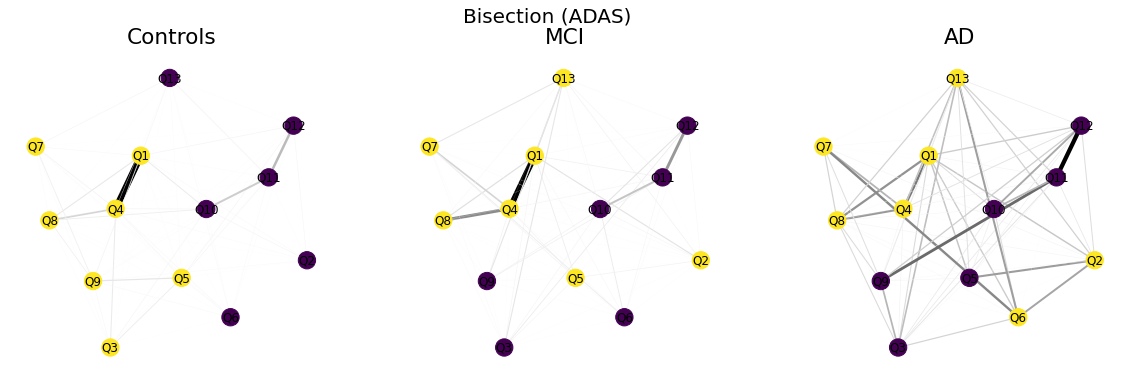

In [156]:
draw_graph_communities(graphs_ls, ADAS_Bisection_partitions, test_labels, pos_ADAS, 'ADAS', 'Bisection')

#### Subgraph metrics

In [157]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(ADAS_Bisection_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], ADAS_Bisection_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.282655          1.0  0.155638  1.0   
1     1      7     21        1     1.0  0.526964          1.0  0.088312  1.0   

                                               Tests Attention    Memory  \
0  [Commands, Ideational praxis, Comprehension, W...  0.166667       0.0   
1  [Word recall, Constructional praxis, Delayed w...       0.0  0.571429   

  Executive  Language Orientation  
0  0.166667  0.666667         0.0  
1  0.142857  0.142857    0.142857

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.376077          1.0  0.181583  1.0   
1     1      7     21        1     1.0  0.579843          1.0  0.100616  1.0   

                                               Tests Attention    Memory  \
0  [Constructional praxis, Ideational praxis, Rem...       0.0  0.166667   
1  [Word recall, Commands, Delayed word recall, N...  0.142857  0.428571   

  Executive  Language Orientation  
0  0.333333       0.5         0.0  
1       0.0  0.285714    0.142857

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.641736          1.0  0.255971  1.0   
1     1      7     21        1     1.0   0.75587          1.0  0.392501  1.0   

                                               Tests Attention    Memory  \
0  [Constructional praxis, Naming task, Rememberi...       0.0  0.166667   
1  [Word recall, Commands, Delayed word recall, I...  0.142857  0.428571   

  Executive  Language Orientation  
0  0.166667  0.666667         0.0  
1  0.142857  0.142857    0.142857

#### Export results

In [158]:
domains_rep(graphs_ls, ADAS_Bisection_partitions, 'ADAS', 'Bisection')

#### 8.1.4. LABEL PROPAGATION ALGORITHM

In [159]:
ADAS_Label_partitions = community_detection(graphs_ls, "Label Propagation")

--------------------------------
Label Propagation algorithm
--------------------------------
CN :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}]
Modularity Index:  2.220446049250313e-16 

MCI :  [{0, 3, 7}, {1, 2, 4, 5, 6, 8, 9, 10, 11, 12}]
Modularity Index:  0.1900974718713172 

AD :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}]
Modularity Index:  -2.220446049250313e-16 



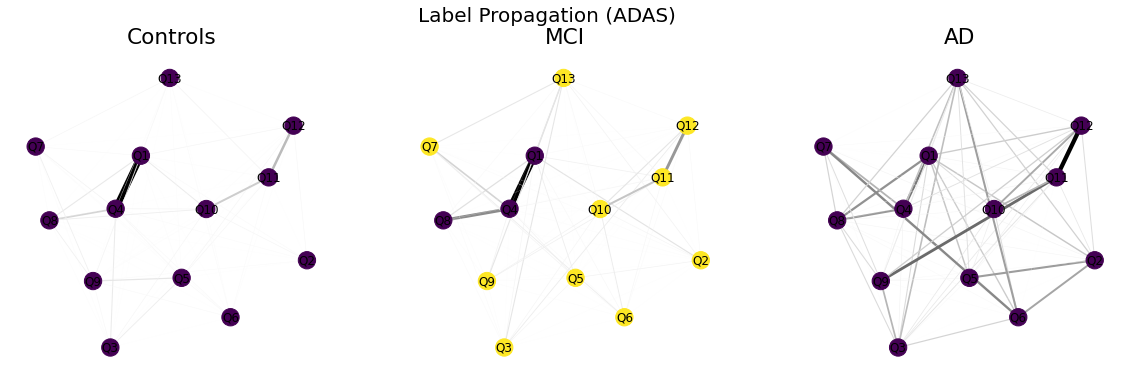

In [160]:
draw_graph_communities(graphs_ls, ADAS_Label_partitions, test_labels, pos_ADAS, 'ADAS', 'Label Propagation')

#### Subgraph metrics

In [161]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(ADAS_Label_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], ADAS_Label_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     13     78        1     1.0  0.596719          1.0  0.049668  1.0   

                                               Tests Attention    Memory  \
0  [Word recall, Commands, Constructional praxis,...  0.076923  0.307692   

  Executive  Language Orientation  
0  0.153846  0.384615    0.076923

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      3      3        1     1.0  0.686782          1.0   0.48111  1.0   
1     1     10     45        1     1.0  0.463587          1.0  0.127819  1.0   

                                               Tests Attention Memory  \
0  [Word recall, Delayed word recall, Word recogn...       0.0    1.0   
1  [Commands, Constructional praxis, Naming task,...       0.1    0.1   

  Executive Language Orientation  
0       0.0      0.0         0.0  
1       0.2      0.5         0.1

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     13     78        1     1.0  1.133648          1.0  0.177877  1.0   

                                               Tests Attention    Memory  \
0  [Word recall, Commands, Constructional praxis,...  0.076923  0.307692   

  Executive  Language Orientation  
0  0.153846  0.384615    0.076923

#### Export results

In [162]:
domains_rep(graphs_ls, ADAS_Label_partitions, 'ADAS', 'Asyn')

### 8.2. MMSE

In [163]:
graphs_ls = [MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph]

#### 8.2.1. LOUVAIN ALGORITHM

In [164]:
MMSE_Louvain_partitions = community_detection(graphs_ls, "Louvain")

--------------------------------
Louvain algorithm
--------------------------------
CN :  [{0, 1, 3, 4, 7, 18, 20, 22, 23, 24, 25, 26}, {9, 2, 10, 5}, {17, 11, 29}, {8, 28, 13}, {16, 21, 14, 15}, {19, 6, 27, 12}]
Modularity Index:  0.2662956191454993 

MCI :  [{0, 1, 2, 3, 4, 6, 8, 9, 24, 25, 29}, {7, 10, 11, 12, 18, 19, 20, 23, 26, 28}, {16, 17, 27, 13, 14, 15}, {21, 5, 22}]
Modularity Index:  0.2708544891441026 

AD :  [{4, 6, 10, 21, 24, 25, 26}, {18, 19, 20, 22}, {16, 17, 7, 8, 9, 11, 14, 15}, {0, 1, 2, 3, 5, 12, 13, 23, 27, 28, 29}]
Modularity Index:  0.16913319301327534 



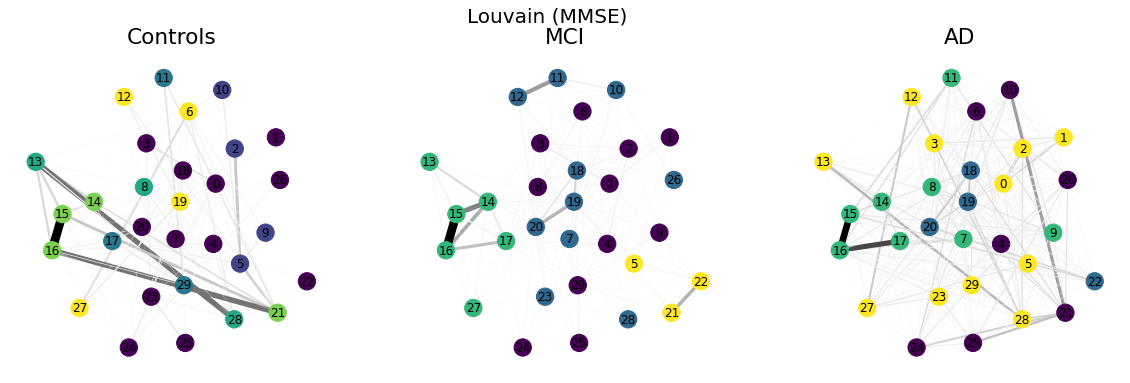

In [165]:
test_labels = None

draw_graph_communities(graphs_ls, MMSE_Louvain_partitions, test_labels, pos_MMSE, 'MMSE', 'Louvain')

#### Subgraph metrics

In [166]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MMSE_Louvain_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MMSE_Louvain_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     12     56        2  0.848485  0.348494     0.980198  0.131992   
1     1      4      5        2  0.833333  0.293707         0.75  0.275206   
2     2      3      3        1       1.0  0.207003          1.0  0.432372   
3     3      3      3        1       1.0   0.47279          1.0  0.282897   
4     4      4      6        1       1.0  1.063699          1.0  0.322551   
5     5      4      6        1       1.0  0.260873          1.0  0.272421   

       AvGE                                              Tests Concentration  \
0  0.924242  [Orientation to time , Orientation to time , O...           0.0   
1  0.916667  [Orientation to place, Orientation to time , R...           0.0   
2       1.0  [Spell WORLD backwards, Registration-repeat 3 ...      0.333333   
3       1.0  [Orientation to place, Write a short sentence ...      0.333333   
4       1.0  [Spell WORLD backwards, Recognize and name com...          0.75   
5       1.0  [Read a piece of paper, Repat words, Registrat...           0.0   

  Visuospatial     Memory  Language Orientation  
0           0.0  0.166667  0.416667    0.416667  
1           0.0      0.25       0.0        0.75  
2      0.333333  0.333333       0.0         0.0  
3           0.0       0.0  0.333333    0.333333  
4           0.0       0.0      0.25         0.0  
5           0.0       0.5      0.25        0.25

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     11     55        1     1.0  0.372384          1.0  0.201318  1.0   
1     1     10     45        1     1.0  0.539061          1.0  0.095703  1.0   
2     2      6     15        1     1.0  1.003339          1.0  0.175919  1.0   
3     3      3      3        1     1.0  0.317019          1.0  0.316329  1.0   

                                               Tests Concentration  \
0  [Orientation to time , Orientation to time , O...           0.0   
1  [Orientation to place, Registration-repeat 3 w...           0.0   
2  [Spell WORLD backwards, Spell WORLD backwards,...      0.833333   
3  [Orientation to place, Recognize and name comm...           0.0   

  Visuospatial  Memory  Language Orientation  
0      0.090909    0.0  0.181818    0.727273  
1           0.0    0.6       0.3         0.1  
2           0.0    0.0  0.166667         0.0  
3           0.0    0.0  0.666667    0.333333

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      7     21        1     1.0  0.669149          1.0  0.315175  1.0   
1     1      4      6        1     1.0  0.459779          1.0  0.639155  1.0   
2     2      8     28        1     1.0  0.839347          1.0  0.129075  1.0   
3     3     11     55        1     1.0  0.709161          1.0  0.214662  1.0   

                                               Tests Concentration  \
0  [Orientation to time , Orientation to place, R...           0.0   
1  [Repat words, Repat words, Repat words, Recogn...           0.0   
2  [Orientation to place, Orientation to place, O...           0.5   
3  [Orientation to time , Orientation to time , O...      0.090909   

  Visuospatial     Memory  Language Orientation  
0           0.0  0.142857  0.571429    0.285714  
1           0.0      0.75      0.25         0.0  
2           0.0     0.125       0.0       0.375  
3      0.090909  0.090909  0.272727    0.454545

#### Export results

In [167]:
domains_rep(graphs_ls, MMSE_Louvain_partitions, 'MMSE', 'Louvain')

#### 8.2.2. GREEDY ALGORITHM

In [168]:
MMSE_Greedy_partitions = community_detection(graphs_ls, "Greedy")

--------------------------------
Greedy algorithm
--------------------------------
CN :  [frozenset({0, 1, 3, 4, 7, 18, 20, 22, 23, 24, 25, 26}), frozenset({9, 2, 10, 5}), frozenset({16, 21, 14, 15}), frozenset({19, 27, 12, 6}), frozenset({8, 28, 13}), frozenset({17, 11, 29})]
Modularity Index:  0.2662956191454993 

MCI :  [frozenset({0, 1, 2, 3, 4, 5, 7, 8, 9, 21, 22, 23, 24, 25, 26, 28, 29}), frozenset({18, 19, 20, 6, 10, 11, 12}), frozenset({16, 17, 27, 13, 14, 15})]
Modularity Index:  0.27287373159784484 

AD :  [frozenset({0, 1, 2, 3, 5, 12, 13, 23, 27, 28, 29}), frozenset({7, 8, 9, 11, 14, 15, 16, 17}), frozenset({26, 4, 21, 6, 24, 25, 10}), frozenset({18, 19, 20, 22})]
Modularity Index:  0.1691331930132753 



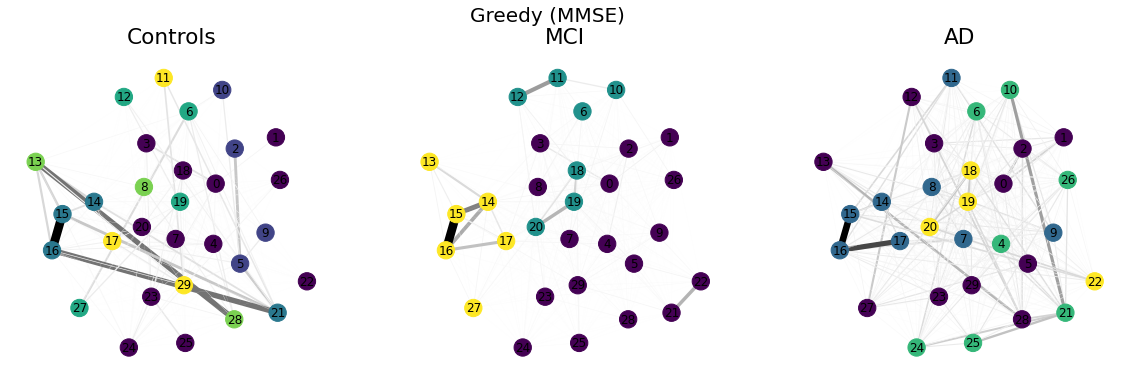

In [169]:
draw_graph_communities(graphs_ls, MMSE_Greedy_partitions, test_labels, pos_MMSE, 'MMSE', 'Greedy')

#### Subgraph metrics

In [170]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MMSE_Greedy_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MMSE_Greedy_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     12     56        2  0.848485  0.348494     0.980198  0.131992   
1     1      4      5        2  0.833333  0.293707         0.75  0.275206   
2     2      4      6        1       1.0  1.063699          1.0  0.322551   
3     3      4      6        1       1.0  0.260873          1.0  0.272421   
4     4      3      3        1       1.0   0.47279          1.0  0.282897   
5     5      3      3        1       1.0  0.207003          1.0  0.432372   

       AvGE                                              Tests Concentration  \
0  0.924242  [Orientation to time , Orientation to time , O...           0.0   
1  0.916667  [Orientation to place, Orientation to time , R...           0.0   
2       1.0  [Spell WORLD backwards, Recognize and name com...          0.75   
3       1.0  [Read a piece of paper, Repat words, Registrat...           0.0   
4       1.0  [Orientation to place, Write a short sentence ...      0.333333   
5       1.0  [Spell WORLD backwards, Registration-repeat 3 ...      0.333333   

  Visuospatial     Memory  Language Orientation  
0           0.0  0.166667  0.416667    0.416667  
1           0.0      0.25       0.0        0.75  
2           0.0       0.0      0.25         0.0  
3           0.0       0.5      0.25        0.25  
4           0.0       0.0  0.333333    0.333333  
5      0.333333  0.333333       0.0         0.0

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     17    136        1     1.0  0.482981          1.0  0.064621  1.0   
1     1      7     21        1     1.0  0.592358          1.0  0.176112  1.0   
2     2      6     15        1     1.0  1.003339          1.0  0.175919  1.0   

                                               Tests Concentration  \
0  [Orientation to time , Orientation to time , O...           0.0   
1  [Orientation to place, Registration-repeat 3 w...           0.0   
2  [Spell WORLD backwards, Spell WORLD backwards,...      0.833333   

  Visuospatial     Memory  Language Orientation  
0      0.058824       0.0  0.411765    0.529412  
1           0.0  0.857143       0.0    0.142857  
2           0.0       0.0  0.166667         0.0

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     11     55        1     1.0  0.709161          1.0  0.214662  1.0   
1     1      8     28        1     1.0  0.839347          1.0  0.129075  1.0   
2     2      7     21        1     1.0  0.669149          1.0  0.315175  1.0   
3     3      4      6        1     1.0  0.459779          1.0  0.639155  1.0   

                                               Tests Concentration  \
0  [Orientation to time , Orientation to time , O...      0.090909   
1  [Orientation to place, Orientation to place, O...           0.5   
2  [Orientation to time , Orientation to place, R...           0.0   
3  [Repat words, Repat words, Repat words, Recogn...           0.0   

  Visuospatial     Memory  Language Orientation  
0      0.090909  0.090909  0.272727    0.454545  
1           0.0     0.125       0.0       0.375  
2           0.0  0.142857  0.571429    0.285714  
3           0.0      0.75      0.25         0.0

#### Export results

In [171]:
domains_rep(graphs_ls, MMSE_Greedy_partitions, 'MMSE', 'Greedy')

#### 8.2.3. BISECTION ALGORITHM

In [172]:
MMSE_Bisection_partitions = community_detection(graphs_ls, "Bisection")

--------------------------------
Bisection algorithm
--------------------------------
CN :  ({4, 6, 8, 11, 12, 13, 14, 15, 16, 17, 19, 21, 27, 28, 29}, {0, 1, 2, 3, 5, 7, 9, 10, 18, 20, 22, 23, 24, 25, 26})
Modularity Index:  0.17196718309976683 

MCI :  ({5, 6, 7, 8, 10, 11, 12, 18, 19, 20, 21, 22, 23, 26, 28}, {0, 1, 2, 3, 4, 9, 13, 14, 15, 16, 17, 24, 25, 27, 29})
Modularity Index:  0.19313245061297274 

AD :  ({0, 1, 2, 3, 5, 10, 12, 13, 19, 21, 23, 24, 25, 27, 28}, {4, 6, 7, 8, 9, 11, 14, 15, 16, 17, 18, 20, 22, 26, 29})
Modularity Index:  0.10833831861942617 



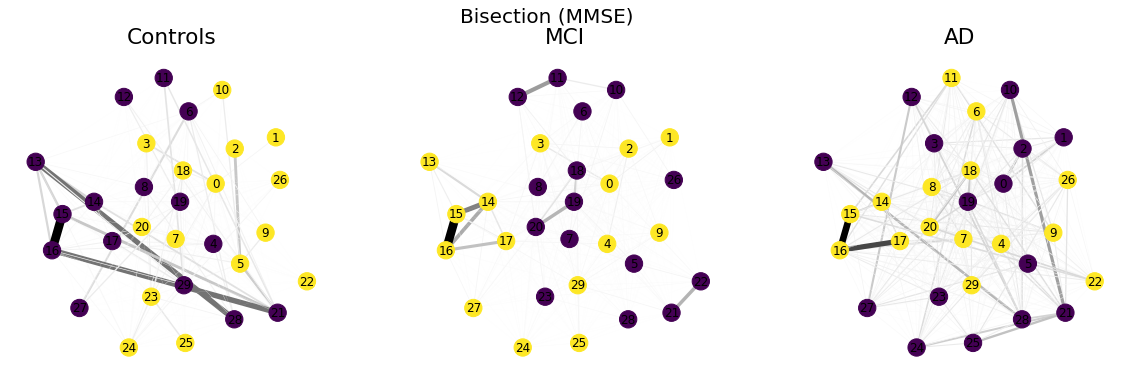

In [173]:
draw_graph_communities(graphs_ls, MMSE_Bisection_partitions, test_labels, pos_MMSE, 'MMSE', 'Bisection')

#### Subgraph metrics

In [174]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MMSE_Bisection_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MMSE_Bisection_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     15    102        2  0.971429  0.914752     0.974419  0.039762   
1     1     15     77        2  0.733333  0.375582     0.891089  0.070563   

       AvGE                                              Tests Concentration  \
0  0.985714  [Orientation to time , Orientation to place, O...      0.333333   
1  0.866667  [Orientation to time , Orientation to time , O...           0.0   

  Visuospatial  Memory  Language Orientation  
0      0.066667    0.2       0.2         0.2  
1           0.0    0.2  0.333333    0.466667

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     15    105        1     1.0  0.620595          1.0  0.069272  1.0   
1     1     15    105        1     1.0  0.744087          1.0  0.037385  1.0   

                                               Tests Concentration  \
0  [Orientation to place, Orientation to place, O...           0.0   
1  [Orientation to time , Orientation to time , O...      0.333333   

  Visuospatial  Memory  Language Orientation  
0           0.0    0.4  0.333333    0.266667  
1      0.066667    0.0       0.2         0.4

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     15    105        1     1.0  0.916944          1.0  0.155561  1.0   
1     1     15    105        1     1.0  1.027048          1.0  0.082243  1.0   

                                               Tests Concentration  \
0  [Orientation to time , Orientation to time , O...      0.066667   
1  [Orientation to time , Orientation to place, O...      0.266667   

  Visuospatial  Memory  Language Orientation  
0           0.0    0.2       0.4    0.333333  
1      0.066667    0.2  0.133333    0.333333

#### Export results

In [175]:
domains_rep(graphs_ls, MMSE_Bisection_partitions, 'MMSE', 'Bisection')

#### 8.2.4. LABEL PROPAGATION ALGORITHM

In [176]:
MMSE_Label_partitions = community_detection(graphs_ls, "Label Propagation")

--------------------------------
Label Propagation algorithm
--------------------------------
CN :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}]
Modularity Index:  2.220446049250313e-16 

MCI :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {16, 13, 14, 15}]
Modularity Index:  0.1929655326390681 

AD :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}]
Modularity Index:  2.220446049250313e-16 



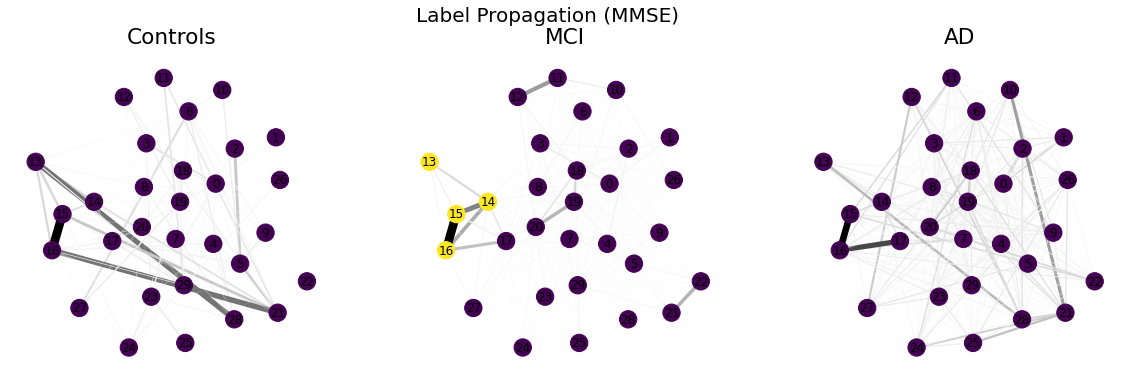

In [177]:
draw_graph_communities(graphs_ls, MMSE_Label_partitions, test_labels, pos_MMSE, 'MMSE', 'Label Propagation')

#### Subgraph metrics

In [178]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MMSE_Label_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MMSE_Label_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter   Density  AvDegree Transitivity      AvCC  \
0     0     30    360        2  0.827586  0.900034     0.945685  0.022761   

       AvGE                                              Tests Concentration  \
0  0.913793  [Orientation to time , Orientation to time , O...      0.166667   

  Visuospatial  Memory  Language Orientation  
0      0.033333    0.2  0.266667    0.333333

MCI ---------------------


Index NNodes NEdges Diameter Density AvDegree Transitivity      AvCC AvGE  \
0     0     26    325        1     1.0  0.79666          1.0  0.054708  1.0   
1     1      4      6        1     1.0  1.06983          1.0  0.335591  1.0   

                                               Tests Concentration  \
0  [Orientation to time , Orientation to time , O...      0.038462   
1  [Spell WORLD backwards, Spell WORLD backwards,...           1.0   

  Visuospatial     Memory  Language Orientation  
0      0.038462  0.230769  0.307692    0.384615  
1           0.0       0.0       0.0         0.0

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     30    435        1     1.0  1.596229          1.0  0.061916  1.0   

                                               Tests Concentration  \
0  [Orientation to time , Orientation to time , O...      0.166667   

  Visuospatial  Memory  Language Orientation  
0      0.033333    0.2  0.266667    0.333333

#### Export results

In [179]:
domains_rep(graphs_ls, MMSE_Label_partitions, 'MMSE', 'Asyn')

### 8.3. MOCA

In [180]:
graphs_ls = [MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph]

#### 8.3.1. LOUVAIN ALGORITHM

In [181]:
MOCA_Louvain_partitions = community_detection(graphs_ls, "Louvain")

--------------------------------
Louvain algorithm
--------------------------------
CN :  [{0, 1, 3, 5, 38, 7, 6, 40, 9, 19, 27}, {18, 36, 8, 41, 26, 13}, {39, 10, 11, 12, 14, 15, 16, 17, 20}, {32, 33, 34, 35, 31}, {2, 4, 37, 21, 22, 23, 24, 25, 28, 29, 30}]
Modularity Index:  0.14697744726543643 

MCI :  [{1, 2, 3, 4, 22, 23, 24, 25}, {20, 29, 30}, {6, 7, 40, 10, 11, 12, 15, 16, 17, 26, 27}, {32, 33, 34, 35, 5, 21, 28, 31}, {0, 36, 37, 38, 39, 8, 9, 41, 13, 14, 18, 19}]
Modularity Index:  0.14034167038946582 

AD :  [{1, 34, 3, 4, 8, 9, 10, 21, 22, 23, 28, 31}, {18, 19, 5, 6, 7}, {33, 41, 11, 12, 13, 14, 16, 17, 20, 27, 29}, {24, 25, 0}, {32, 2, 35, 36, 37, 38, 39, 40, 15, 26, 30}]
Modularity Index:  0.09405859869504826 



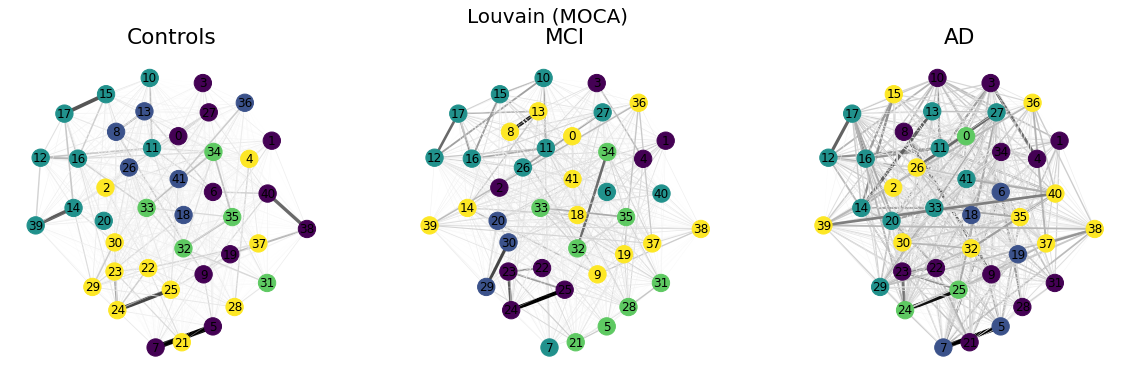

In [182]:
draw_graph_communities(graphs_ls, MOCA_Louvain_partitions, test_labels, pos_MOCA, 'MOCA', 'Louvain')

#### Subgraph metrics

In [183]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MOCA_Louvain_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MOCA_Louvain_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     11     55        1     1.0  0.662136          1.0  0.093561  1.0   
1     1      6     15        1     1.0  0.413943          1.0  0.367121  1.0   
2     2      9     36        1     1.0  0.750856          1.0  0.195213  1.0   
3     3      5     10        1     1.0  0.496895          1.0  0.640917  1.0   
4     4     11     55        1     1.0  0.651463          1.0  0.118486  1.0   

                                               Tests Executive function  \
0  [Trail-making task, Copy cube, Draw a clock (n...                0.0   
1  [Orientation to date, Read a list of words and...                0.0   
2  [Orientation to date, Read a list of words and...                0.0   
3  [Delayed recall, Delayed recall, Delayed recal...                0.0   
4  [Draw a clock (contorn), Draw a clock (hands),...           0.181818   

  Attention Visuospatial    Memory  Language Orientation  
0  0.090909     0.272727  0.090909  0.363636    0.181818  
1  0.166667          0.0  0.333333  0.166667    0.333333  
2  0.111111          0.0  0.777778       0.0    0.111111  
3       0.0          0.0       1.0       0.0         0.0  
4  0.454545     0.181818       0.0  0.090909    0.090909

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      8     28        1     1.0  0.608114          1.0  0.147544  1.0   
1     1      3      3        1     1.0  0.342016          1.0  0.482678  1.0   
2     2     11     55        1     1.0  0.724196          1.0  0.219942  1.0   
3     3      8     28        1     1.0  0.528009          1.0  0.236481  1.0   
4     4     12     66        1     1.0  0.722966          1.0  0.149211  1.0   

                                               Tests Executive function  \
0  [Copy cube, Draw a clock (contorn), Draw a clo...                0.0   
1  [Sequence of letters: identify "A", Abstractio...           0.666667   
2  [Name animals, Name animals, Orientation to pl...                0.0   
3  [Delayed recall, Delayed recall, Delayed recal...                0.0   
4  [Trail-making task, Orientation to date, Orien...                0.0   

  Attention Visuospatial    Memory  Language Orientation  
0       0.5          0.5       0.0       0.0         0.0  
1  0.333333          0.0       0.0       0.0         0.0  
2       0.0          0.0  0.545455  0.363636    0.090909  
3     0.125          0.0     0.625      0.25         0.0  
4  0.166667     0.083333  0.333333       0.0    0.416667

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     12     66        1     1.0  1.065372          1.0  0.242961  1.0   
1     1      5     10        1     1.0  0.716856          1.0  0.352586  1.0   
2     2     11     55        1     1.0  1.136242          1.0  0.299617  1.0   
3     3      3      3        1     1.0  0.486986          1.0  0.482303  1.0   
4     4     11     55        1     1.0  0.955705          1.0  0.310869  1.0   

                                               Tests Executive function  \
0  [Copy cube, Delayed recall, Draw a clock (numb...                0.0   
1  [Name animals, Name animals, Name animals, For...                0.0   
2  [Delayed recall, Orientation to place, Read a ...           0.090909   
3  [Count substracting by 10, Count substracting ...                0.0   
4  [Delayed recall, Draw a clock (contorn), Delay...           0.090909   

  Attention Visuospatial    Memory  Language Orientation  
0      0.25         0.25  0.416667  0.083333         0.0  
1       0.4          0.0       0.0       0.6         0.0  
2  0.090909          0.0  0.636364  0.090909    0.090909  
3  0.666667     0.333333       0.0       0.0         0.0  
4       0.0     0.090909  0.272727  0.090909    0.454545

#### Export results

In [184]:
domains_rep(graphs_ls, MOCA_Louvain_partitions, 'MOCA', 'Louvain')

#### 8.3.2. GREEDY ALGORITHM

In [185]:
MOCA_Greedy_partitions = community_detection(graphs_ls, "Greedy")

--------------------------------
Greedy algorithm
--------------------------------
CN :  [frozenset({39, 10, 11, 12, 14, 15, 16, 17, 20}), frozenset({36, 6, 8, 41, 13, 18, 26, 27}), frozenset({2, 21, 22, 23, 24, 25, 37}), frozenset({1, 19, 4, 38, 40, 9, 28}), frozenset({0, 3, 5, 7, 29, 30}), frozenset({32, 33, 34, 35, 31})]
Modularity Index:  0.14609035958199068 

MCI :  [frozenset({0, 32, 33, 34, 35, 36, 37, 39, 41, 19, 28, 31}), frozenset({1, 2, 3, 4, 22, 23, 24, 25}), frozenset({38, 8, 9, 13, 14, 18, 26, 27}), frozenset({7, 40, 10, 11, 12, 15, 16, 17}), frozenset({20, 21, 5, 6, 29, 30})]
Modularity Index:  0.13826269227501975 

AD :  [frozenset({2, 35, 36, 37, 38, 39, 40, 41, 10, 11, 12, 15, 16, 17, 30}), frozenset({32, 1, 34, 5, 6, 7, 8, 9, 18, 19, 21, 28, 31}), frozenset({0, 3, 4, 20, 22, 23, 24, 25, 26, 27, 29}), frozenset({33, 13, 14})]
Modularity Index:  0.09692946800461749 



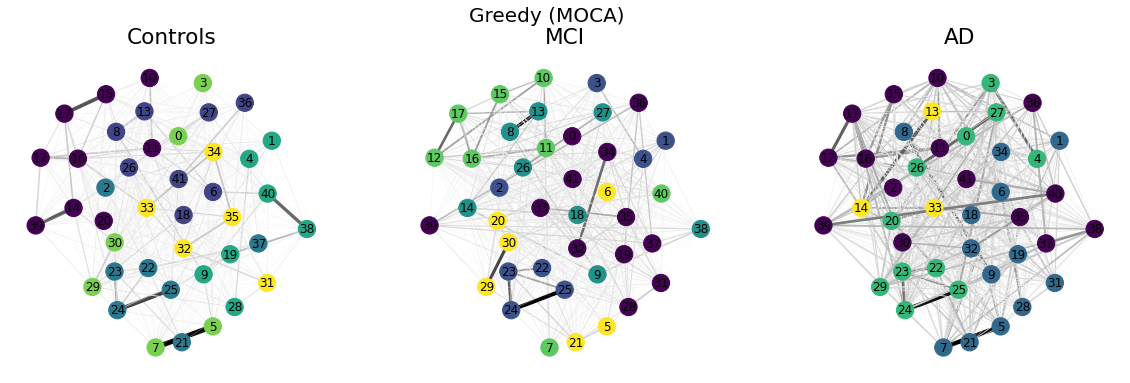

In [186]:
draw_graph_communities(graphs_ls, MOCA_Greedy_partitions, test_labels, pos_MOCA, 'MOCA', 'Greedy')

#### Subgraph metrics

In [187]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MOCA_Greedy_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MOCA_Greedy_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      9     36        1     1.0  0.750856          1.0  0.195213  1.0   
1     1      8     28        1     1.0  0.501908          1.0  0.299173  1.0   
2     2      7     21        1     1.0  0.556302          1.0  0.184127  1.0   
3     3      7     21        1     1.0  0.451256          1.0  0.162298  1.0   
4     4      6     15        1     1.0  0.461881          1.0  0.135347  1.0   
5     5      5     10        1     1.0  0.496895          1.0  0.640917  1.0   

                                               Tests Executive function  \
0  [Orientation to date, Read a list of words and...                0.0   
1  [Orientation to date, Name animals, Read a lis...                0.0   
2  [Draw a clock (contorn), Orientation to date, ...                0.0   
3  [Copy cube, Draw a clock (hands), Orientation ...                0.0   
4  [Trail-making task, Draw a clock (numbers), Na...           0.333333   
5  [Delayed recall, Delayed recall, Delayed recal...                0.0   

  Attention Visuospatial    Memory  Language Orientation  
0  0.111111          0.0  0.777778       0.0    0.111111  
1     0.125          0.0      0.25     0.375        0.25  
2  0.714286     0.142857       0.0       0.0    0.142857  
3  0.142857     0.285714  0.142857  0.142857    0.285714  
4       0.0     0.333333       0.0  0.333333         0.0  
5       0.0          0.0       1.0       0.0         0.0

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     12     66        1     1.0  0.702084          1.0  0.203547  1.0   
1     1      8     28        1     1.0  0.608114          1.0  0.147544  1.0   
2     2      8     28        1     1.0  0.557493          1.0  0.174376  1.0   
3     3      8     28        1     1.0  0.637437          1.0  0.288104  1.0   
4     4      6     15        1     1.0  0.398069          1.0  0.200775  1.0   

                                               Tests Executive function  \
0  [Trail-making task, Delayed recall, Delayed re...                0.0   
1  [Copy cube, Draw a clock (contorn), Draw a clo...                0.0   
2  [Orientation to date, Read a list of words and...                0.0   
3  [Name animals, Orientation to place, Read a li...                0.0   
4  [Name animals, Name animals, Sequence of lette...           0.333333   

  Attention Visuospatial    Memory  Language Orientation  
0  0.083333     0.083333  0.416667  0.083333    0.333333  
1       0.5          0.5       0.0       0.0         0.0  
2     0.125          0.0       0.5      0.25       0.125  
3       0.0          0.0      0.75     0.125       0.125  
4  0.333333          0.0       0.0  0.333333         0.0

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     15    105        1     1.0  1.314267          1.0  0.242698  1.0   
1     1     13     78        1     1.0  1.113834          1.0  0.164859  1.0   
2     2     11     55        1     1.0   1.20635          1.0  0.222633  1.0   
3     3      3      3        1     1.0  0.424714          1.0    0.5975  1.0   

                                               Tests Executive function  \
0  [Draw a clock (contorn), Delayed recall, Orien...           0.066667   
1  [Delayed recall, Copy cube, Delayed recall, Na...                0.0   
2  [Trail-making task, Draw a clock (numbers), Dr...           0.090909   
3  [Delayed recall, Read a list of words and repe...                0.0   

  Attention Visuospatial    Memory  Language Orientation  
0       0.0     0.066667  0.466667       0.0         0.4  
1  0.230769     0.076923  0.384615  0.307692         0.0  
2  0.454545     0.272727       0.0  0.181818         0.0  
3       0.0          0.0       1.0       0.0         0.0

#### Export results

In [188]:
domains_rep(graphs_ls, MOCA_Greedy_partitions, 'MOCA', 'Greedy')

#### 8.3.3. BISECTION ALGORITHM

In [189]:
MOCA_Bisection_partitions = community_detection(graphs_ls, "Bisection")

--------------------------------
Bisection algorithm
--------------------------------
CN :  ({0, 1, 3, 4, 5, 6, 7, 9, 19, 21, 22, 23, 24, 25, 27, 28, 29, 30, 37, 38, 40}, {2, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 26, 31, 32, 33, 34, 35, 36, 39, 41})
Modularity Index:  0.10624920743103522 

MCI :  ({0, 8, 9, 13, 14, 18, 19, 20, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41}, {1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 40})
Modularity Index:  0.10041905353220587 

AD :  ({2, 10, 11, 12, 14, 15, 16, 17, 20, 23, 24, 25, 29, 33, 35, 36, 37, 38, 39, 40, 41}, {0, 1, 3, 4, 5, 6, 7, 8, 9, 13, 18, 19, 21, 22, 26, 27, 28, 30, 31, 32, 34})
Modularity Index:  0.07582886009290565 



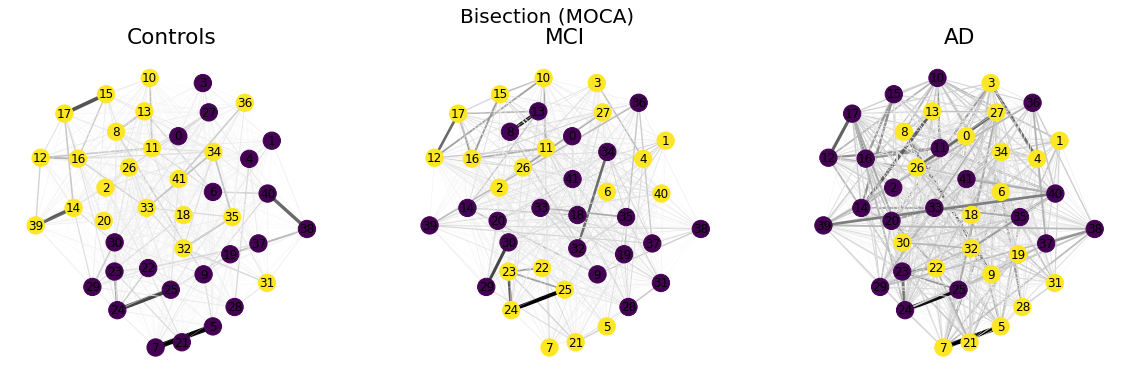

In [190]:
draw_graph_communities(graphs_ls, MOCA_Bisection_partitions, test_labels, pos_MOCA, 'MOCA', 'Bisection')

#### Subgraph metrics

In [191]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MOCA_Bisection_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MOCA_Bisection_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     21    210        1     1.0  0.994169          1.0  0.070515  1.0   
1     1     21    210        1     1.0  1.089717          1.0  0.108499  1.0   

                                               Tests Executive function  \
0  [Trail-making task, Copy cube, Draw a clock (n...           0.095238   
1  [Draw a clock (contorn), Read a list of words ...                0.0   

  Attention Visuospatial    Memory  Language Orientation  
0  0.285714     0.190476  0.047619  0.238095    0.142857  
1  0.095238     0.047619  0.666667  0.047619    0.142857

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     21    210        1     1.0  1.040024          1.0  0.114314  1.0   
1     1     21    210        1     1.0  1.025184          1.0  0.094721  1.0   

                                               Tests Executive function  \
0  [Trail-making task, Read a list of words and r...           0.095238   
1  [Copy cube, Draw a clock (contorn), Draw a clo...                0.0   

  Attention Visuospatial    Memory  Language Orientation  
0  0.142857     0.047619  0.428571  0.047619    0.238095  
1  0.238095     0.190476  0.285714  0.238095    0.047619

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     21    210        1     1.0  1.796284          1.0  0.164928  1.0   
1     1     21    210        1     1.0  1.620432          1.0  0.137789  1.0   

                                               Tests Executive function  \
0  [Draw a clock (contorn), Read a list of words ...           0.047619   
1  [Trail-making task, Copy cube, Draw a clock (n...           0.047619   

  Attention Visuospatial    Memory  Language Orientation  
0  0.190476     0.047619  0.428571       0.0    0.285714  
1  0.190476     0.190476  0.285714  0.285714         0.0

#### Export results

In [192]:
domains_rep(graphs_ls, MOCA_Bisection_partitions, 'MOCA', 'Bisection')

#### 8.3.4. LABEL PROPAGATION ALGORITHM

In [193]:
MOCA_Label_partitions = community_detection(graphs_ls, "Label Propagation")

--------------------------------
Label Propagation algorithm
--------------------------------
CN :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41}]
Modularity Index:  8.881784197001252e-16 

MCI :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41}]
Modularity Index:  1.3322676295501878e-15 

AD :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41}]
Modularity Index:  -2.220446049250313e-16 



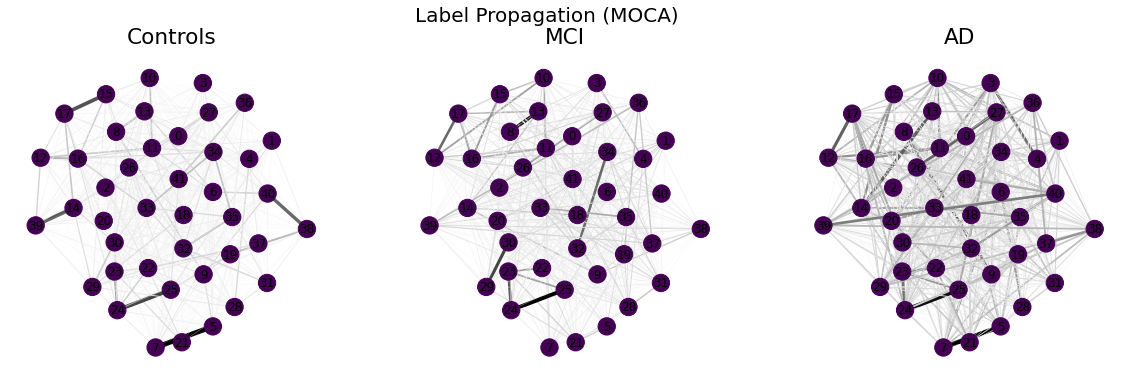

In [194]:
draw_graph_communities(graphs_ls, MOCA_Label_partitions, test_labels, pos_MOCA, 'MOCA', 'Label Propagation')

#### Subgraph metrics

In [195]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MOCA_Label_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MOCA_Label_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     42    861        1     1.0  1.717575          1.0  0.060632  1.0   

                                               Tests Executive function  \
0  [Trail-making task, Copy cube, Draw a clock (c...           0.047619   

  Attention Visuospatial    Memory  Language Orientation  
0  0.190476     0.119048  0.357143  0.142857    0.142857

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     42    861        1     1.0  1.719779          1.0  0.080212  1.0   

                                               Tests Executive function  \
0  [Trail-making task, Copy cube, Draw a clock (c...           0.047619   

  Attention Visuospatial    Memory  Language Orientation  
0  0.190476     0.119048  0.357143  0.142857    0.142857

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     42    861        1     1.0  2.964517          1.0  0.121645  1.0   

                                               Tests Executive function  \
0  [Trail-making task, Copy cube, Draw a clock (c...           0.047619   

  Attention Visuospatial    Memory  Language Orientation  
0  0.190476     0.119048  0.357143  0.142857    0.142857

#### Export results

In [196]:
domains_rep(graphs_ls, MOCA_Label_partitions, 'MOCA', 'Asyn')

### 8.4. Merged

In [197]:
graphs_ls = [ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph]

#### 8.4.1. LOUVAIN ALGORITHM

In [198]:
merged_Louvain_partitions = community_detection(graphs_ls, "Louvain")

--------------------------------
Louvain algorithm
--------------------------------
CN :  [{0, 3, 7}, {2, 4, 5, 6, 8, 12}, {1, 10, 11, 9}]
Modularity Index:  0.23109224207541662 

MCI :  [{0, 3, 7}, {9, 10, 11, 5}, {1, 2, 4, 6, 8, 12}]
Modularity Index:  0.22148481313980212 

AD :  [{0, 3, 6, 7}, {1, 5, 4, 12}, {2, 8, 9, 10, 11}]
Modularity Index:  0.14293614334231983 



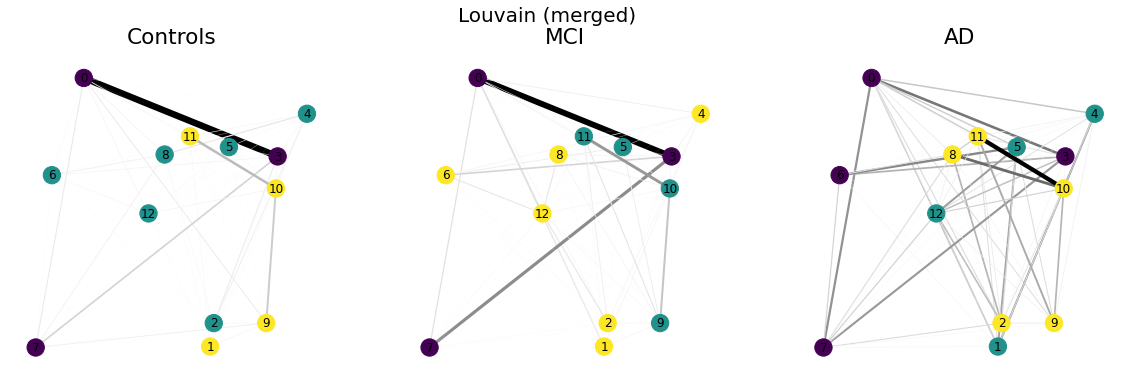

In [199]:
draw_graph_communities(graphs_ls, merged_Louvain_partitions, test_labels, pos_merged, 'merged', 'Louvain')

#### Subgraph metrics

In [200]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(merged_Louvain_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], merged_Louvain_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      3      3        1     1.0  0.621274          1.0  0.353061  1.0   
1     1      6     15        1     1.0  0.224667          1.0  0.328306  1.0   
2     2      4      6        1     1.0  0.302338          1.0  0.284131  1.0   

                                               Tests Attention    Memory  \
0  [Word recall, Delayed word recall, Word recogn...       0.0       1.0   
1  [Constructional praxis, Naming task, Ideationa...  0.166667  0.166667   
2  [Commands, Word finding difficulty, Spoken lan...       0.0       0.0   

  Executive  Language Orientation  
0       0.0       0.0         0.0  
1  0.333333  0.166667    0.166667  
2       0.0       1.0         0.0

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      3      3        1     1.0  0.686782          1.0   0.48111  1.0   
1     1      4      6        1     1.0  0.389671          1.0  0.373748  1.0   
2     2      6     15        1     1.0   0.24944          1.0  0.381853  1.0   

                                               Tests Attention    Memory  \
0  [Word recall, Delayed word recall, Word recogn...       0.0       1.0   
1  [Comprehension, Word finding difficulty, Spoke...       0.0       0.0   
2  [Commands, Constructional praxis, Naming task,...  0.166667  0.166667   

  Executive  Language Orientation  
0       0.0       0.0         0.0  
1      0.25      0.75         0.0  
2  0.166667  0.333333    0.166667

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      4      6        1     1.0  0.510848          1.0  0.558965  1.0   
1     1      4      6        1     1.0   0.43289          1.0   0.61236  1.0   
2     2      5     10        1     1.0  0.665832          1.0  0.340818  1.0   

                                               Tests Attention Memory  \
0  [Word recall, Delayed word recall, Orientation...       0.0   0.75   
1  [Commands, Number cancellation, Naming task, I...      0.25    0.0   
2  [Constructional praxis, Remembering test instr...       0.0    0.2   

  Executive Language Orientation  
0       0.0      0.0        0.25  
1      0.25      0.5         0.0  
2       0.2      0.6         0.0

#### Export results

In [201]:
domains_rep(graphs_ls, merged_Louvain_partitions, 'merged', 'Louvain')

#### 8.4.2. GREEDY ALGORITHM

In [202]:
merged_Greedy_partitions = community_detection(graphs_ls, "Greedy")

--------------------------------
Greedy algorithm
--------------------------------
CN :  [frozenset({2, 4, 5, 6, 8, 12}), frozenset({1, 10, 11, 9}), frozenset({0, 3, 7})]
Modularity Index:  0.23109224207541662 

MCI :  [frozenset({1, 2, 4, 6, 8, 12}), frozenset({9, 10, 11, 5}), frozenset({0, 3, 7})]
Modularity Index:  0.2214848131398021 

AD :  [frozenset({2, 8, 9, 10, 11}), frozenset({1, 4, 5, 6, 12}), frozenset({0, 3, 7})]
Modularity Index:  0.14201022848599693 



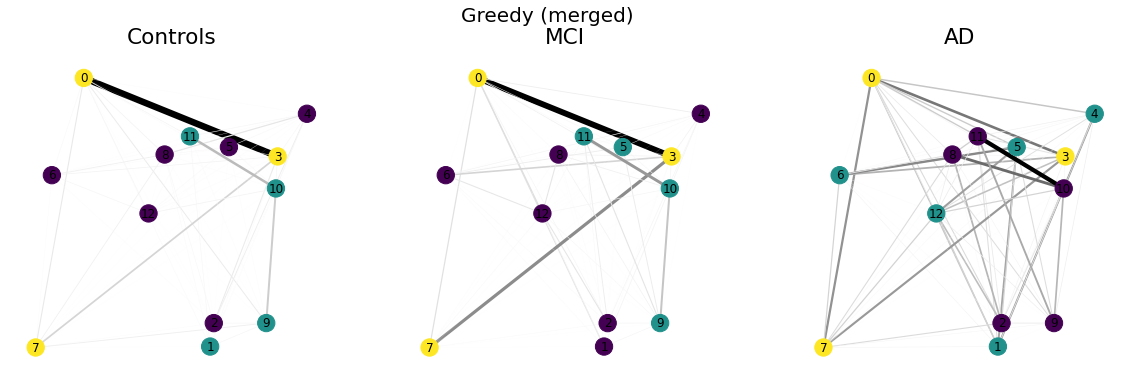

In [203]:
draw_graph_communities(graphs_ls, merged_Greedy_partitions, test_labels, pos_merged, 'merged', 'Greedy')

#### Subgraph metrics

In [204]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(merged_Greedy_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], merged_Greedy_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.224667          1.0  0.328306  1.0   
1     1      4      6        1     1.0  0.302338          1.0  0.284131  1.0   
2     2      3      3        1     1.0  0.621274          1.0  0.353061  1.0   

                                               Tests Attention    Memory  \
0  [Constructional praxis, Naming task, Ideationa...  0.166667  0.166667   
1  [Commands, Word finding difficulty, Spoken lan...       0.0       0.0   
2  [Word recall, Delayed word recall, Word recogn...       0.0       1.0   

  Executive  Language Orientation  
0  0.333333  0.166667    0.166667  
1       0.0       1.0         0.0  
2       0.0       0.0         0.0

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0   0.24944          1.0  0.381853  1.0   
1     1      4      6        1     1.0  0.389671          1.0  0.373748  1.0   
2     2      3      3        1     1.0  0.686782          1.0   0.48111  1.0   

                                               Tests Attention    Memory  \
0  [Commands, Constructional praxis, Naming task,...  0.166667  0.166667   
1  [Comprehension, Word finding difficulty, Spoke...       0.0       0.0   
2  [Word recall, Delayed word recall, Word recogn...       0.0       1.0   

  Executive  Language Orientation  
0  0.166667  0.333333    0.166667  
1      0.25      0.75         0.0  
2       0.0       0.0         0.0

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      5     10        1     1.0  0.665832          1.0  0.340818  1.0   
1     1      5     10        1     1.0  0.486813          1.0  0.417834  1.0   
2     2      3      3        1     1.0  0.466302          1.0  0.882573  1.0   

                                               Tests Attention Memory  \
0  [Constructional praxis, Remembering test instr...       0.0    0.2   
1  [Commands, Naming task, Ideational praxis, Ori...       0.2    0.0   
2  [Word recall, Delayed word recall, Word recogn...       0.0    1.0   

  Executive Language Orientation  
0       0.2      0.6         0.0  
1       0.2      0.4         0.2  
2       0.0      0.0         0.0

In [205]:
domains_rep(graphs_ls, merged_Greedy_partitions, 'merged', 'Greedy')

#### 8.4.3. BISECTION ALGORITHM

In [206]:
merged_Bisection_partitions = community_detection(graphs_ls, "Bisection")

--------------------------------
Bisection algorithm
--------------------------------
CN :  ({1, 5, 9, 10, 11, 12}, {0, 2, 3, 4, 6, 7, 8})
Modularity Index:  0.16114241722644163 

MCI :  ({2, 5, 8, 9, 10, 11}, {0, 1, 3, 4, 6, 7, 12})
Modularity Index:  0.1686903744315489 

AD :  ({2, 4, 8, 9, 10, 11}, {0, 1, 3, 5, 6, 7, 12})
Modularity Index:  0.11551408374016062 



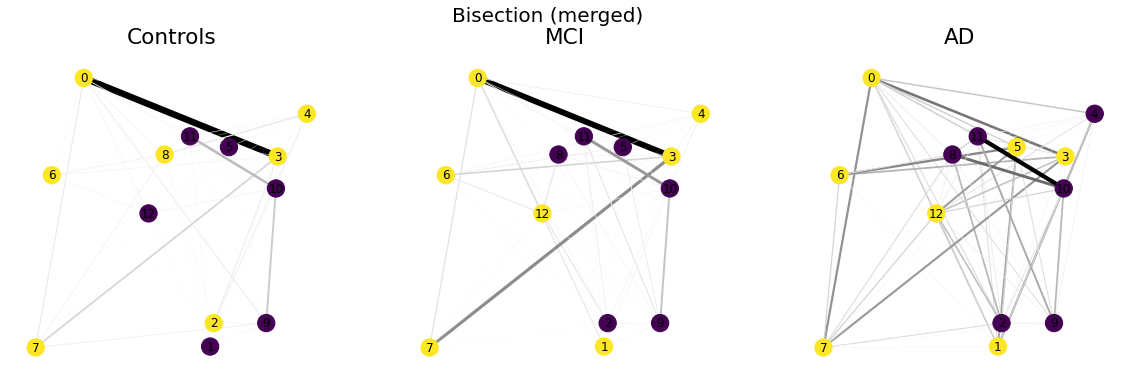

In [207]:
draw_graph_communities(graphs_ls, merged_Bisection_partitions, test_labels, pos_merged, 'merged', 'Bisection')

#### Subgraph metrics

In [208]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(merged_Bisection_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], merged_Bisection_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.282655          1.0  0.155638  1.0   
1     1      7     21        1     1.0  0.526964          1.0  0.088312  1.0   

                                               Tests Attention    Memory  \
0  [Commands, Ideational praxis, Comprehension, W...  0.166667       0.0   
1  [Word recall, Constructional praxis, Delayed w...       0.0  0.571429   

  Executive  Language Orientation  
0  0.166667  0.666667         0.0  
1  0.142857  0.142857    0.142857

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.376077          1.0  0.181583  1.0   
1     1      7     21        1     1.0  0.579843          1.0  0.100616  1.0   

                                               Tests Attention    Memory  \
0  [Constructional praxis, Ideational praxis, Rem...       0.0  0.166667   
1  [Word recall, Commands, Delayed word recall, N...  0.142857  0.428571   

  Executive  Language Orientation  
0  0.333333       0.5         0.0  
1       0.0  0.285714    0.142857

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      6     15        1     1.0  0.641736          1.0  0.255971  1.0   
1     1      7     21        1     1.0   0.75587          1.0  0.392501  1.0   

                                               Tests Attention    Memory  \
0  [Constructional praxis, Naming task, Rememberi...       0.0  0.166667   
1  [Word recall, Commands, Delayed word recall, I...  0.142857  0.428571   

  Executive  Language Orientation  
0  0.166667  0.666667         0.0  
1  0.142857  0.142857    0.142857

#### Export results

In [209]:
domains_rep(graphs_ls, merged_Bisection_partitions, 'merged', 'Bisection')

#### 8.4.4. LABEL PROPAGATION ALGORITHM

In [210]:
merged_Label_partitions = community_detection(graphs_ls, "Label Propagation")

--------------------------------
Label Propagation algorithm
--------------------------------
CN :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}]
Modularity Index:  2.220446049250313e-16 

MCI :  [{0, 3, 7}, {1, 2, 4, 5, 6, 8, 9, 10, 11, 12}]
Modularity Index:  0.1900974718713172 

AD :  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}]
Modularity Index:  -2.220446049250313e-16 



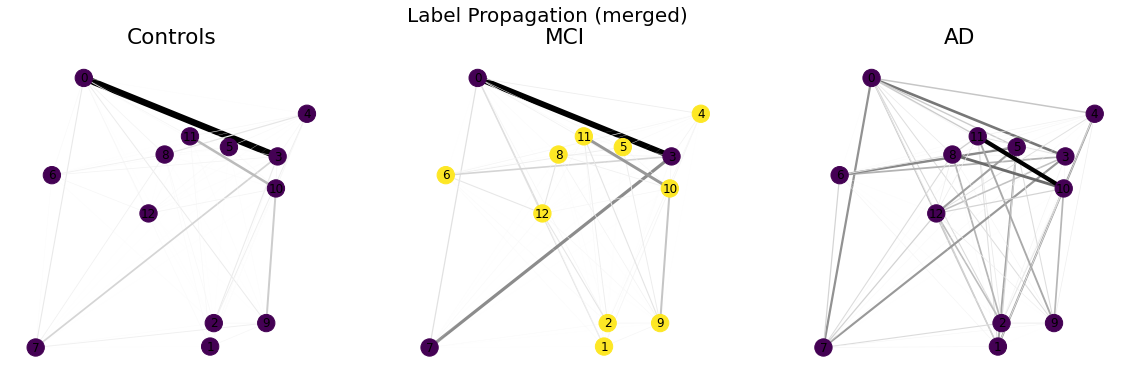

In [211]:
draw_graph_communities(graphs_ls, merged_Label_partitions, test_labels, pos_merged, 'merged', 'Label Propagation')

In [212]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(merged_Label_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], merged_Label_partitions[i]))

CN ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     13     78        1     1.0  0.596719          1.0  0.049668  1.0   

                                               Tests Attention    Memory  \
0  [Word recall, Commands, Constructional praxis,...  0.076923  0.307692   

  Executive  Language Orientation  
0  0.153846  0.384615    0.076923

MCI ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0      3      3        1     1.0  0.686782          1.0   0.48111  1.0   
1     1     10     45        1     1.0  0.463587          1.0  0.127819  1.0   

                                               Tests Attention Memory  \
0  [Word recall, Delayed word recall, Word recogn...       0.0    1.0   
1  [Commands, Constructional praxis, Naming task,...       0.1    0.1   

  Executive Language Orientation  
0       0.0      0.0         0.0  
1       0.2      0.5         0.1

AD ---------------------


Index NNodes NEdges Diameter Density  AvDegree Transitivity      AvCC AvGE  \
0     0     13     78        1     1.0  1.133648          1.0  0.177877  1.0   

                                               Tests Attention    Memory  \
0  [Word recall, Commands, Constructional praxis,...  0.076923  0.307692   

  Executive  Language Orientation  
0  0.153846  0.384615    0.076923

#### Export results

In [213]:
domains_rep(graphs_ls, merged_Label_partitions, 'merged', 'Asyn')